In [1]:
import os
os.system("""source ../../../scripts/bashrc""")

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import dataAgglomeration as da
import numpy as np
from numpy import linalg
import math
#plt.rcParams.update({'font.size': 12}) 

In [2]:
### Results from interFlow
agglomerator = da.data_agglomerator("risingBubbleAcc3D.parameter","bubblepproc.dat", 
                                     "risingBubbleAcc3D_data/isoAdv-risingBubbleAcc3D_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-risingBubbleAcc3D.csv")
dframe_isoAdv_risingU = agglomerator.study_dataframe()
dframe_isoAdv_risingU = dframe_isoAdv_risingU.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0.00243], [0], [0], [0], [1e-07], [0.0001], [0], [4], [15], [1e-07], [1e-09], ['triangleInCell'], ['compactDivGrad'], ['cellPoint'], ['Euler'], [10], [0], [0.001], [0.5], [0.02], [1], [3], [120], [240, 480], [-9.80665], [0.0728], [3.009e-05], [998.21], [1.5111e-05], [1.2047], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['radius', 'z_centre', 'y_centre', 'x_centre', 'abs_phi_change_tolerance', 'phi_change_tolerance', 'n_non_orth_correctors', 'n_correctors', 'n_outer_correctors', 'u_tol', 'p_tol', 'front_to_mesh_transfer', 'curvature_

In [3]:
df20 = dframe_isoAdv_risingU.loc[dframe_isoAdv_risingU.index.get_level_values('resolution') == 240]
df40 = dframe_isoAdv_risingU.loc[dframe_isoAdv_risingU.index.get_level_values('resolution') == 480]

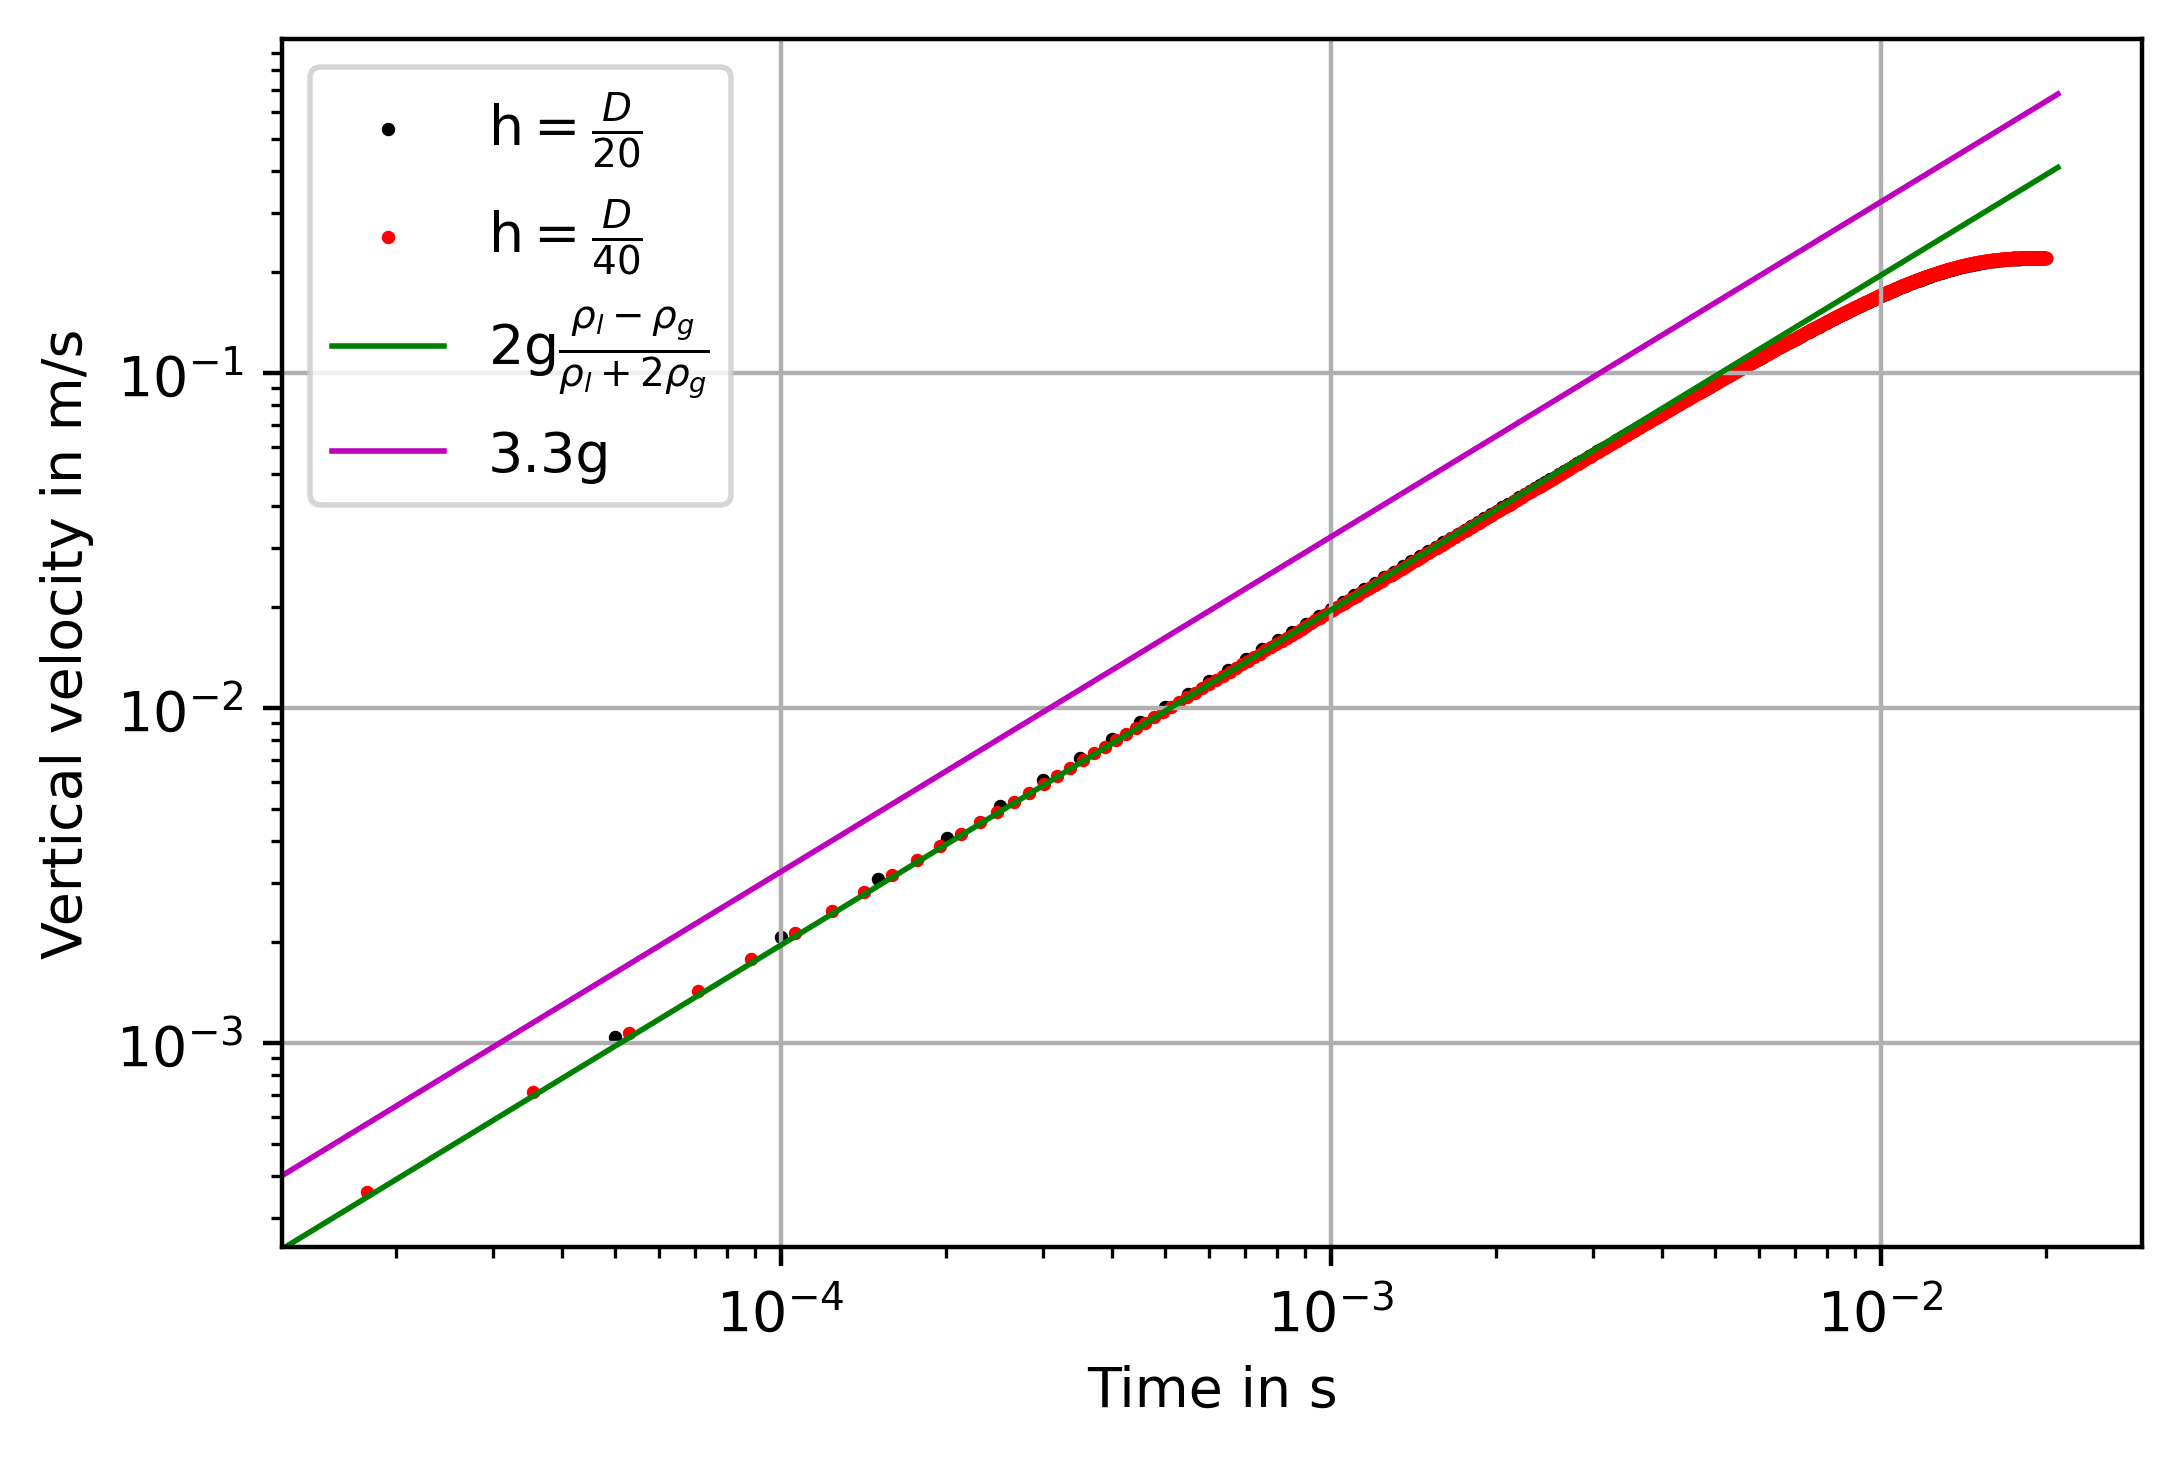

In [8]:
plt.scatter(df20["time"], df20["z-Velocity"],s=2, label=r"h$=\frac{D}{20}$", color='black')
plt.scatter(df40["time"], df40["z-Velocity"], s=2,label=r"h$=\frac{D}{40}$", color='red')

rcParams["figure.dpi"] = 400
g = 9.80665
rhol= 998.21
rhog = 1.2047

acc = 2*g*(rhol - rhog)/(rhol+2*rhog)

axes = plt.gca()
xVal= np.linspace(0, 0.021, num=1000)
yVal1= acc*xVal
yVal2= 3.3*g*xVal

plt.plot(xVal, yVal1,color='g', label=r"$2$g$\frac{\rho^l-\rho^g}{\rho^l+2\rho^g}$", linewidth=1)
plt.plot(xVal, yVal2, color='m', label="3.3g", linewidth=1)
plt.xlabel("Time in s")
plt.ylabel("Vertical velocity in m/s")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.legend()
plt.savefig('VelTimeLogScaleNew.png', facecolor='w', dpi=400)
plt.show()

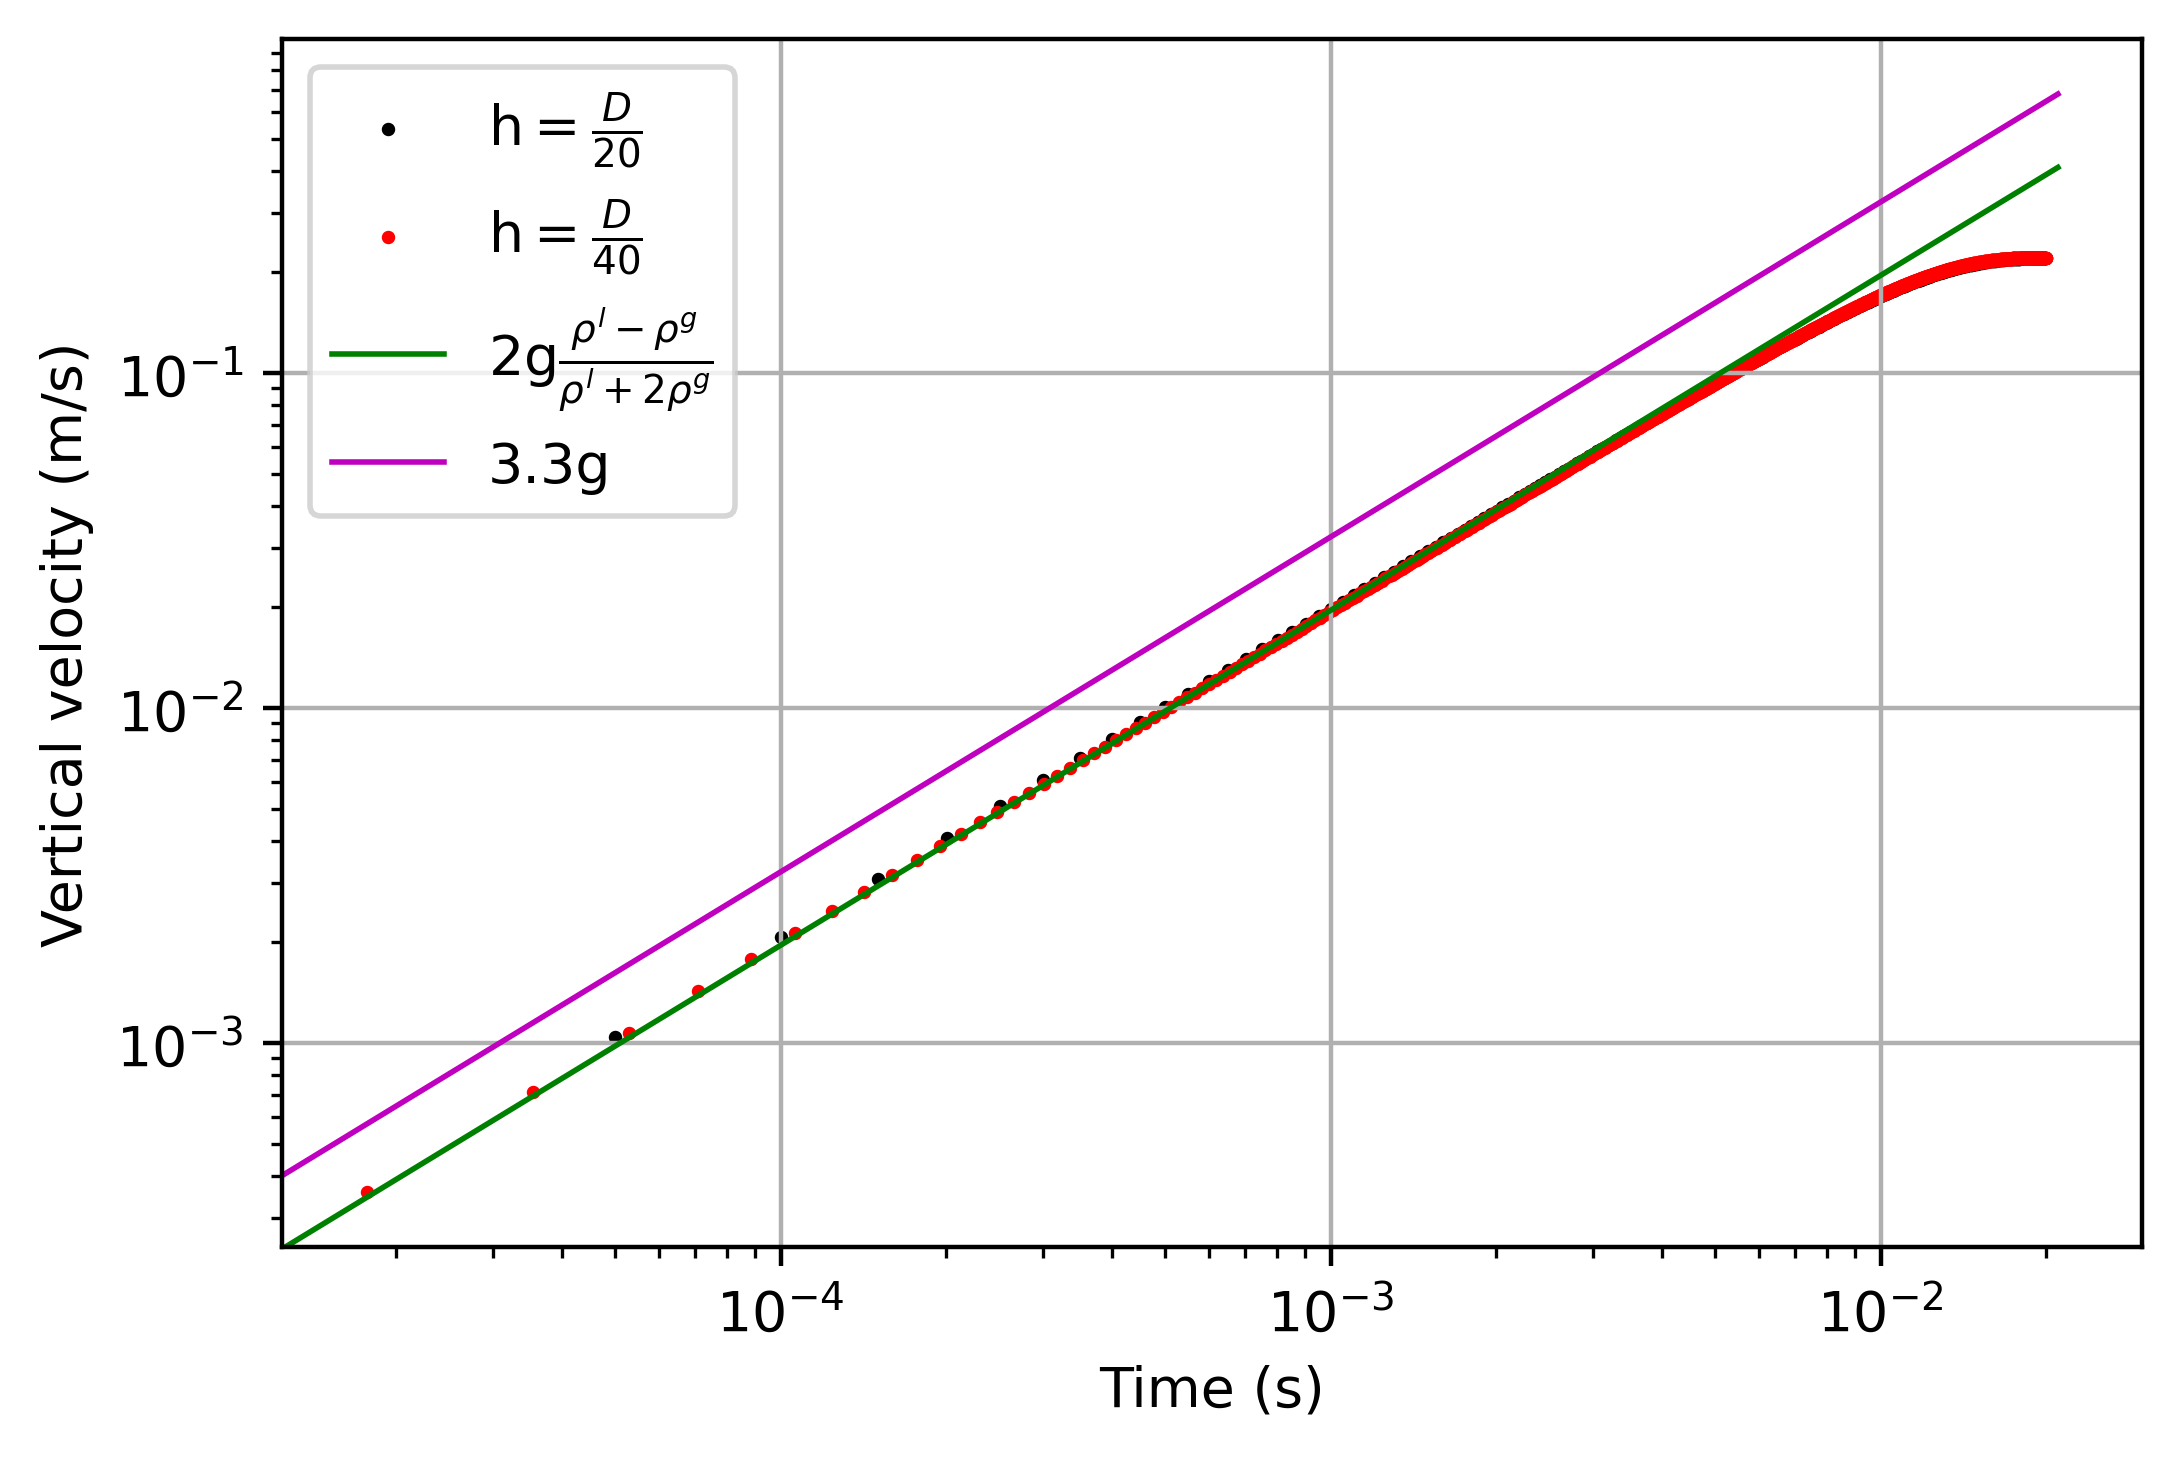

In [6]:
plt.scatter(df20["time"], df20["z-Velocity"],s=2, label=r"h$=\frac{D}{20}$", color='black')
plt.scatter(df40["time"], df40["z-Velocity"], s=2,label=r"h$=\frac{D}{40}$", color='red')

rcParams["figure.dpi"] = 400
g = 9.80665
rhol= 998.21
rhog = 1.2047

acc = 2*g*(rhol - rhog)/(rhol+2*rhog)

axes = plt.gca()
xVal= np.linspace(0, 0.021, num=1000)
yVal1= acc*xVal
yVal2= 3.3*g*xVal

plt.plot(xVal, yVal1,color='g', label=r"$2$g$\frac{\rho^l-\rho^g}{\rho^l+2\rho^g}$", linewidth=1)
plt.plot(xVal, yVal2, color='m', label="3.3g", linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Vertical velocity (m/s)")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.legend()
plt.savefig('VelTimeLogScale.png', facecolor='w', dpi=400)
plt.show()

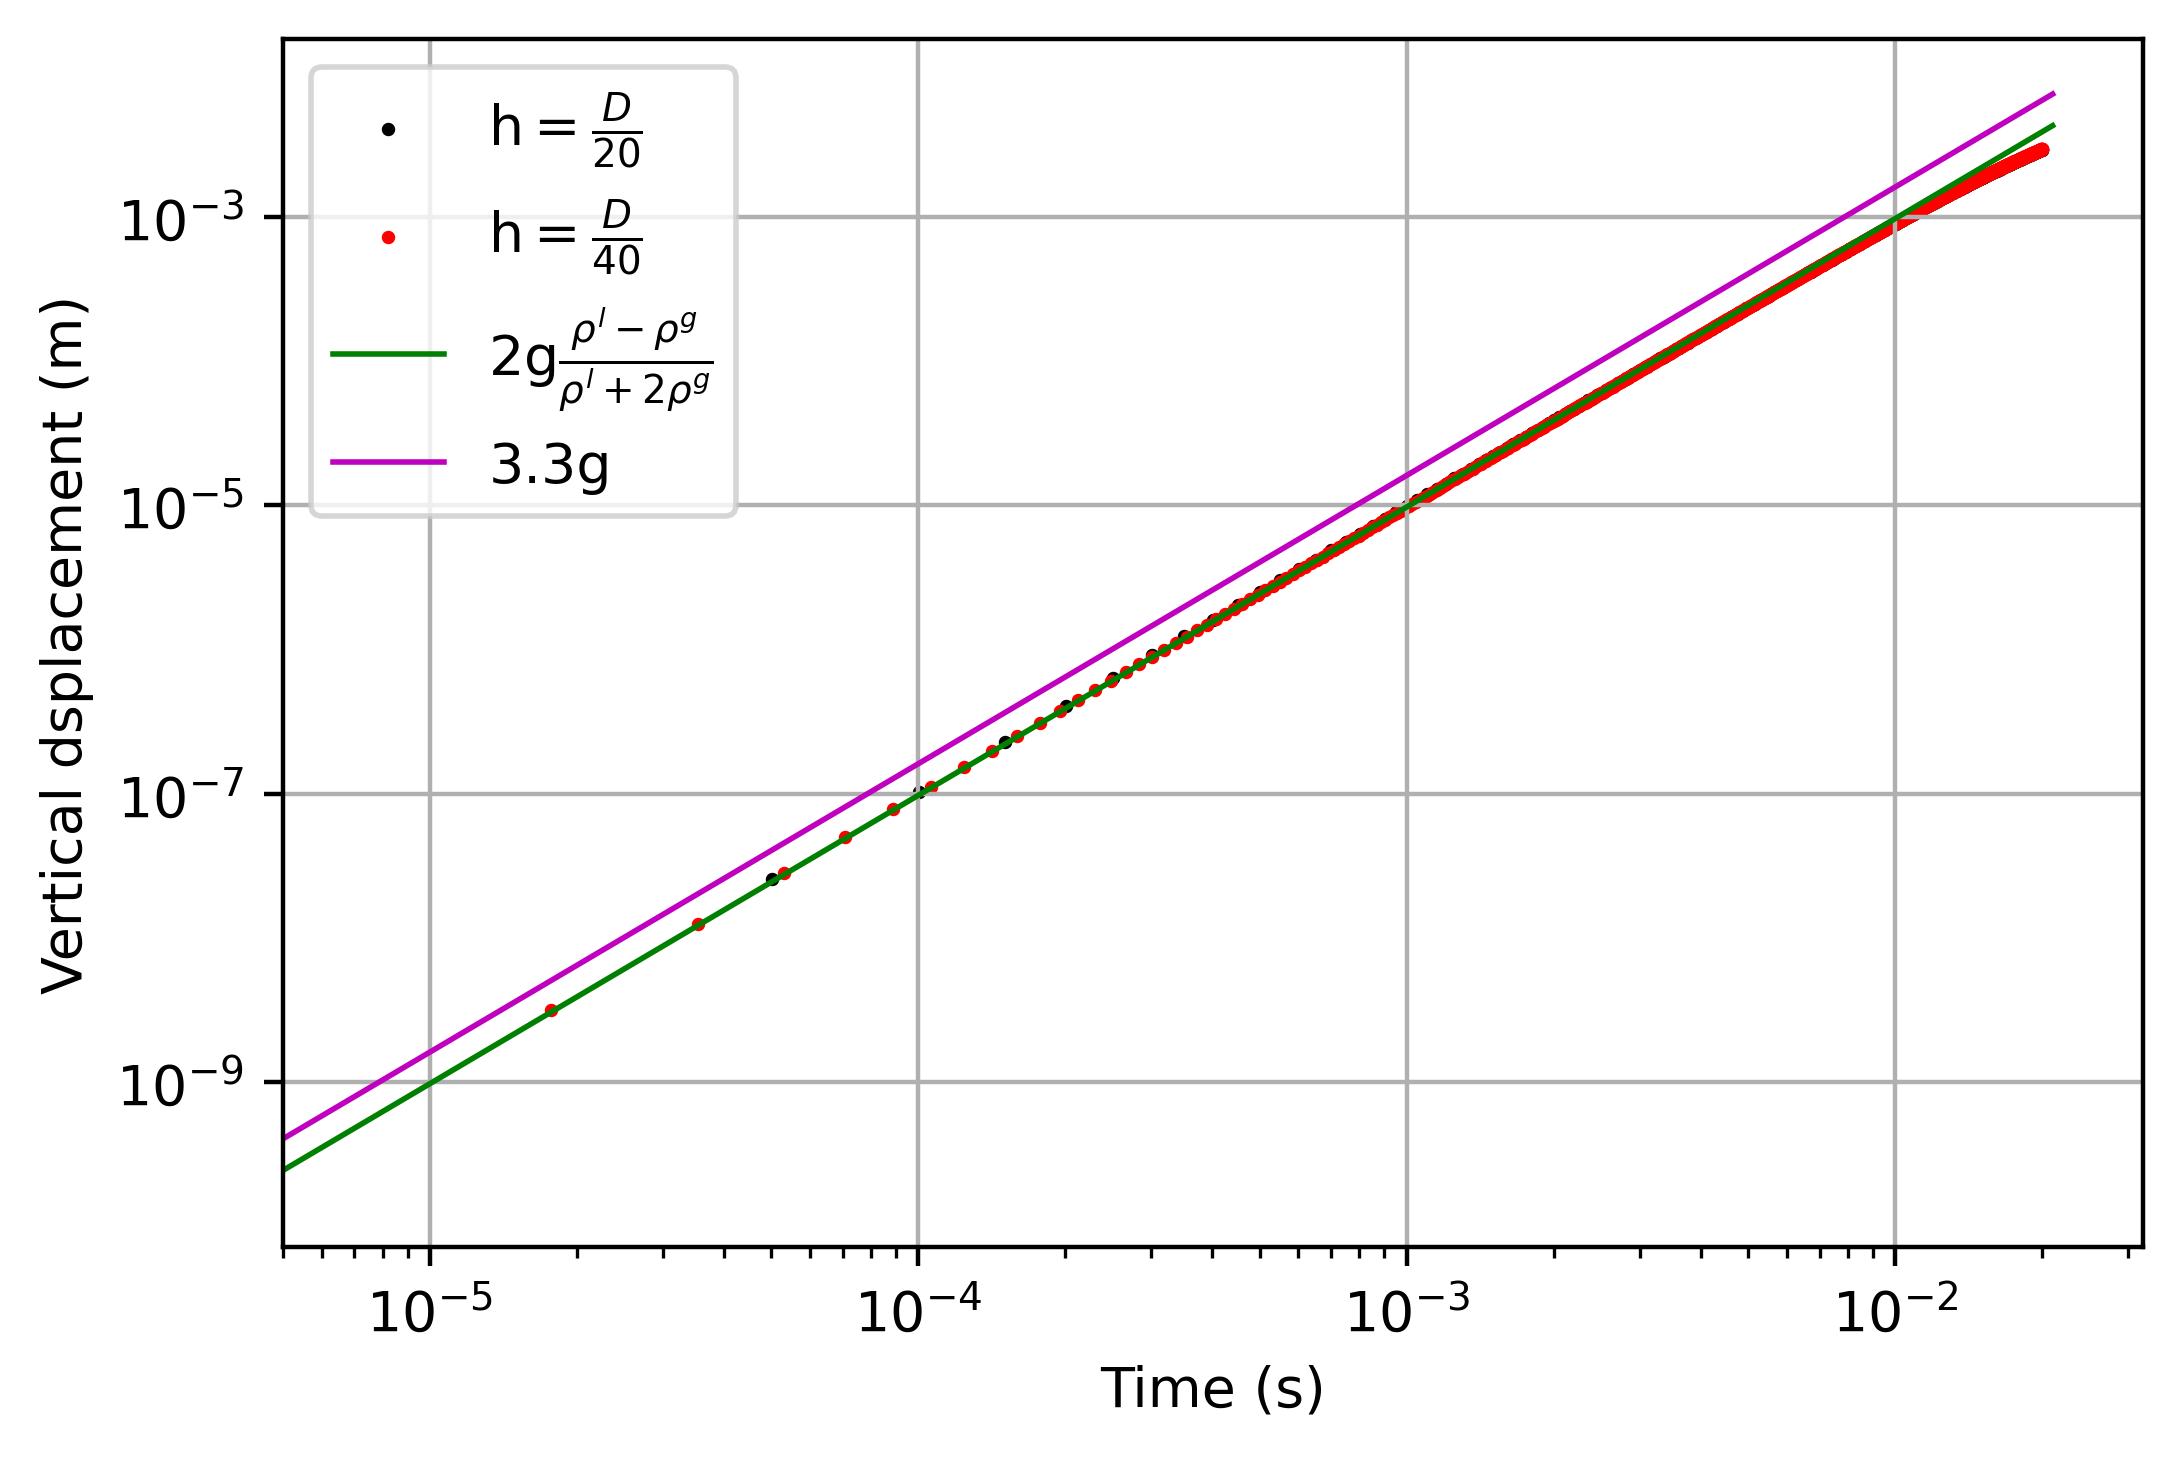

In [7]:
plt.scatter(df20["time"], df20["bubbleCenterz"],s=2, label=r"h$=\frac{D}{20}$", color='black')
plt.scatter(df40["time"], df40["bubbleCenterz"], s=2,label=r"h$=\frac{D}{40}$", color='red')

xVal = np.linspace(0, 0.021, num=5000) 
yVal1= 0.5*acc*xVal*xVal
yVal2= 0.5*3.3*g*xVal*xVal

plt.plot(xVal, yVal1, color='green', label=r"$2$g$\frac{\rho^l-\rho^g}{\rho^l+2\rho^g}$", linewidth=1)
plt.plot(xVal, yVal2, color='m', label="3.3g", linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Vertical dsplacement (m)")
plt.xscale("log")
plt.yscale("log")
plt.xlim(5e-6)
plt.grid()
plt.legend()
plt.savefig('DispTimeLogScale.png', facecolor='w',dpi=300)
plt.show()

In [ ]:
Dominik & Cassel (2015)

In [27]:
timeStepMinus9 = pd.read_csv('timeStep-MatthiasSetup_00000_templateCase/bubblepproc.dat', sep="\t", header=0)
timeStepMinus8 = pd.read_csv('timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
timeStepMinus7 = pd.read_csv('timeStep-MatthiasSetup_00002_templateCase/bubblepproc.dat', sep="\t", header=0)

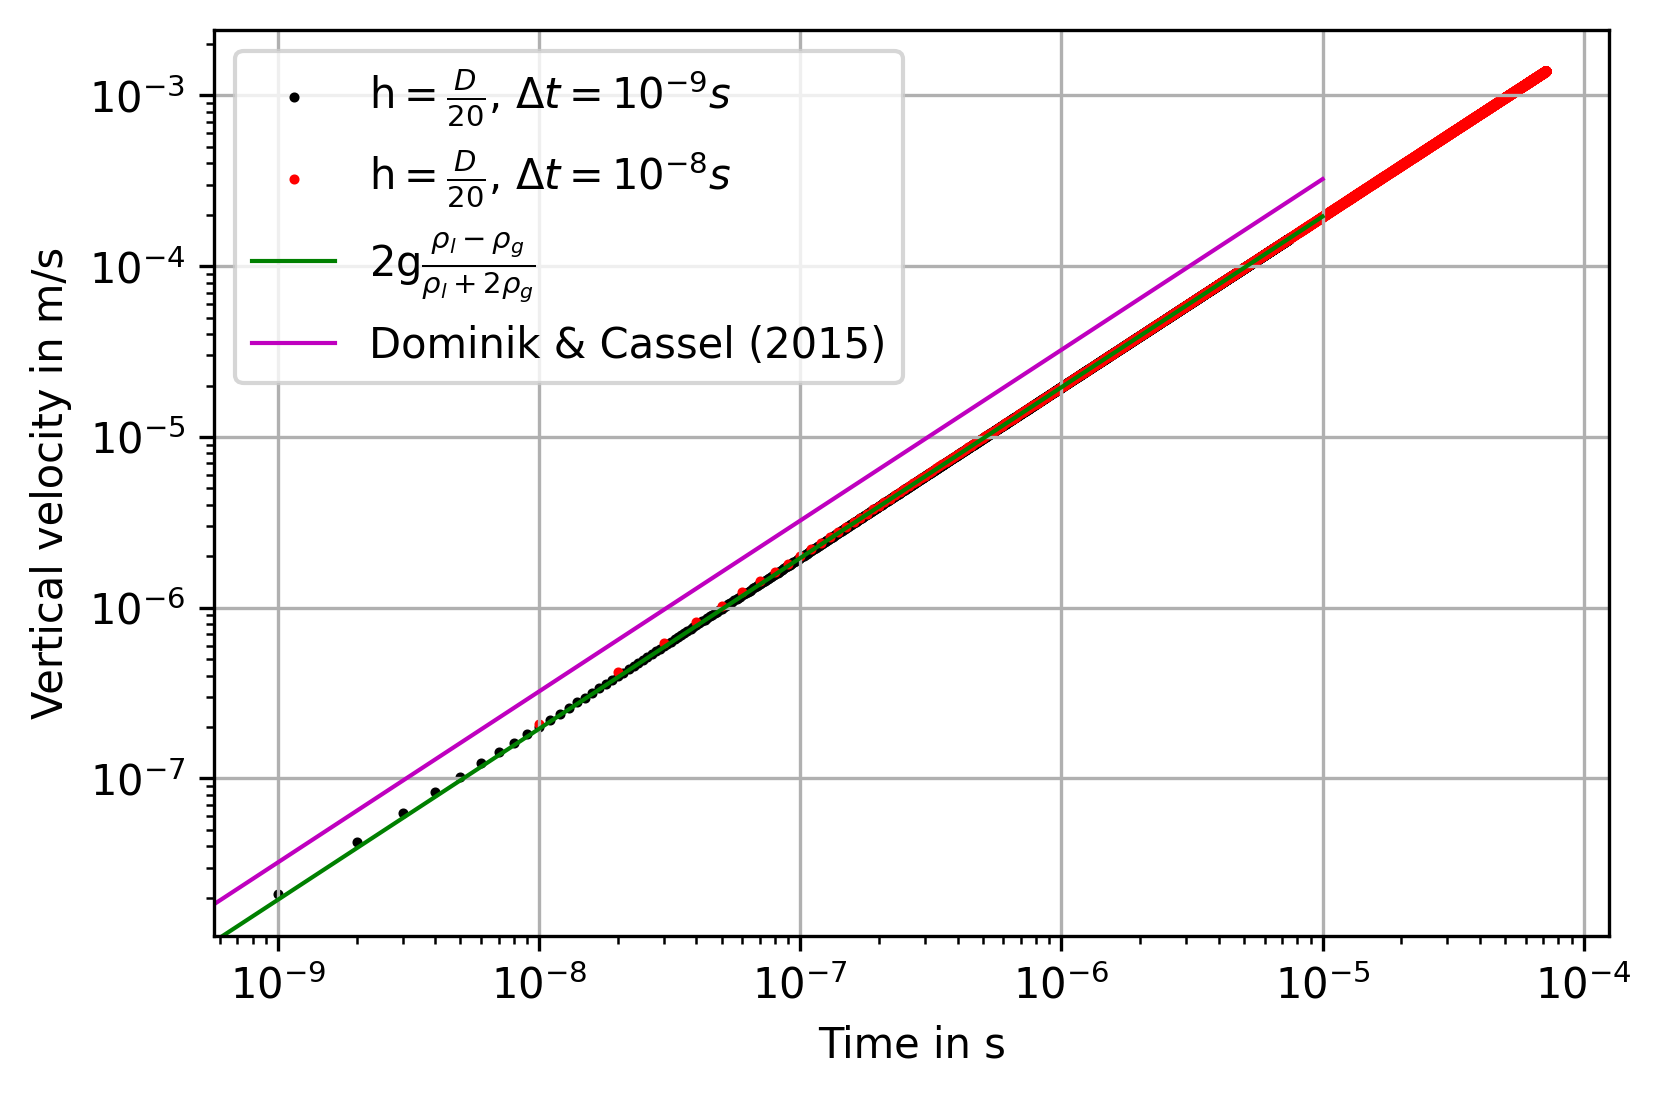

In [28]:
plt.scatter(timeStepMinus9["time"], timeStepMinus9["z-Velocity"],s=2, label=r"h$=\frac{D}{20}$, $\Delta t=10^{-9}s$", color='black')
plt.scatter(timeStepMinus8["time"], timeStepMinus8["z-Velocity"], s=2,label=r"h$=\frac{D}{20}$, $\Delta t=10^{-8}s$", color='red')

axes = plt.gca()
xVal= np.linspace(0, 1e-5, num=1000)
yVal1= acc*xVal
yVal2= 3.3*g*xVal

plt.plot(xVal, yVal1,color='g', label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}$", linewidth=1)
plt.plot(xVal, yVal2, color='m', label="Dominik & Cassel (2015)", linewidth=1)
plt.xlabel("Time in s")
plt.ylabel("Vertical velocity in m/s")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.legend()
plt.savefig('smallDelT_VtLogScale.png', facecolor='w', dpi=300)
plt.show()

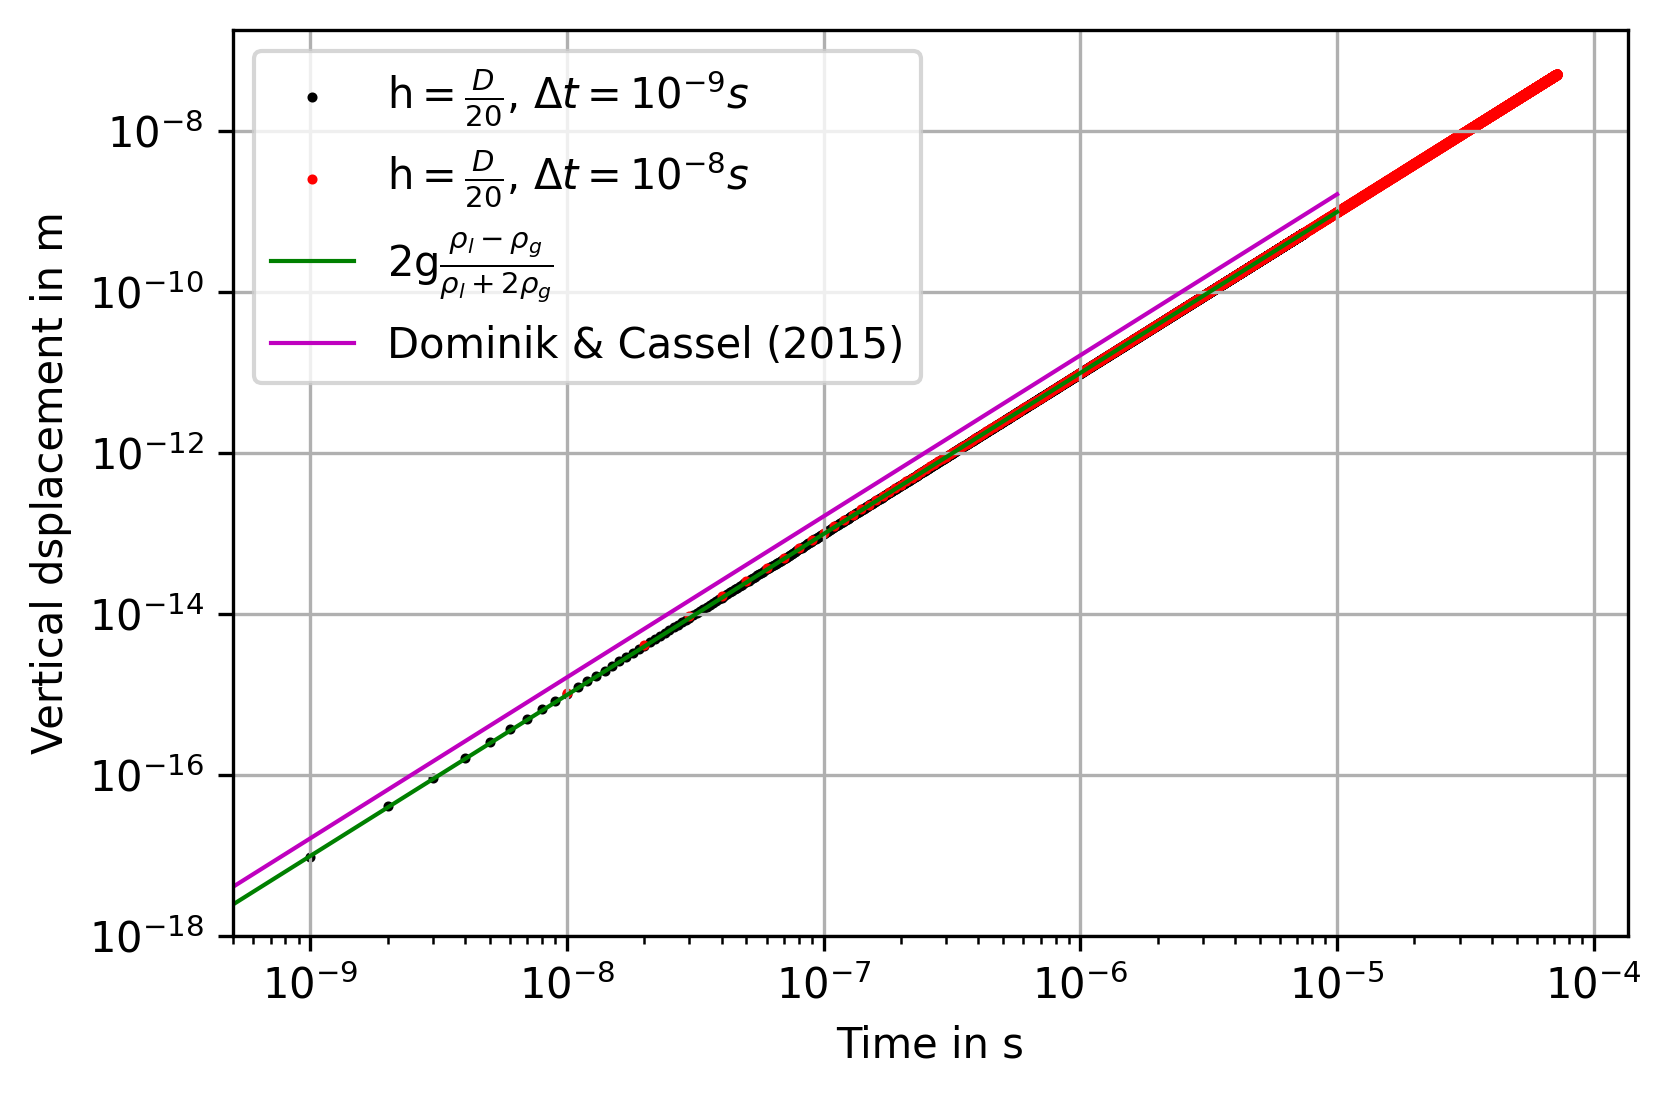

In [29]:
plt.scatter(timeStepMinus9["time"], timeStepMinus9["bubbleCenterz"],s=2, label=r"h$=\frac{D}{20}$, $\Delta t=10^{-9}s$", color='black')
plt.scatter(timeStepMinus8["time"], timeStepMinus8["bubbleCenterz"], s=2,label=r"h$=\frac{D}{20}$, $\Delta t=10^{-8}s$", color='red')

axes = plt.gca()
xVal= np.linspace(0, 1e-5, num=50000)
yVal1= 0.5*acc*xVal*xVal
yVal2= 0.5*3.3*g*xVal*xVal

plt.plot(xVal, yVal1,color='g', label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}$", linewidth=1)
plt.plot(xVal, yVal2, color='m', label="Dominik & Cassel (2015)", linewidth=1)
plt.xlabel("Time in s")
plt.ylabel("Vertical dsplacement in m")
plt.xscale("log")
plt.yscale("log")
plt.xlim(5e-10)
plt.ylim(1e-18)
plt.grid()
plt.legend()
plt.savefig('smallDelT_DisptLogScale.png', facecolor='w', dpi=300)
plt.show()

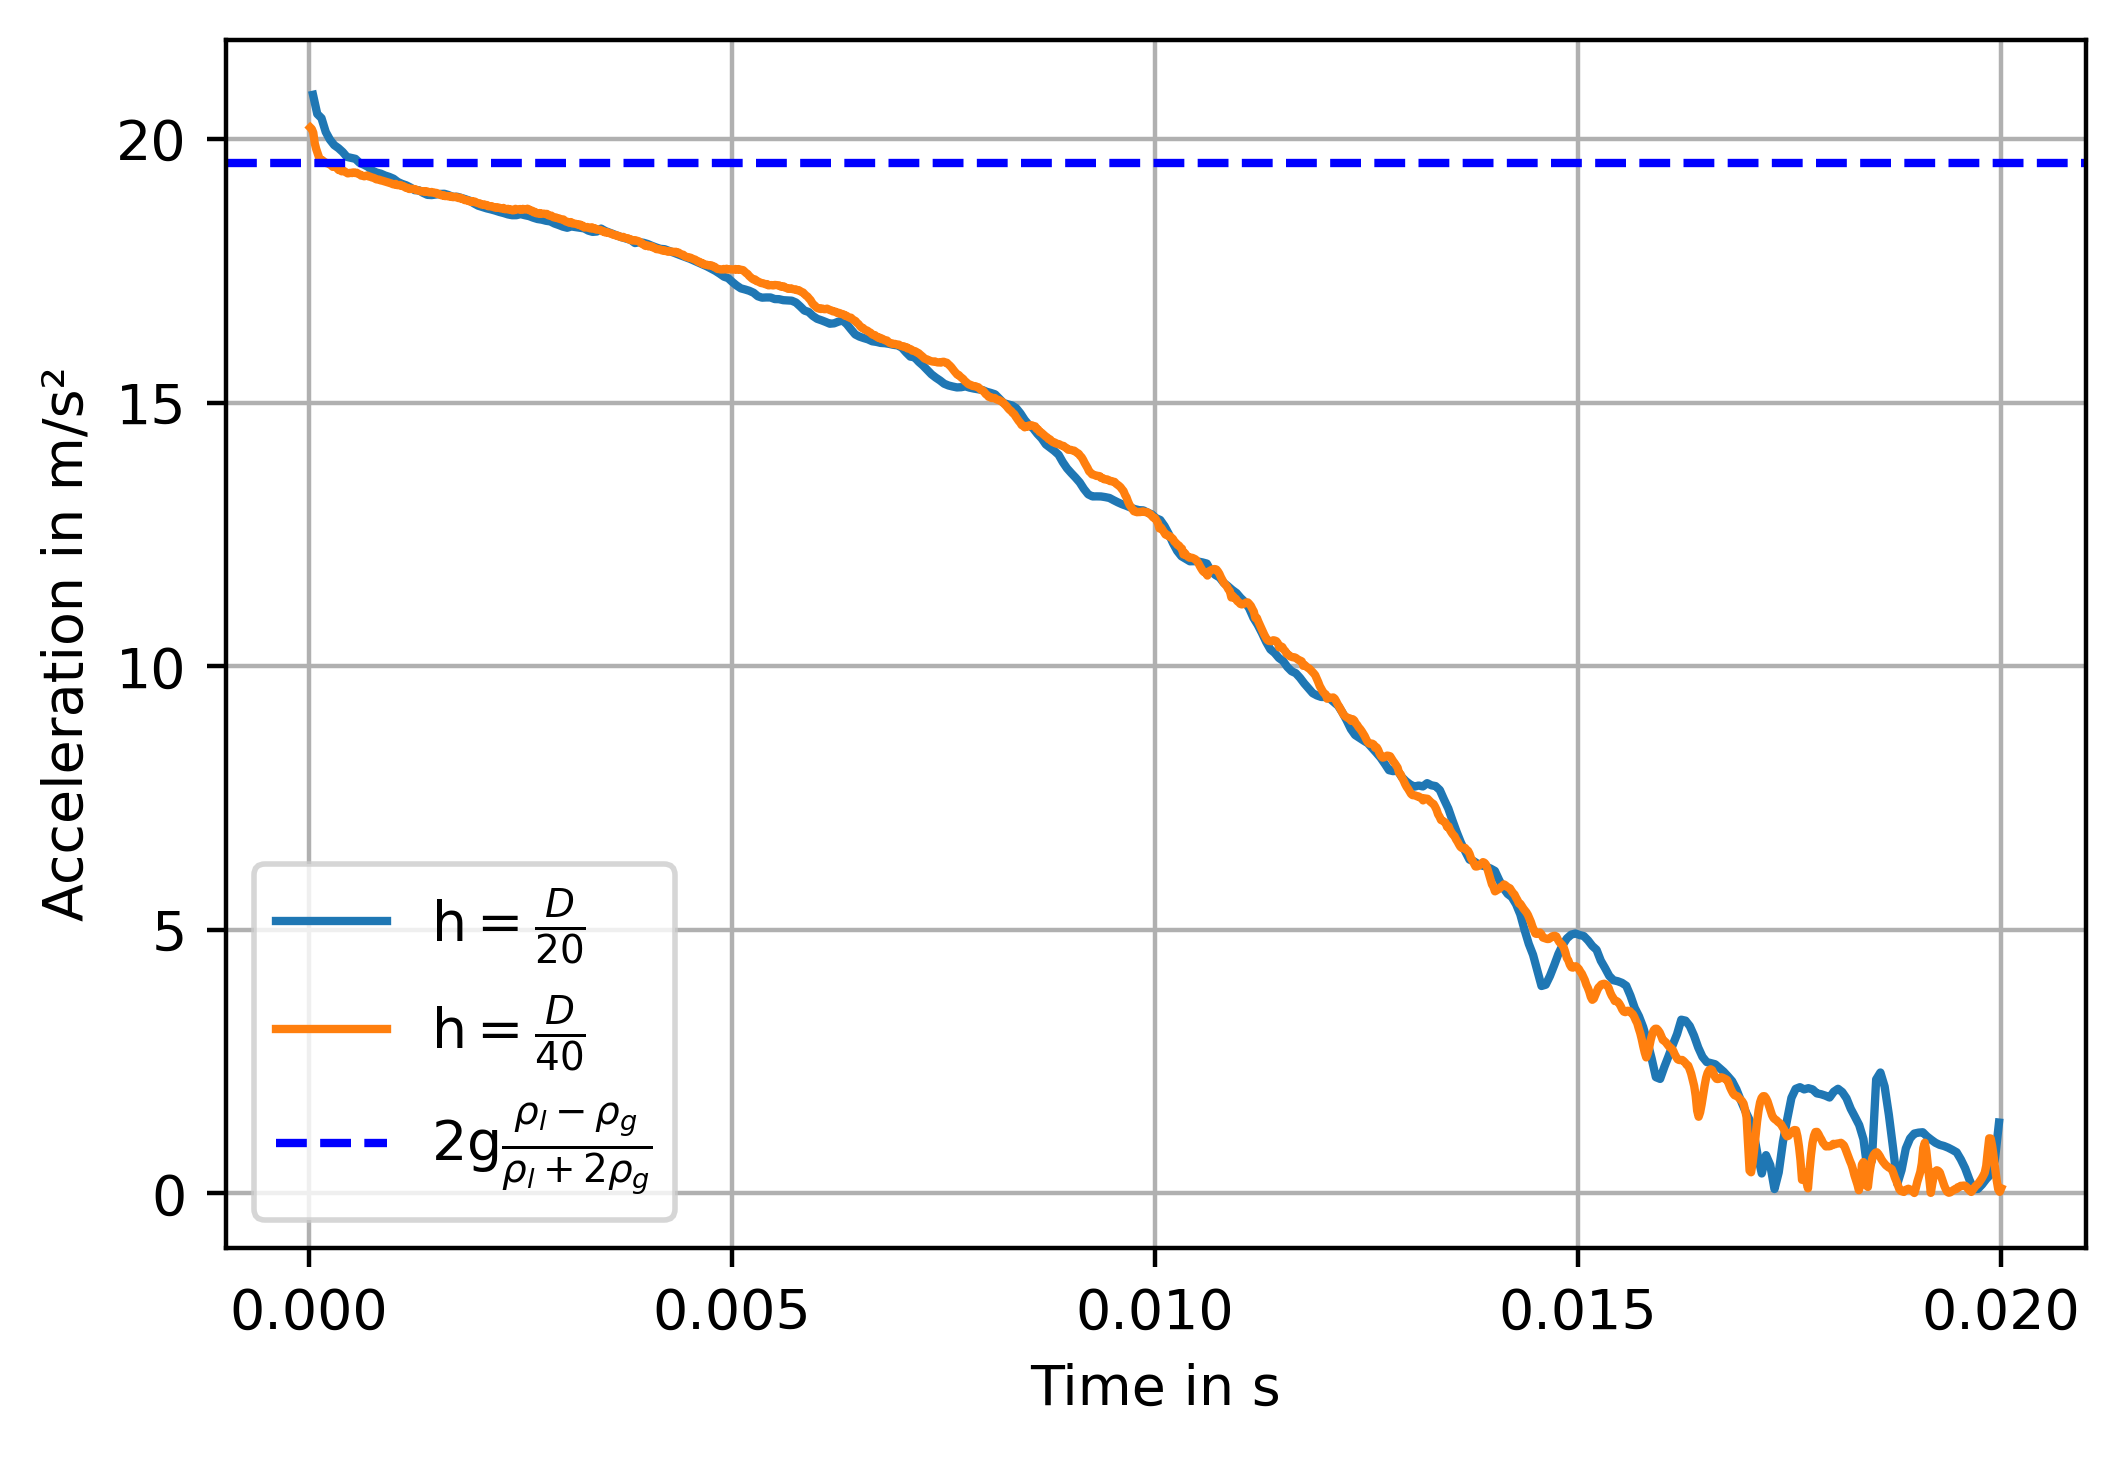

In [30]:
df20 = dframe_isoAdv_risingU.loc[dframe_isoAdv_risingU.index.get_level_values('resolution') == 240]
df40 = dframe_isoAdv_risingU.loc[dframe_isoAdv_risingU.index.get_level_values('resolution') == 480]

accN20 = linalg.norm(df20[["x-Velocity","y-Velocity","z-Velocity"]].diff(), axis=1)/df20["time"].diff()
accN40 = linalg.norm(df40[["x-Velocity","y-Velocity","z-Velocity"]].diff(), axis=1)/df40["time"].diff()

rcParams["figure.dpi"] = 400
g = 9.80665
rhol= 998.21
rhog = 1.2047

acc = 2*g*(rhol - rhog)/(rhol+2*rhog)
t=np.linspace(0,0.02)
vel=acc*t


plt.plot(df20["time"], accN20, label=r"h$=\frac{D}{20}$")
plt.plot(df40["time"], accN40, label=r"h$=\frac{D}{40}$")
plt.axhline(y=acc, linestyle='--', color='blue', label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}$")
plt.xticks([0,0.005,0.01,0.015,0.02])
plt.xlabel("Time in s")
plt.ylabel("Acceleration in m/s²")
plt.grid()
plt.legend()
plt.savefig('accPlot_zoomedIn.png', facecolor='w')
plt.show()

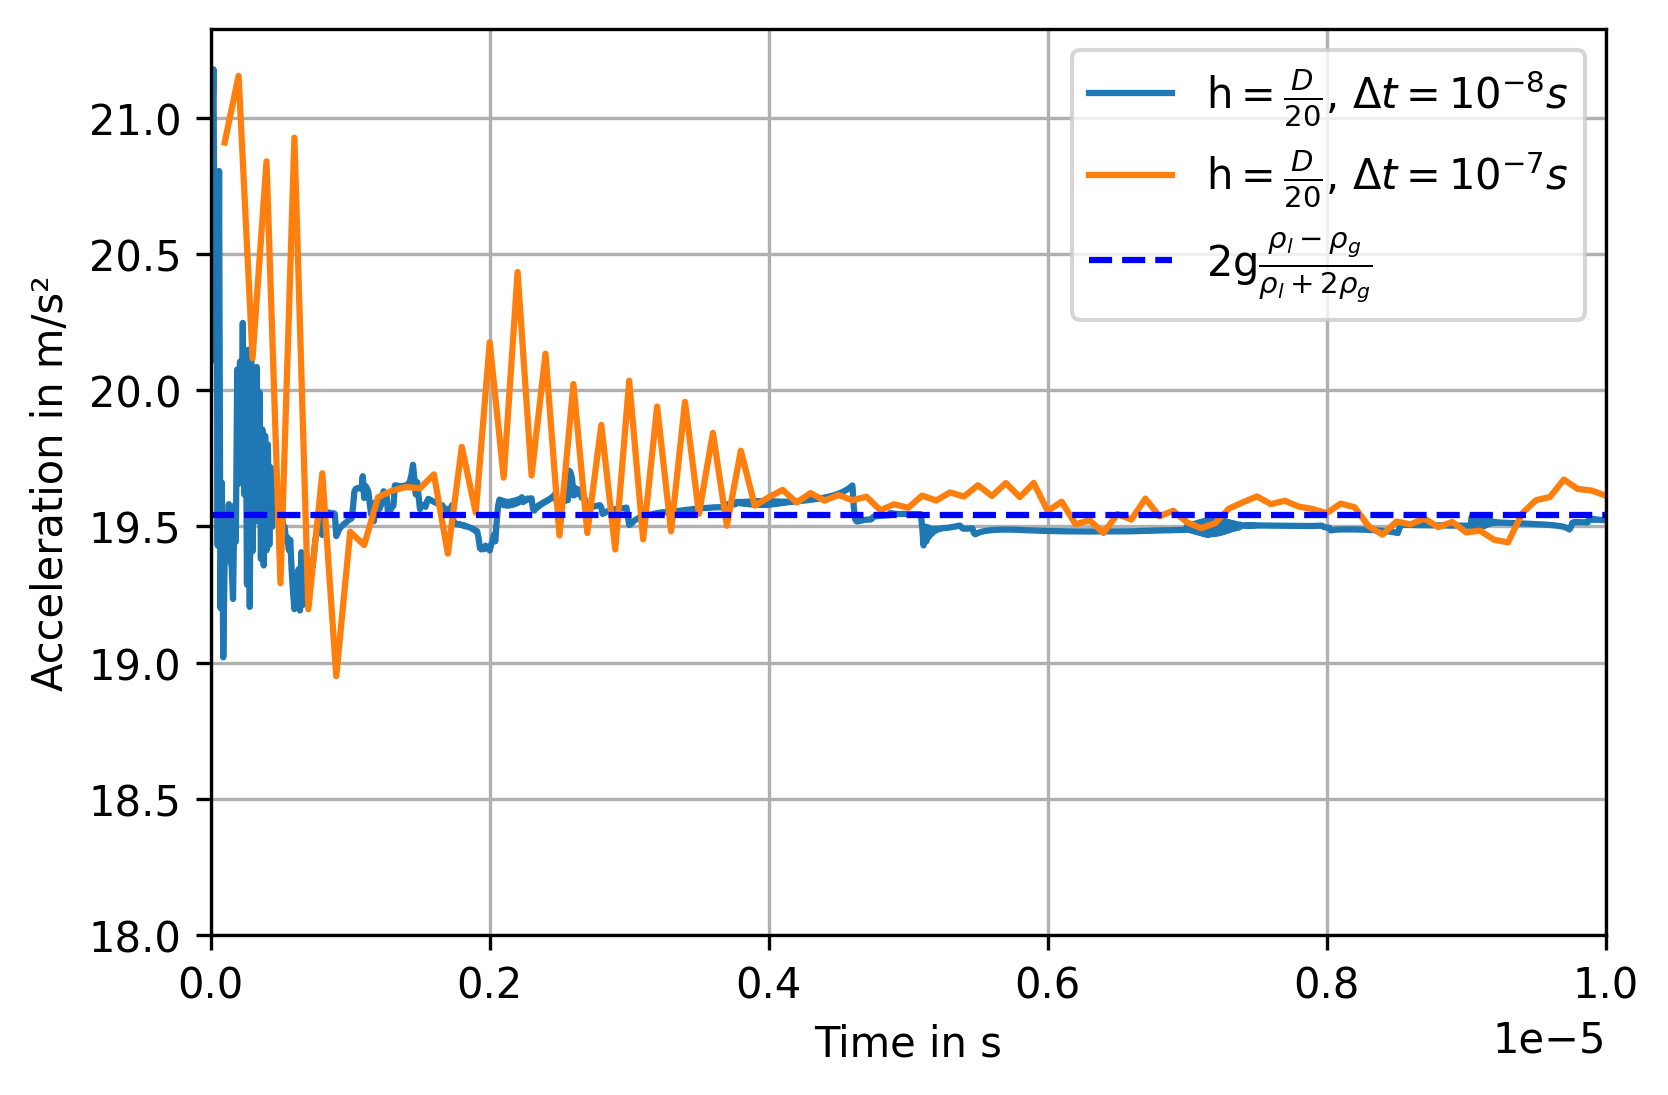

In [31]:
accMinus8 = timeStepMinus8["z-Velocity"].diff()/timeStepMinus8["time"].diff()
accMinus7 = timeStepMinus7["z-Velocity"].diff()/timeStepMinus7["time"].diff()

rcParams["figure.dpi"] = 300
g = 9.80665
rhol= 997
rhog = 1.225

acc = 2*g*(rhol - rhog)/(rhol+2*rhog)


plt.plot(timeStepMinus8["time"], accMinus8, label=r"h$=\frac{D}{20}$, $\Delta t=10^{-8}s$")
plt.plot(timeStepMinus7["time"], accMinus7, label=r"h$=\frac{D}{20}$, $\Delta t=10^{-7}s$")
plt.axhline(y=acc, linestyle='--', color='blue', label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}$")
plt.xlim(0,1e-5) 
plt.ylim(18)
plt.xlabel("Time in s")
plt.ylabel("Acceleration in m/s²")
plt.grid()
plt.legend()
plt.savefig('accPlot_timeStepMinus8_comp.png', facecolor='w')
plt.show()

In [19]:
Ellipsoid = pd.read_csv('N80_3D_ST_Ellipsoid-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accEllipsoid = Ellipsoid["z-Velocity"].diff()/Ellipsoid["time"].diff()

EllipsoidNoST = pd.read_csv('N80_3D_noST_Ellipsoid-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accEllipsoidNoST = EllipsoidNoST["z-Velocity"].diff()/EllipsoidNoST["time"].diff()

EllipsoidV1NoST = pd.read_csv('N80_3D_noST_EllipsoidV1-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accEllipsoidV1NoST = EllipsoidV1NoST["z-Velocity"].diff()/EllipsoidV1NoST["time"].diff()

EllipsoidV2NoST = pd.read_csv('N80_3D_noST_EllipsoidV2-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accEllipsoidV2NoST = EllipsoidV2NoST["z-Velocity"].diff()/EllipsoidV2NoST["time"].diff()

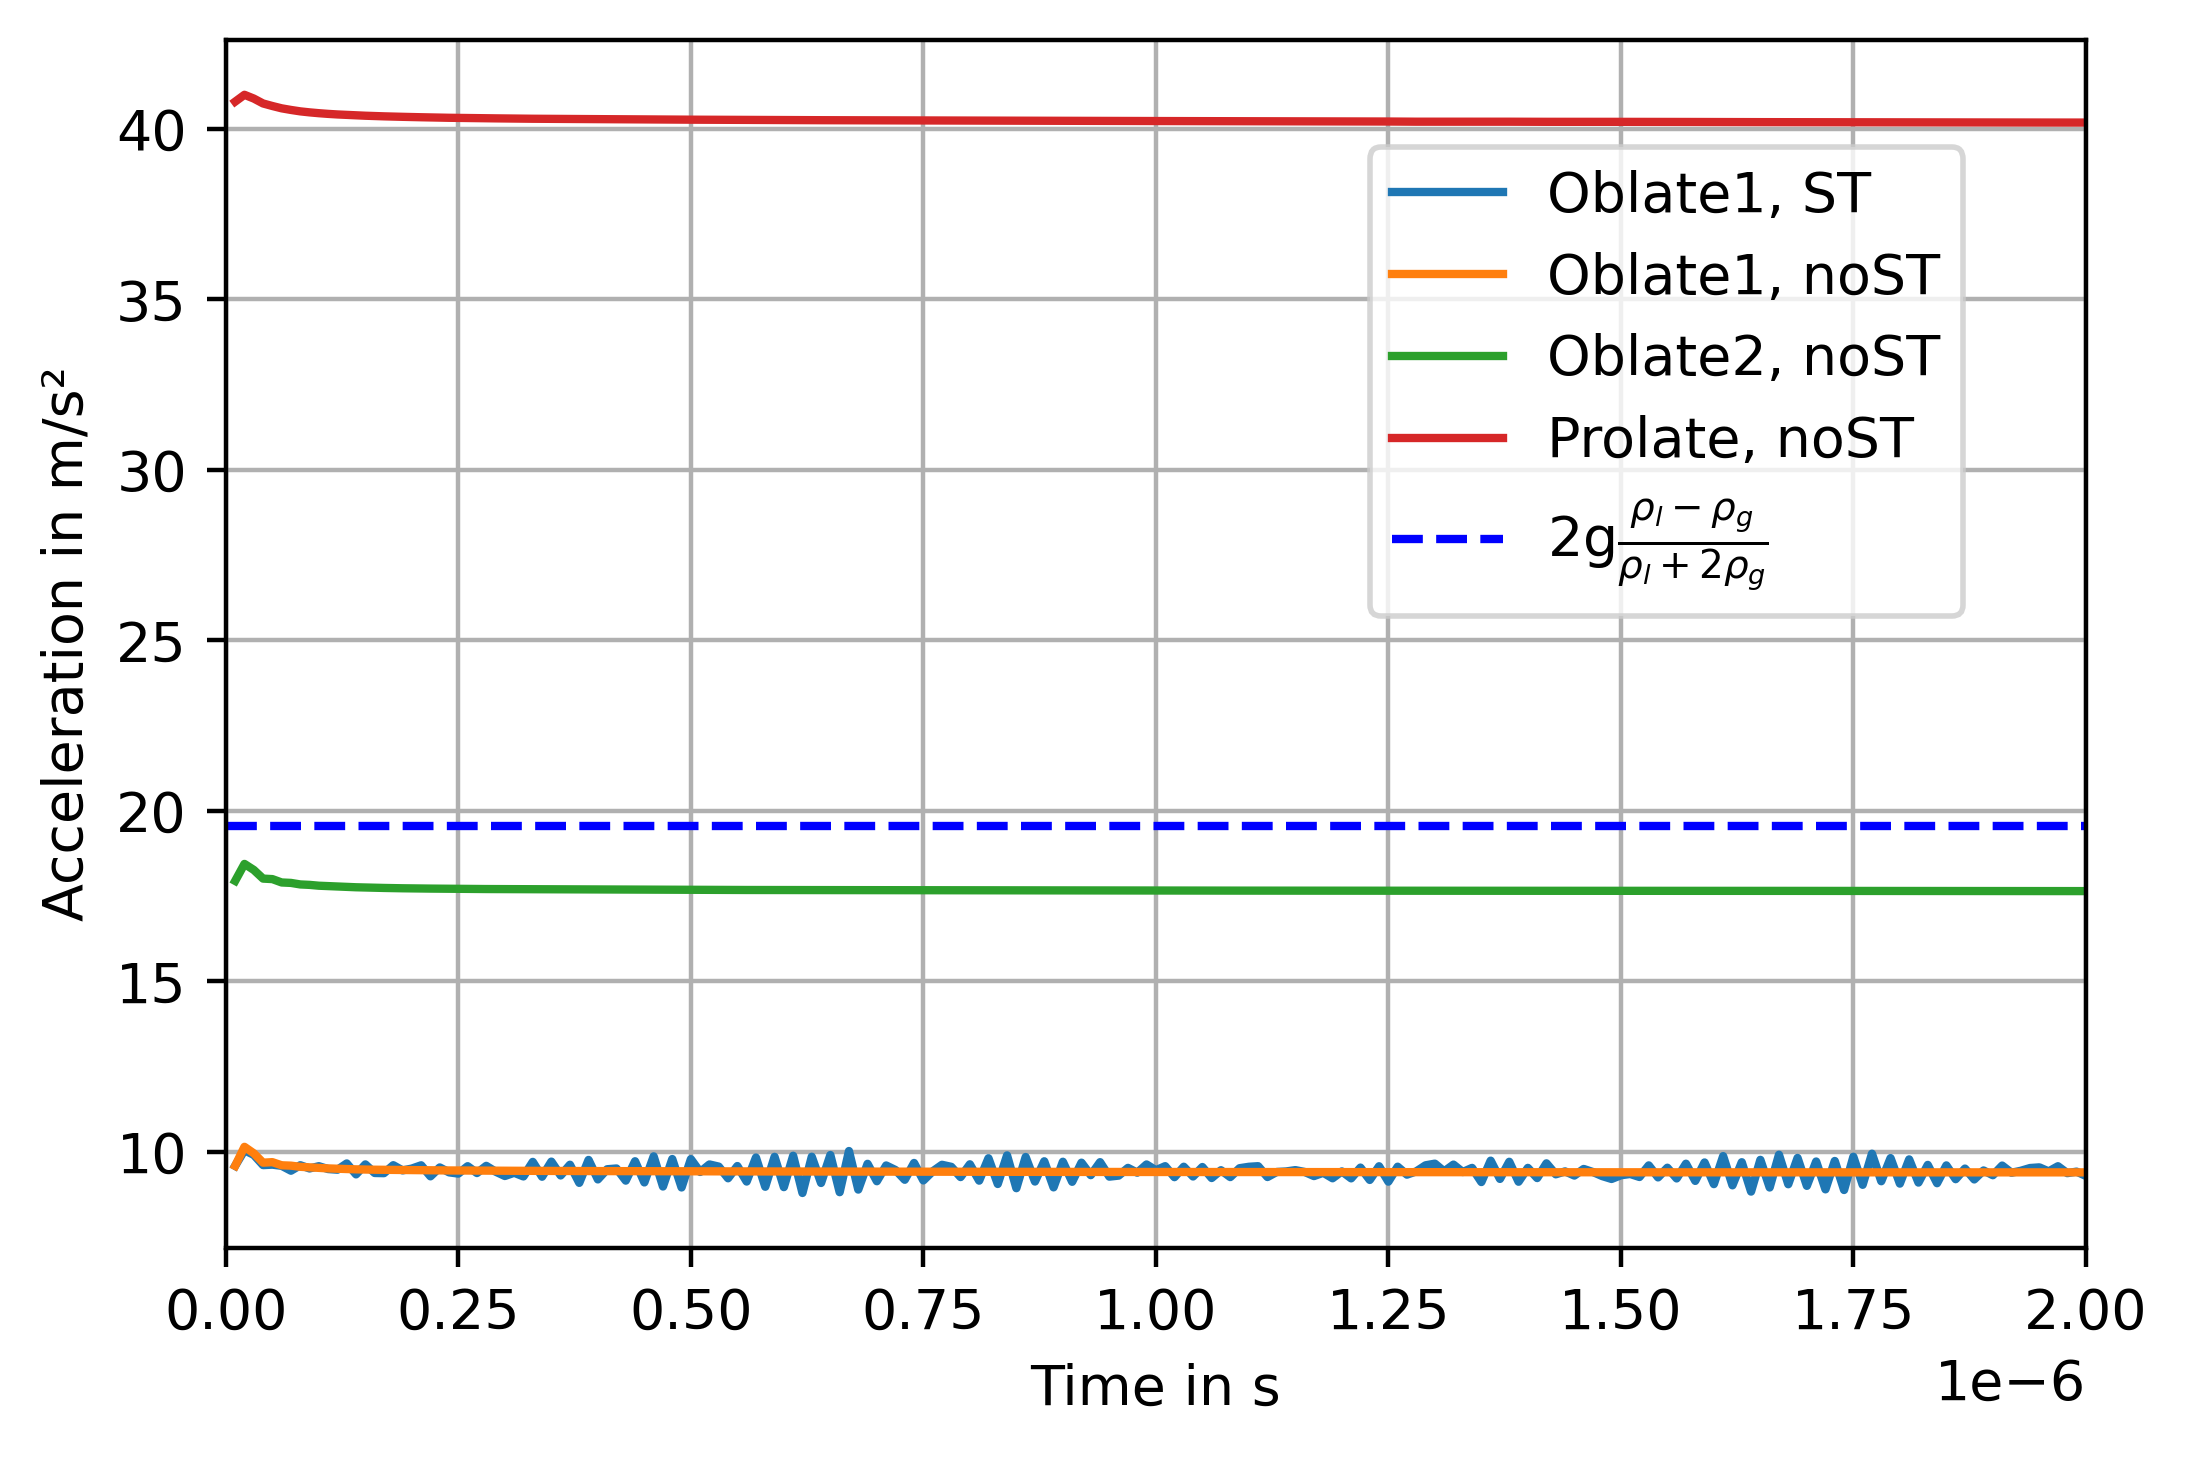

In [23]:
rcParams["figure.dpi"] = 400
g = 9.80665
rhol= 997
rhog = 1.225

shapePar = 0.00159155 / 0.003
shapeParV1 = 0.00229183 / 0.0025
acc = 2*g*(rhol - rhog)/(rhol+2*rhog)


#plt.plot(timeStepMinus8["time"], accMinus8, label=r"h$=\frac{D}{20}$, $\Delta t=10^{-8}s$")
plt.plot(Ellipsoid["time"], accEllipsoid, label=r"Oblate1, ST")
plt.plot(EllipsoidNoST["time"], accEllipsoidNoST, label=r"Oblate1, noST")
plt.plot(EllipsoidV1NoST["time"], accEllipsoidV1NoST, label=r"Oblate2, noST")
plt.plot(EllipsoidV2NoST["time"], accEllipsoidV2NoST, label=r"Prolate, noST")
plt.axhline(y=acc, linestyle='--', color='blue', label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}$")
#plt.axhline(y=acc*shapePar, linestyle='--', color='green', label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}$*P0")
#plt.axhline(y=acc*shapeParV1, linestyle='--', color='red',label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}*P1$")
plt.xlim(0,2e-6) 
#plt.ylim(18)
plt.xlabel("Time in s")
plt.ylabel("Acceleration in m/s²")
plt.grid()
plt.legend(bbox_to_anchor=(0.6, 0.5))
plt.savefig('accPlot_Ellipsoids_comp.png', facecolor='w')
plt.show()

In [2]:
CylinderV0NoST = pd.read_csv('Ellipsoid_Cylinder/N80_3D_noST_CylinderV0-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accCylinderV0NoST = CylinderV0NoST["z-Velocity"].diff()/CylinderV0NoST["time"].diff()

CylinderV1NoST = pd.read_csv('Ellipsoid_Cylinder/N80_3D_noST_CylinderV1-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accCylinderV1NoST = CylinderV1NoST["z-Velocity"].diff()/CylinderV1NoST["time"].diff()

CylinderV2NoST = pd.read_csv('Ellipsoid_Cylinder/N80_3D_noST_CylinderV2-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accCylinderV2NoST = CylinderV2NoST["z-Velocity"].diff()/CylinderV2NoST["time"].diff()

CylinderV3NoST = pd.read_csv('Ellipsoid_Cylinder/N80_3D_noST_CylinderV3-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accCylinderV3NoST = CylinderV3NoST["z-Velocity"].diff()/CylinderV3NoST["time"].diff()

CylinderV4NoST = pd.read_csv('Ellipsoid_Cylinder/N80_3D_noST_CylinderV4-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accCylinderV4NoST = CylinderV4NoST["z-Velocity"].diff()/CylinderV4NoST["time"].diff()

CylinderV5NoST = pd.read_csv('Ellipsoid_Cylinder/N80_3D_noST_CylinderV5-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accCylinderV5NoST = CylinderV5NoST["z-Velocity"].diff()/CylinderV5NoST["time"].diff()

CylinderV6NoST = pd.read_csv('Ellipsoid_Cylinder/N80_3D_noST_CylinderV6-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accCylinderV6NoST = CylinderV6NoST["z-Velocity"].diff()/CylinderV6NoST["time"].diff()

CylinderV7NoST = pd.read_csv('Ellipsoid_Cylinder/N80_3D_noST_CylinderV7-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accCylinderV7NoST = CylinderV7NoST["z-Velocity"].diff()/CylinderV7NoST["time"].diff()

CylinderV8NoST = pd.read_csv('Ellipsoid_Cylinder/N80_3D_noST_CylinderV8-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
accCylinderV8NoST = CylinderV8NoST["z-Velocity"].diff()/CylinderV8NoST["time"].diff()


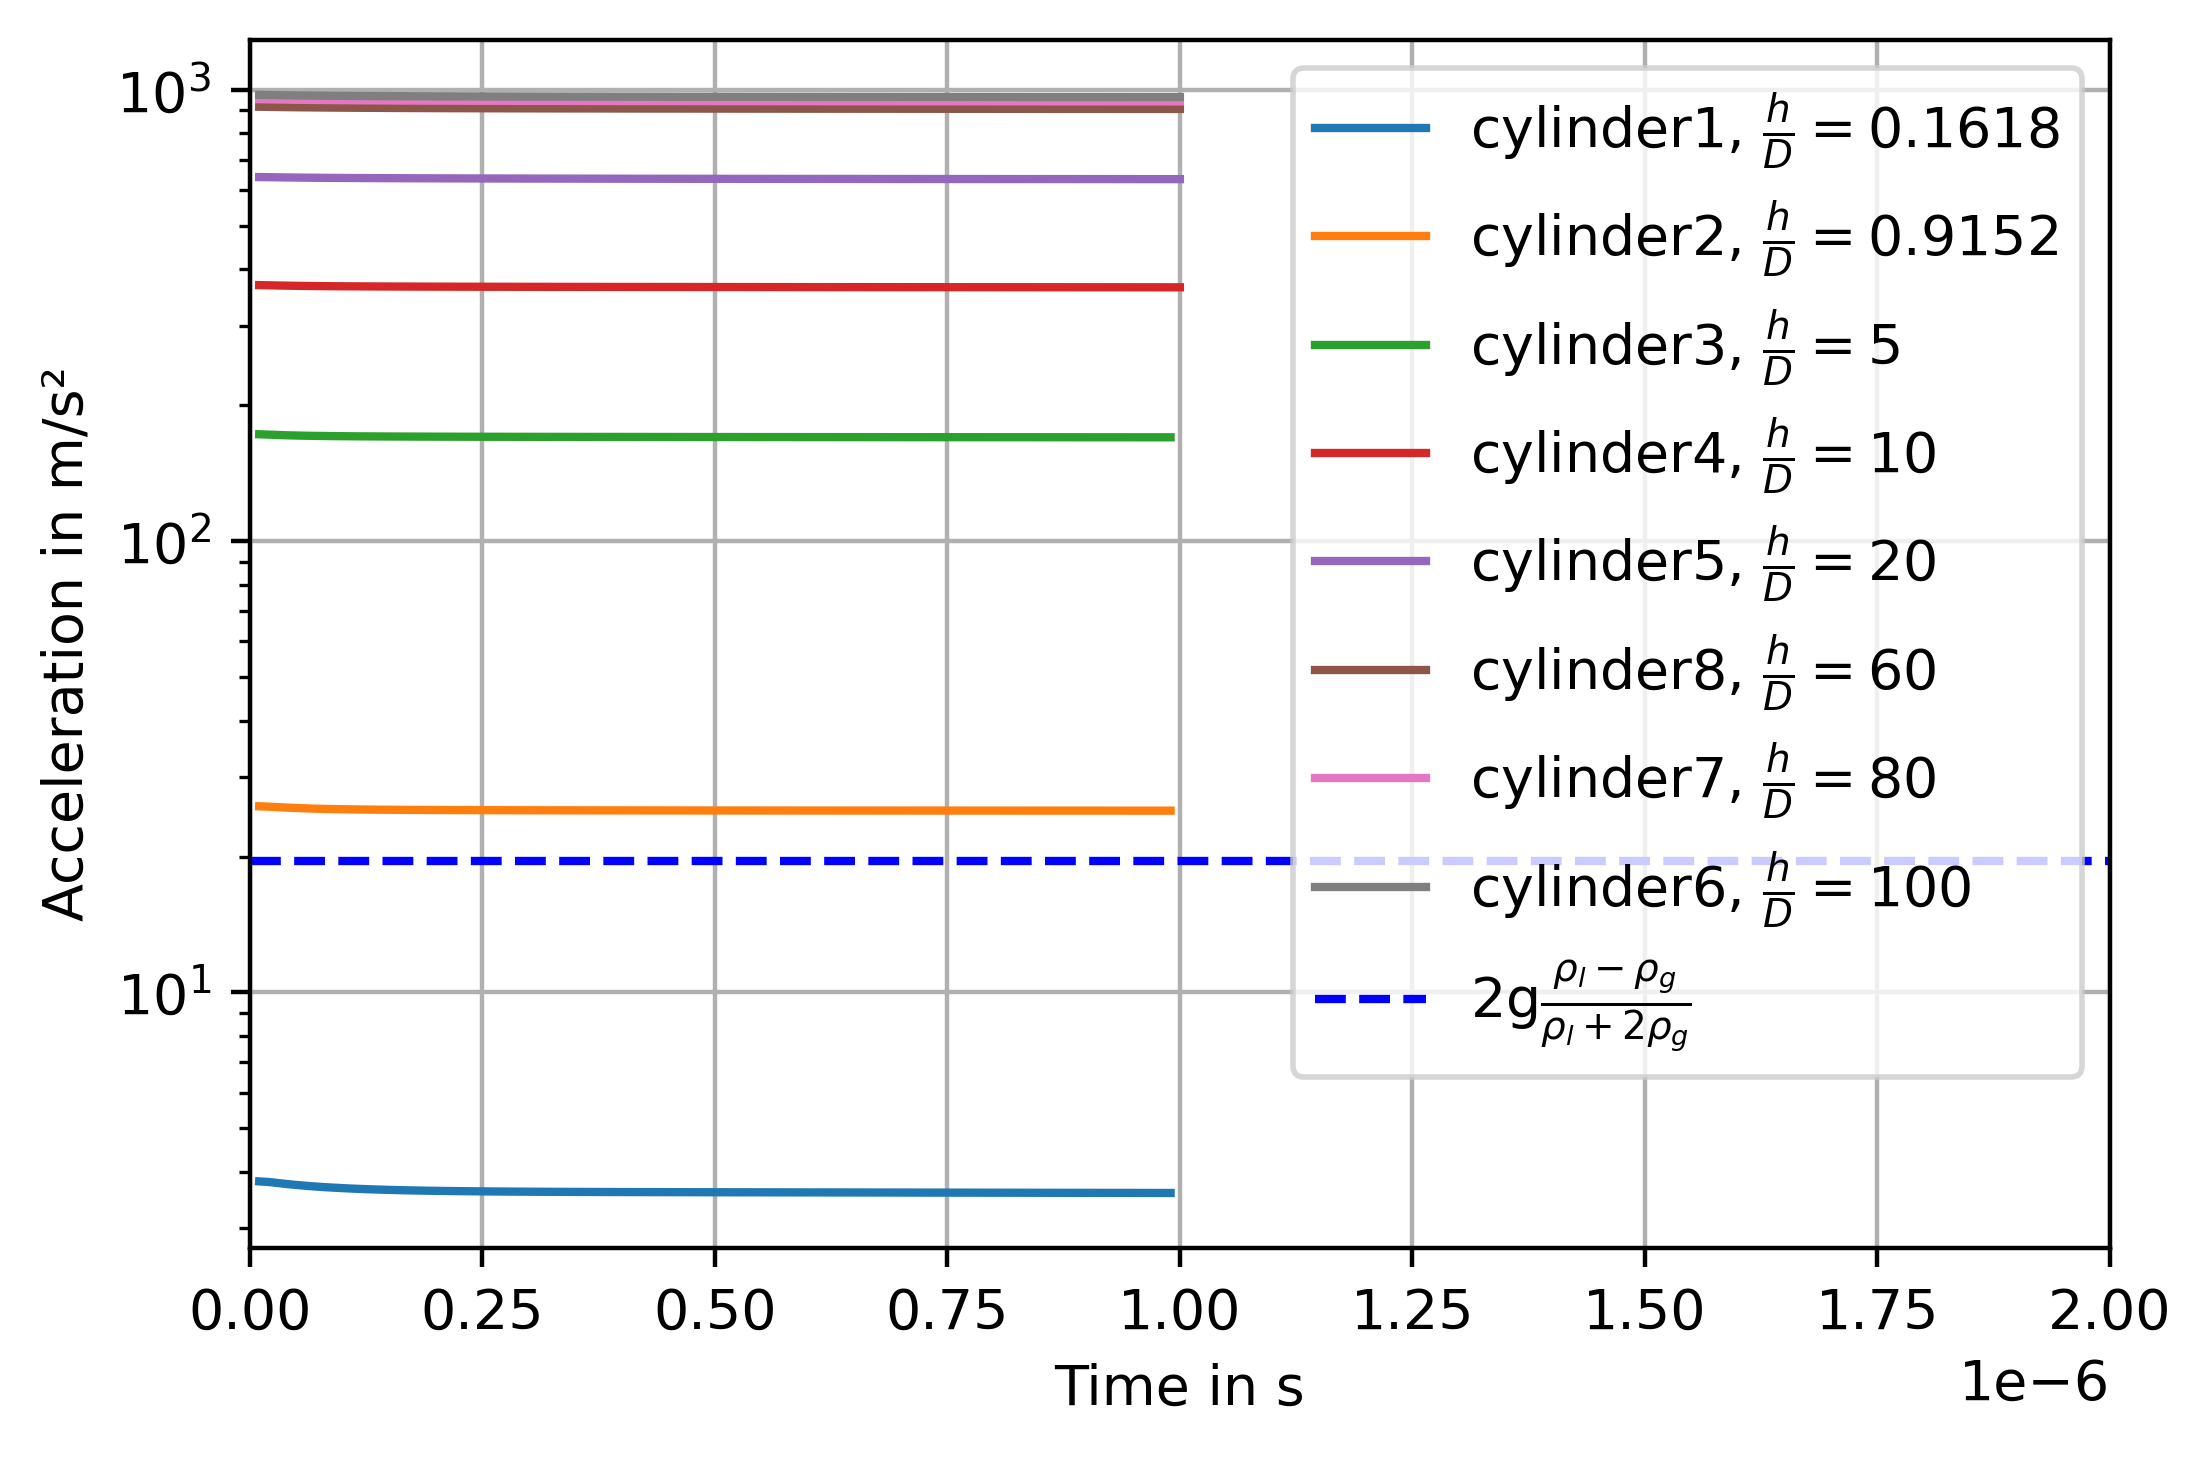

In [3]:
rcParams["figure.dpi"] = 400
g = 9.80665
rhol= 997
rhog = 1.225

shapePar = 0.00159155 / 0.003
shapeParV1 = 0.00229183 / 0.0025
acc = 2*g*(rhol - rhog)/(rhol+2*rhog)


#plt.plot(timeStepMinus8["time"], accMinus8, label=r"h$=\frac{D}{20}$, $\Delta t=10^{-8}s$")
#plt.plot(CylinderV0NoST["time"], accCylinderV0NoST, label=r"Oblate1, ST")
plt.plot(CylinderV0NoST["time"], accCylinderV0NoST, label=r"cylinder1, $\frac{h}{D}=0.1618$")
plt.plot(CylinderV1NoST["time"], accCylinderV1NoST, label=r"cylinder2, $\frac{h}{D}=0.9152$")
#plt.plot(CylinderV2NoST["time"], accCylinderV2NoST, label=r"cylinder3, $\frac{h}{D}=4.7560$")
plt.plot(CylinderV3NoST["time"].iloc[:100], accCylinderV3NoST.iloc[:100], label=r"cylinder3, $\frac{h}{D}=5$")
plt.plot(CylinderV4NoST["time"], accCylinderV4NoST, label=r"cylinder4, $\frac{h}{D}=10$")
plt.plot(CylinderV5NoST["time"], accCylinderV5NoST, label=r"cylinder5, $\frac{h}{D}=20$")
plt.plot(CylinderV8NoST["time"], accCylinderV8NoST, label=r"cylinder8, $\frac{h}{D}=60$")
plt.plot(CylinderV7NoST["time"], accCylinderV7NoST, label=r"cylinder7, $\frac{h}{D}=80$")
plt.plot(CylinderV6NoST["time"], accCylinderV6NoST, label=r"cylinder6, $\frac{h}{D}=100$")

plt.axhline(y=acc, linestyle='--', color='blue', label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}$")
#plt.axhline(y=acc*shapePar, linestyle='--', color='green', label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}$*P0")
#plt.axhline(y=acc*shapeParV1, linestyle='--', color='red',label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}*P1$")
plt.xlim(0,2e-6) 
#plt.ylim(18)
plt.xlabel("Time in s")
plt.ylabel("Acceleration in m/s²")
plt.grid()
plt.yscale('log')
plt.legend()
#plt.savefig('accPlot_Cylinders_comp_log.png', facecolor='w')
plt.show()

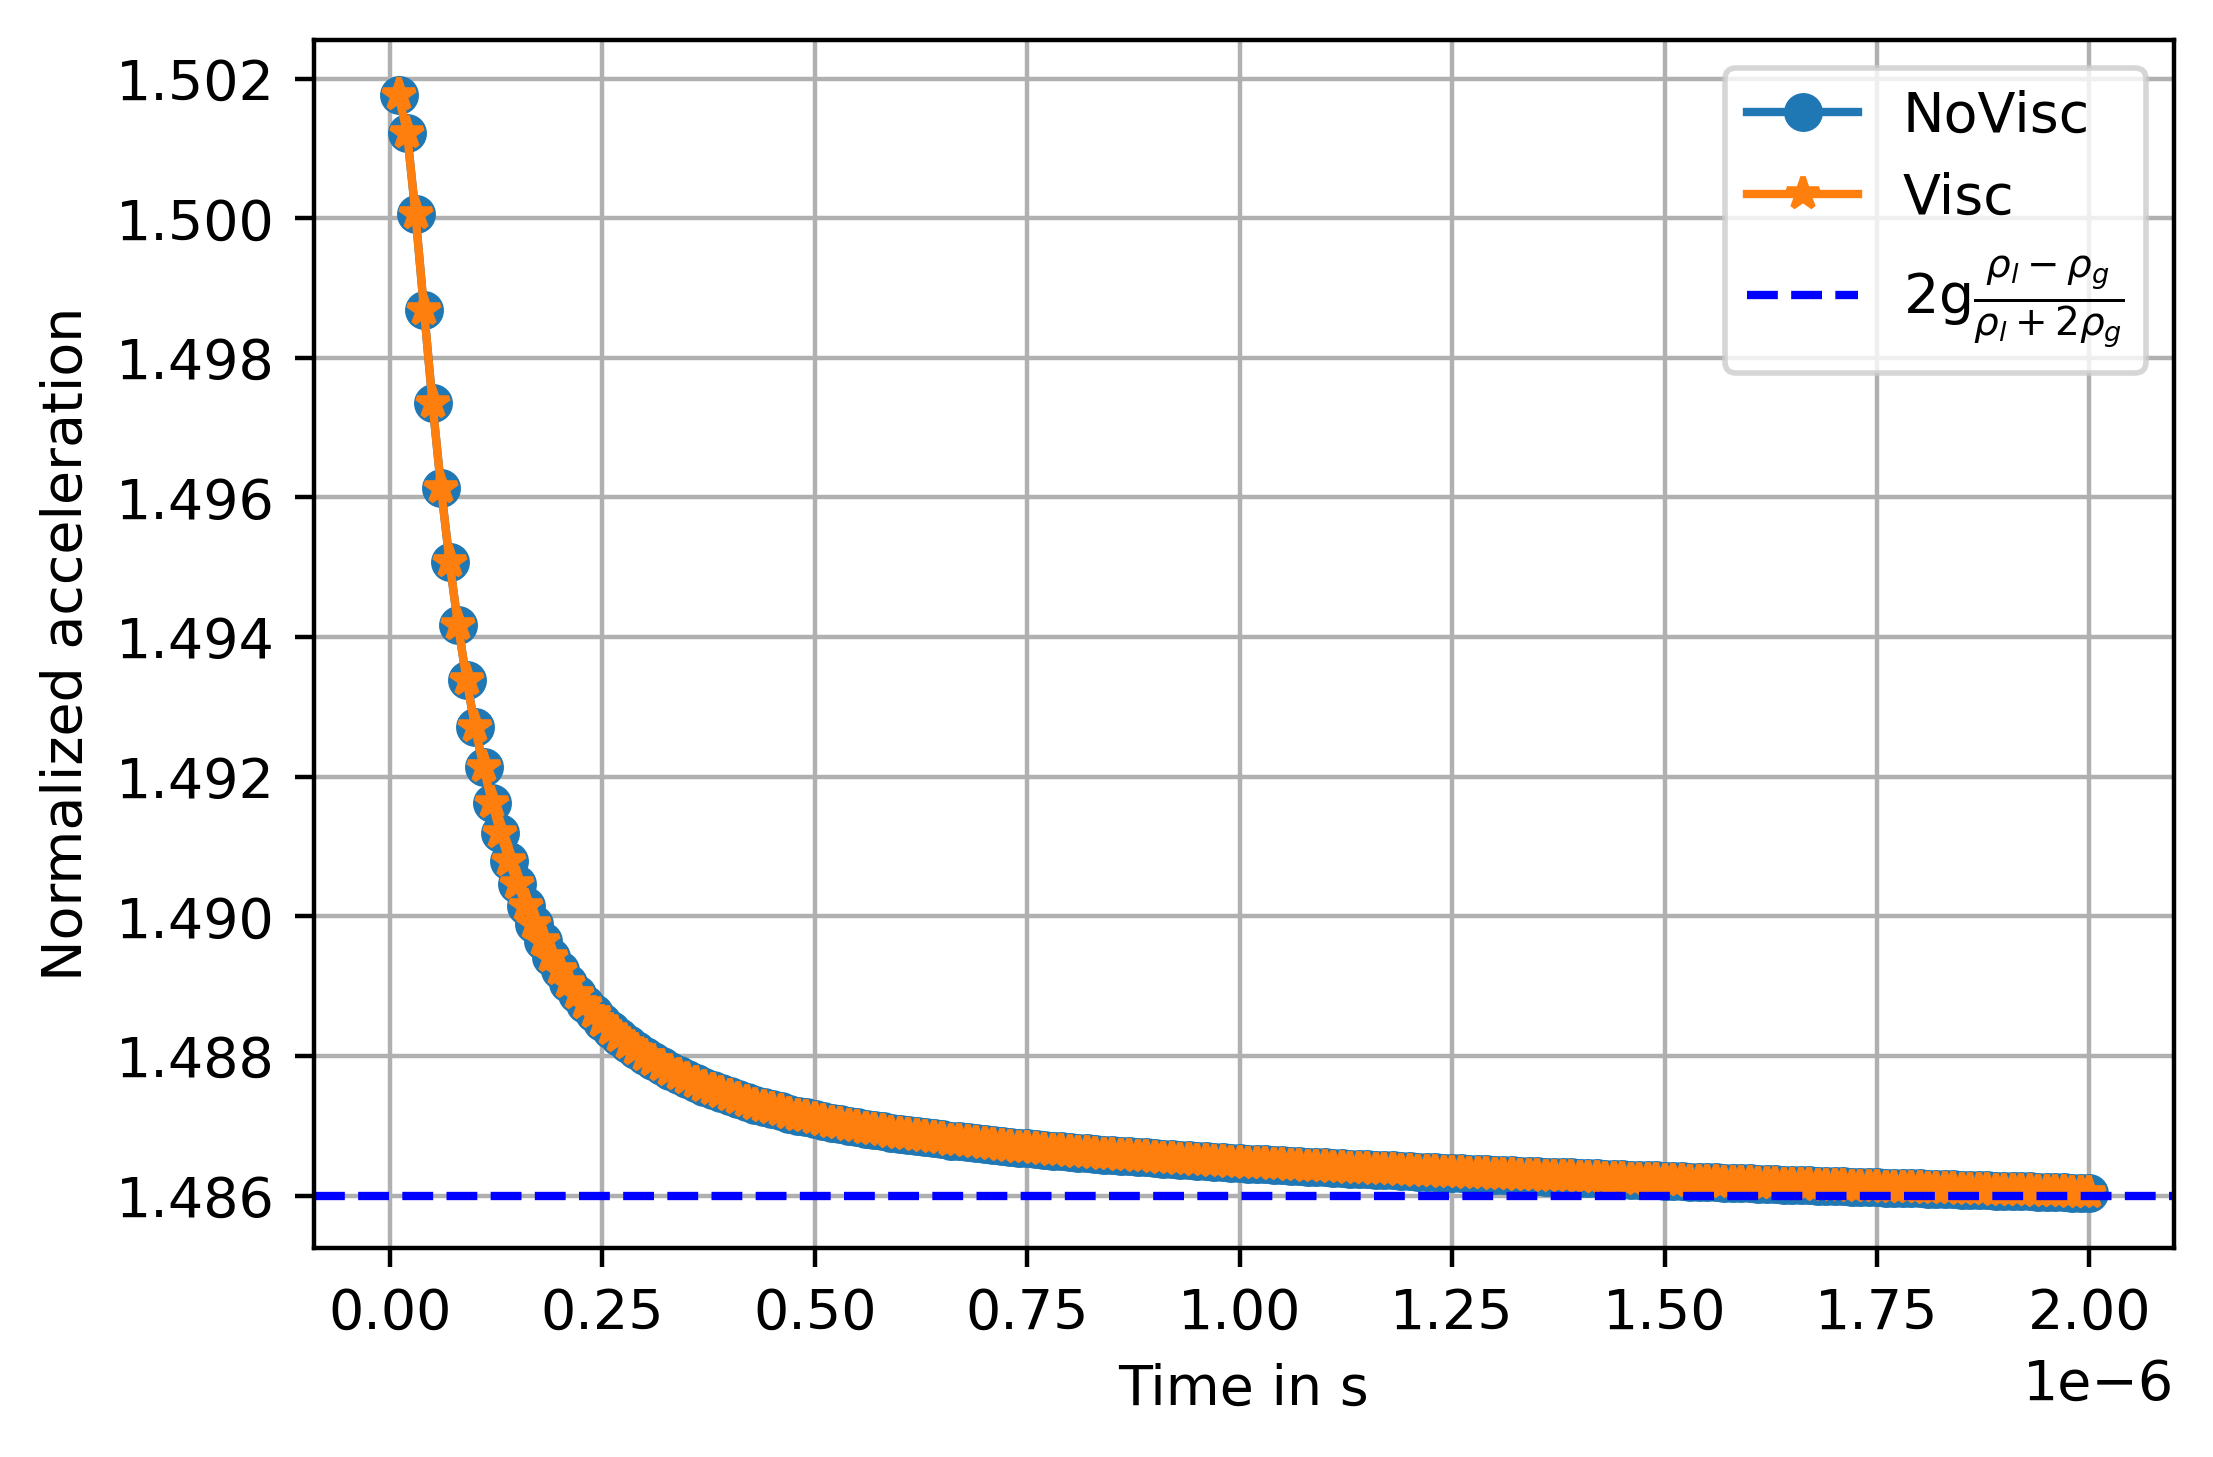

In [10]:
NoVisc = pd.read_csv('NoVisc-isoAdv-densityRatios_00004_templateCaseLambda/bubblepproc.dat', sep="\t", header=0)
accNoVisc = NoVisc["z-Velocity"].diff()/NoVisc["time"].diff()

Visc = pd.read_csv('isoAdv-densityRatios_00004_templateCaseLambda/bubblepproc.dat', sep="\t", header=0)
accVisc = Visc["z-Velocity"].diff()/Visc["time"].diff()


rcParams["figure.dpi"] = 400
g = 9.80665
rhol= 997
rhog = 0.1*rhol

shapePar = 0.00159155 / 0.003
shapeParV1 = 0.00229183 / 0.0025
acc = 2*g*(rhol - rhog)/(rhol+2*rhog)


#plt.plot(timeStepMinus8["time"], accMinus8, label=r"h$=\frac{D}{20}$, $\Delta t=10^{-8}s$")
#plt.plot(CylinderV0NoST["time"], accCylinderV0NoST, label=r"Oblate1, ST")
plt.plot(NoVisc["time"], accNoVisc/g,marker="o", label=r"NoVisc")
plt.plot(Visc["time"], accVisc/g,marker="*", label=r"Visc")
plt.axhline(y=1.486, linestyle='--', color='blue', label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}$")

plt.xlabel("Time in s")
plt.ylabel("Normalized acceleration")
plt.grid()
#plt.yscale('log')
plt.legend()
plt.savefig('accPlot_Visc_comp.png', facecolor='w')
plt.show()

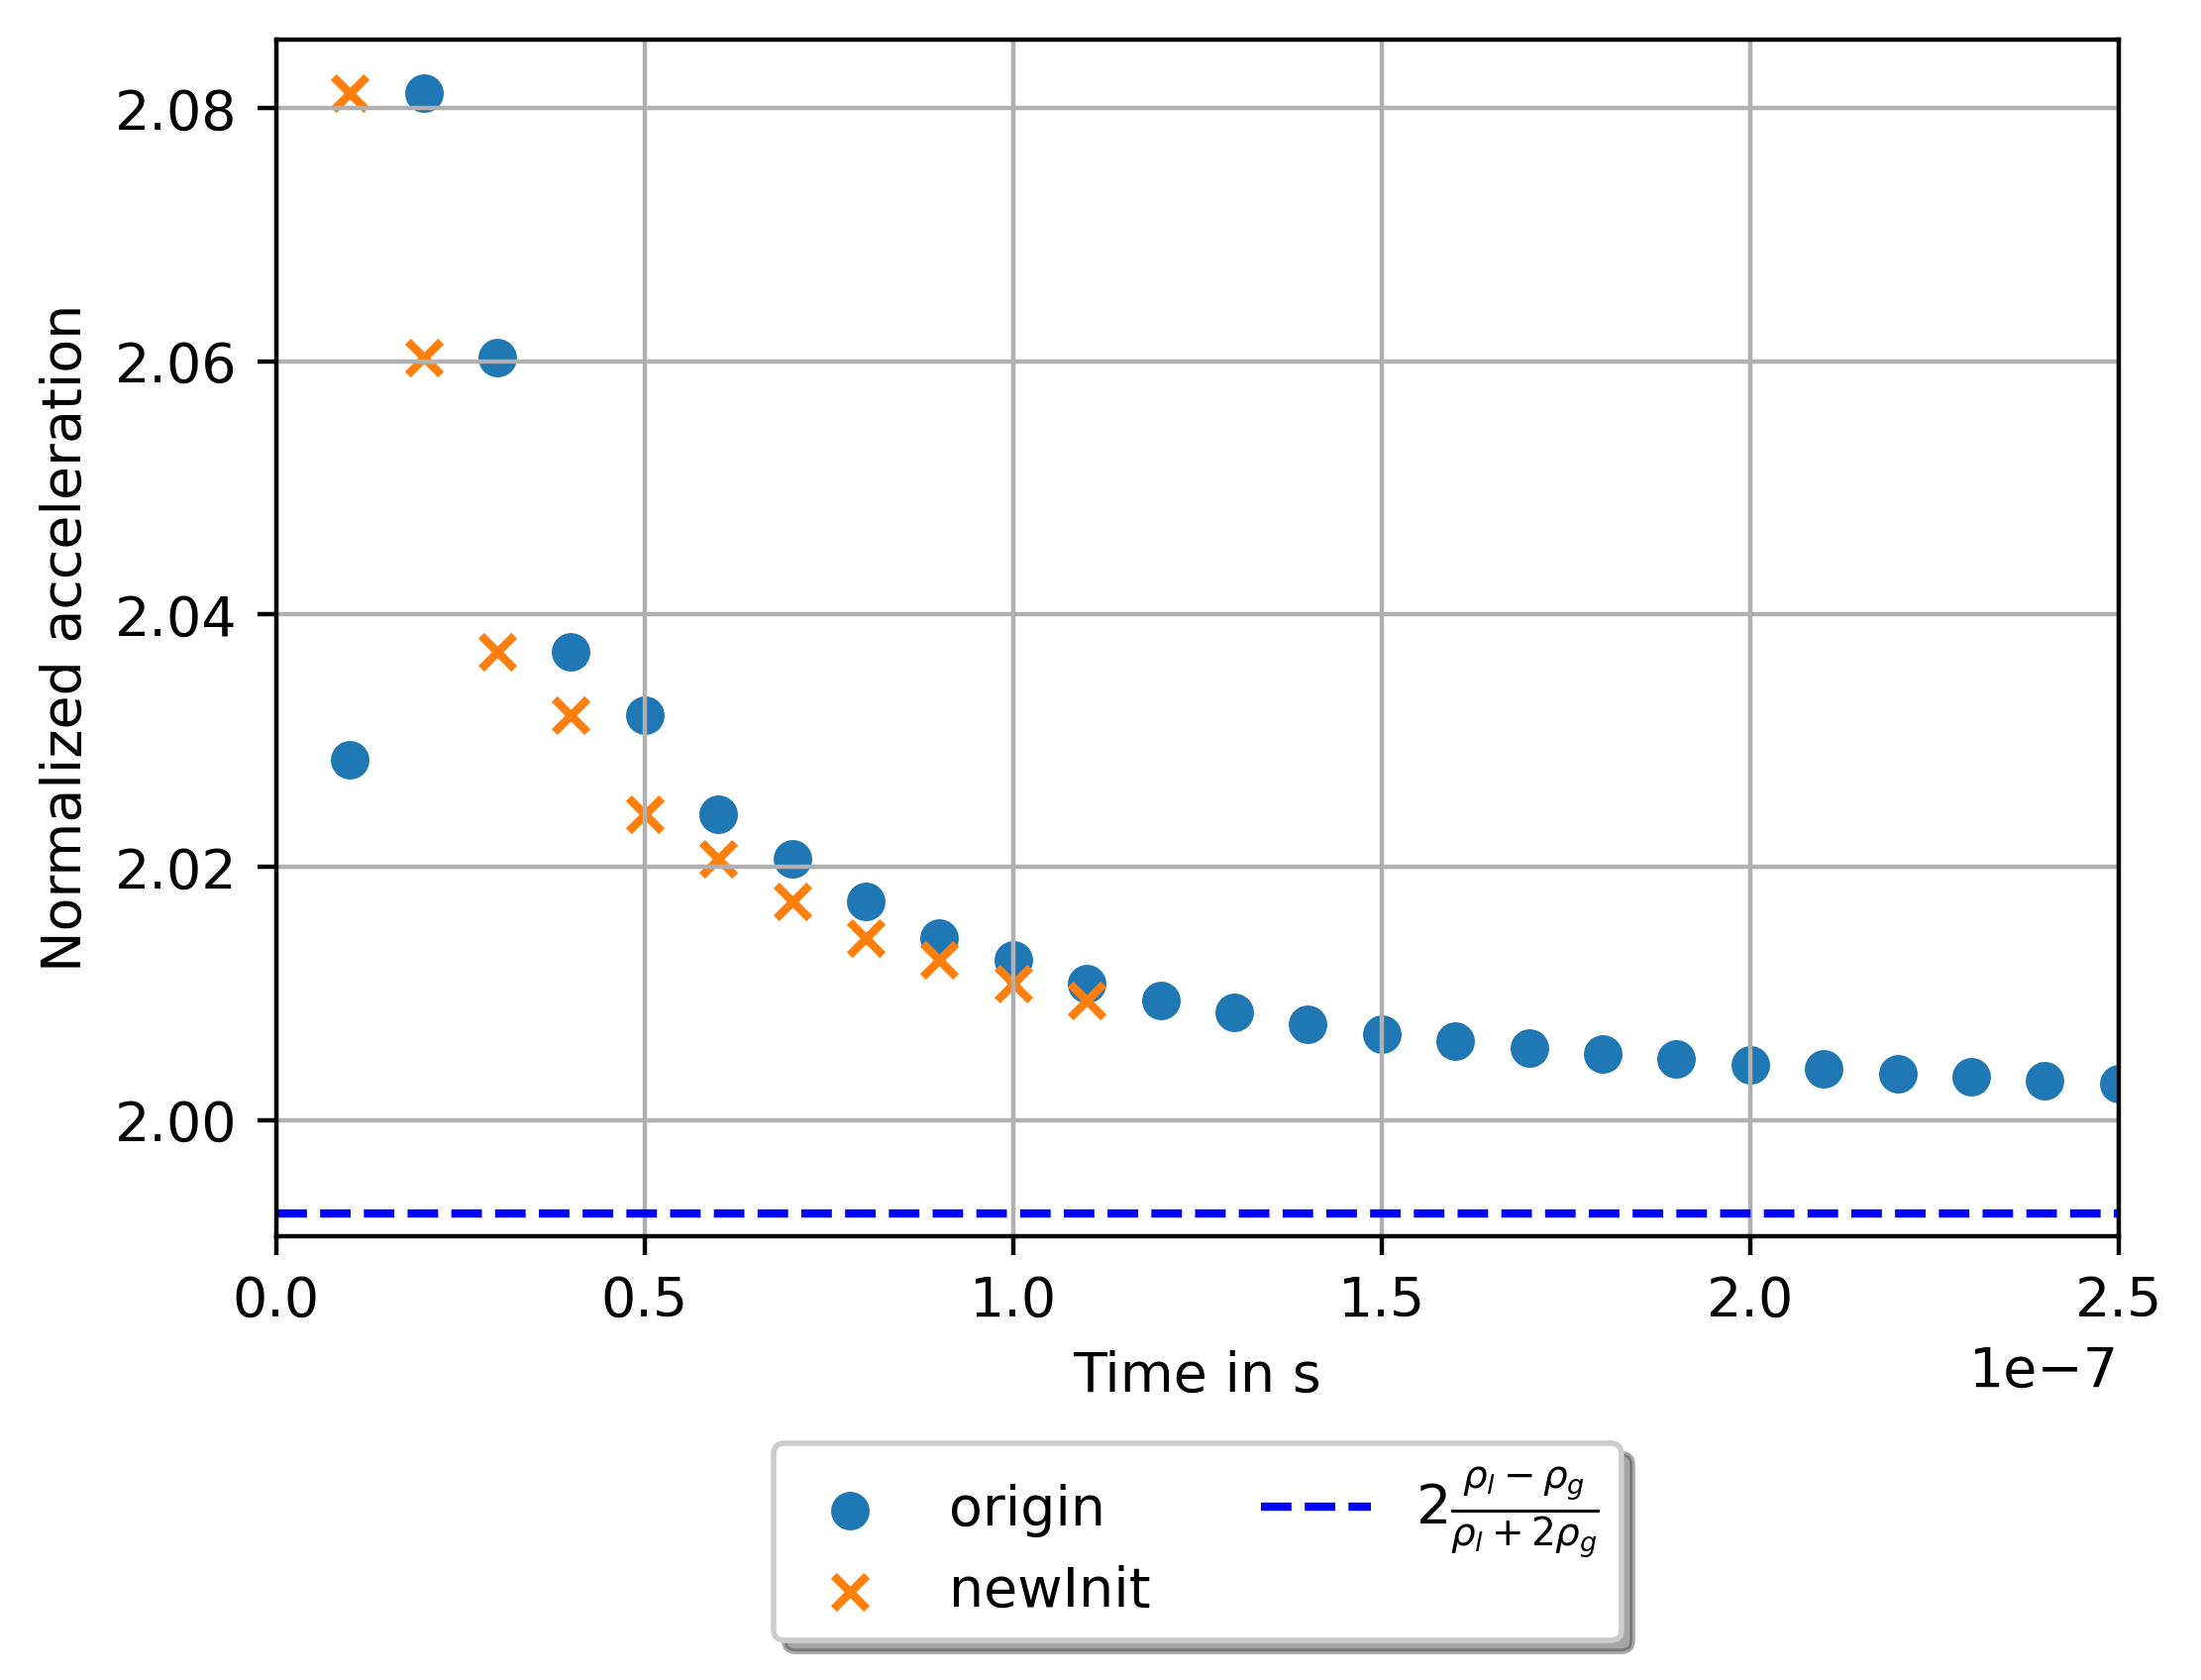

In [12]:
reinit0 = pd.read_csv('isoAdv-MeshConvergenceTest_00002_templateCase/bubblepproc.dat', sep="\t", header=0)
accreinit0 = reinit0["z-Velocity"].diff()/reinit0["time"].diff()

reinit1 = pd.read_csv('reinitTEST/isoAdv-MeshConvergenceTest_00002_templateCase/bubblepproc_sameprgh.dat', sep="\t", header=0)
accreinit1 = reinit1["z-Velocity"].diff()/reinit1["time"].diff()

reinit2 = pd.read_csv('reinitTEST/isoAdv-MeshConvergenceTest_00002_templateCase/bubblepproc_sameprghAlpha.dat', sep="\t", header=0)
accreinit2 = reinit2["z-Velocity"].diff()/reinit2["time"].diff()

reinit3 = pd.read_csv('reinitTEST/isoAdv-MeshConvergenceTest_00002_templateCase/bubblepproc_sameprghAlphaU.dat', sep="\t", header=0)
reinit3["z-Velocity"].iloc[0]=3.922331620604996e-05
accreinit3 = reinit3["z-Velocity"].diff()/reinit3["time"].diff()

reinit4 = pd.read_csv('reinitTEST/continue/bubblepproc.dat', sep="\t", header=0)
#reinit3["z-Velocity"].iloc[0]=3.922331620604996e-05
accreinit4 = reinit4["z-Velocity"].diff()/reinit4["time"].diff()

reinit5 = pd.read_csv('reinitTEST/isoAdv-MeshConvergenceTest_00002_templateCase/bubblepproc_sameprghAlphaUphi.dat', sep="\t", header=0)
reinit5["z-Velocity"].iloc[0]=3.922331620604996e-05
accreinit5 = reinit5["z-Velocity"].diff()/reinit5["time"].diff()

reinit6 = pd.read_csv('reinitTEST/isoAdv-MeshConvergenceTest_00002_templateCase/bubblepproc.dat', sep="\t", header=0)
accreinit6 = reinit6["z-Velocity"].diff()/reinit6["time"].diff()

rcParams["figure.dpi"] = 400
g = 9.80665
rhol= 997
rhog = 1.225
acc = 2*g*(rhol - rhog)/(rhol+2*rhog)


#plt.plot(timeStepMinus8["time"], accMinus8, label=r"h$=\frac{D}{20}$, $\Delta t=10^{-8}s$")
#plt.plot(CylinderV0NoST["time"], accCylinderV0NoST, label=r"Oblate1, ST")
plt.scatter(reinit0["time"], accreinit0/g,marker="o", label=r"origin")
#plt.scatter(reinit1["time"], accreinit1/g,marker="*", label=r"reinit1")
#plt.scatter(reinit2["time"], accreinit2/g,marker="v", label=r"reinit2")
#plt.scatter(reinit3["time"], accreinit3/g,marker="+", label=r"reinit3")
#plt.scatter(reinit4["time"].iloc[200:]-2e-6, accreinit4.iloc[200:]/g,marker="+", label=r"reinit4")
#plt.scatter(reinit5["time"], accreinit5/g,marker="x", label=r"reinit5")
plt.scatter(reinit6["time"], accreinit6/g,marker="x", label=r"newInit")
plt.axhline(y=acc/g, linestyle='--', color='blue', label=r"$2\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}$")

plt.xlabel("Time in s")
plt.ylabel("Normalized acceleration")
plt.xlim(left=0,right=25e-8)
plt.grid()
#plt.yscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
#plt.savefig('accPlot_Visc_comp.png', facecolor='w')
plt.show()

In [15]:
g = 9.80665
rhol= 997
rhog = 1.225
r=2.42859e-03
p=3*rhog*rhol/(2*rhog + rhol)*g

In [17]:
p

35.95109353519436

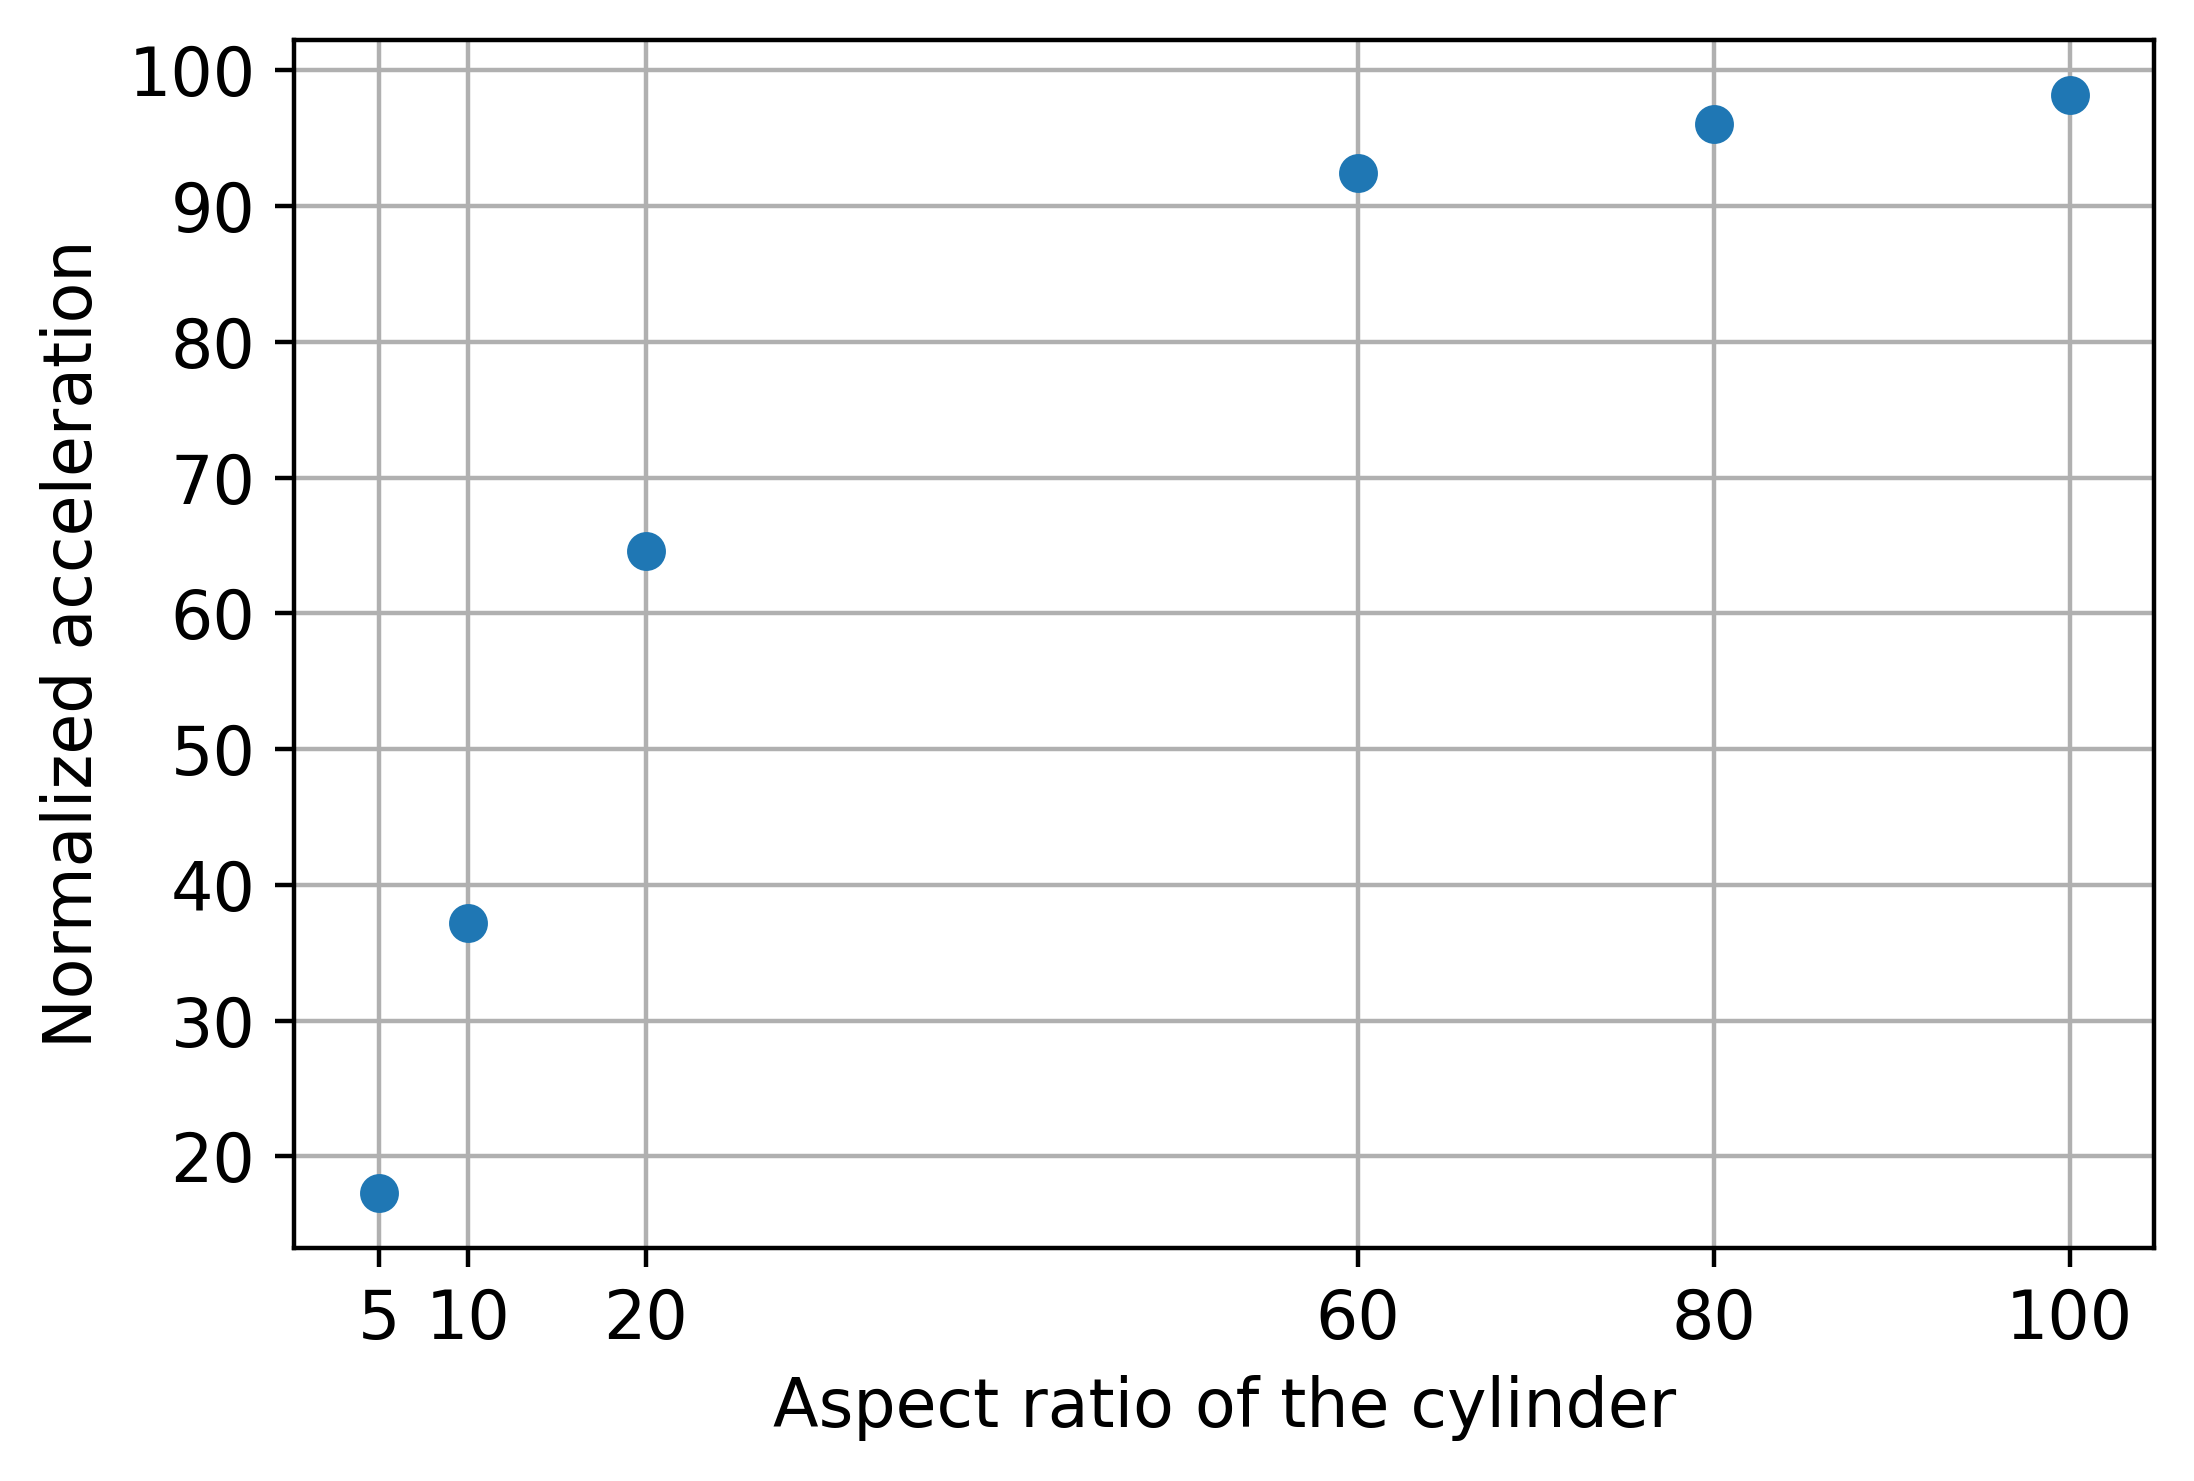

In [11]:
rcParams["figure.dpi"] = 400
plt.rcParams.update({'font.size': 12}) 
ratio=[ 5, 10, 20, 60, 80, 100]
accs=[accCylinderV3NoST.iloc[-1]/g, accCylinderV4NoST.iloc[-1]/g, 
      accCylinderV5NoST.iloc[-1]/g, accCylinderV8NoST.iloc[-1]/g, 
      accCylinderV7NoST.iloc[-1]/g, accCylinderV6NoST.iloc[-1]/g]
plt.grid()
rcParams['axes.axisbelow'] = True
plt.scatter(ratio, accs)
plt.xlabel("Aspect ratio of the cylinder")
plt.ylabel("Normalized acceleration")
plt.xticks([5, 10, 20, 60, 80, 100])
#plt.savefig('accPlot_Cylinders_comp_scatter.png', facecolor='w')
plt.show()

In [2]:
pZaxis = pd.read_csv('prgh_zAxis.csv', sep=",", header=0)
pEx = pd.read_csv('prgh_CylinderEx.csv', sep=",", header=0)
pEx1 = pd.read_csv('prgh_CylinderEx1.csv', sep=",", header=0)

pZaxisExt = pd.read_csv('zAxis.csv', sep=",", header=0)
pNearExt = pd.read_csv('nearCylinder.csv', sep=",", header=0)
pFarExt = pd.read_csv('farCylinder.csv', sep=",", header=0)

In [3]:
pZaxisSorted = pZaxis.sort_values('CellCenter:2')
pExSorted = pEx.sort_values('CellCenter:2')
pEx1Sorted = pEx1.sort_values('CellCenter:2')

pZaxisExtSorted = pZaxisExt.sort_values('CellCenter:2')
pNearExtSorted = pNearExt.sort_values('CellCenter:2')
pFarExtSorted = pFarExt.sort_values('CellCenter:2')

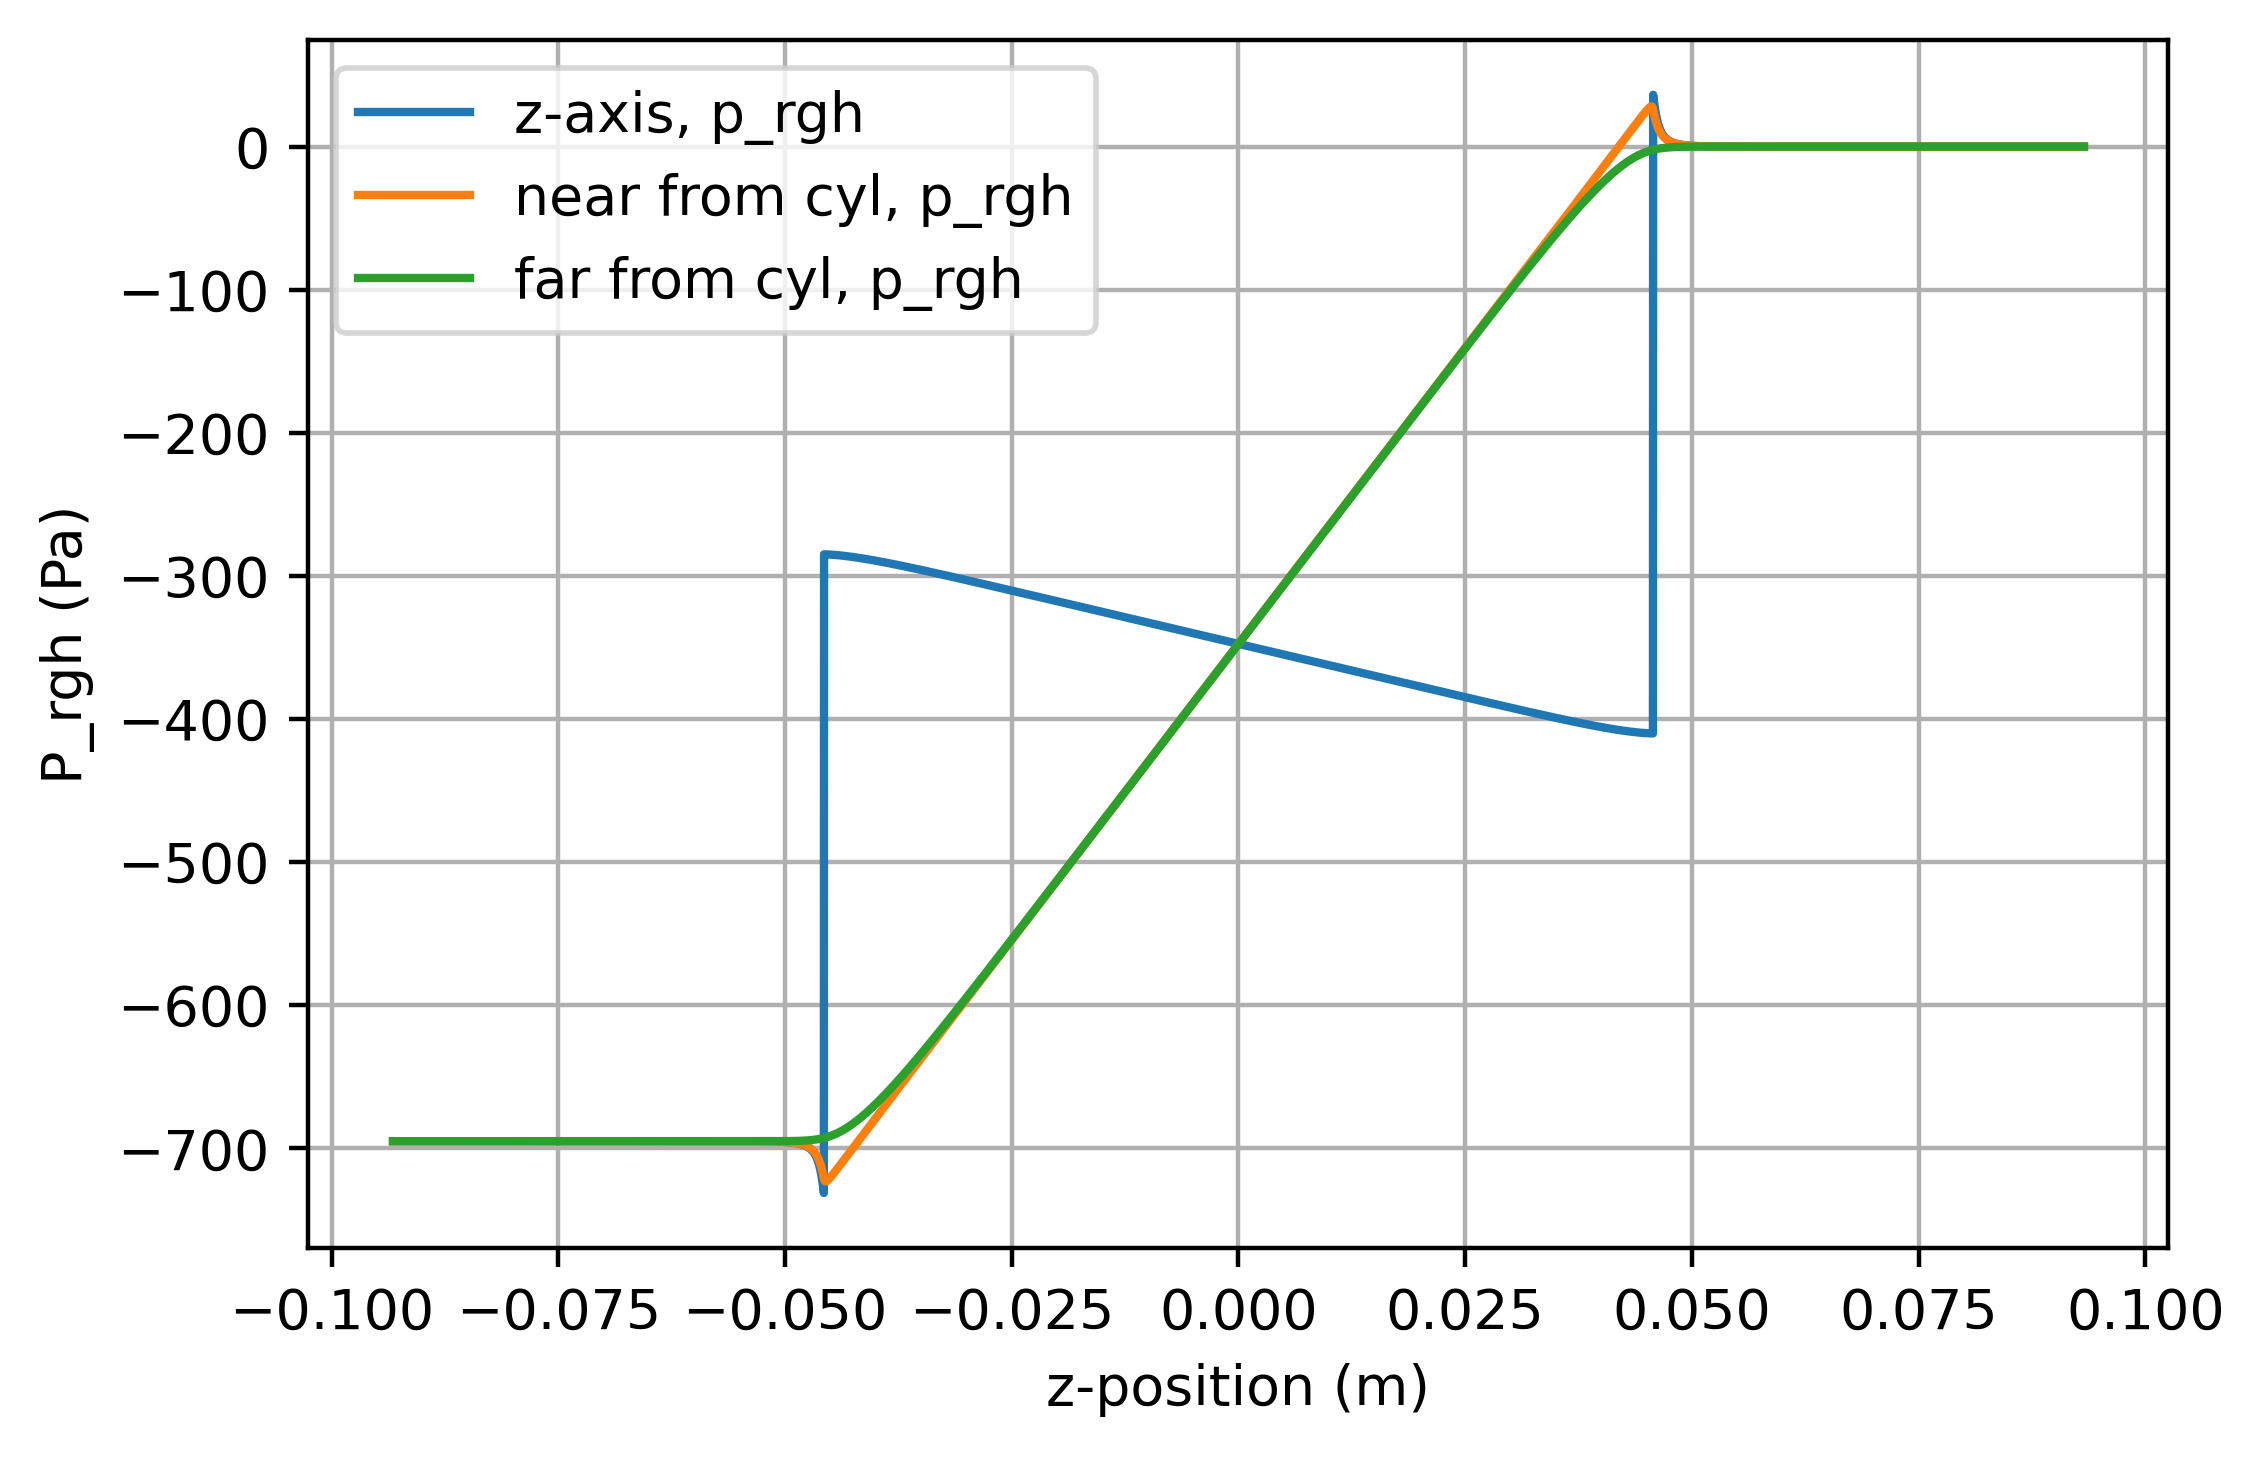

In [7]:
rcParams["figure.dpi"] = 400
plt.grid()
rcParams['axes.axisbelow'] = True
#plt.plot(pZaxisSorted['CellCenter:2'], pZaxisSorted['p'], label="z-axis")
#plt.plot(pExSorted['CellCenter:2'], pExSorted['p'], label="external near cylinder")
#plt.plot(pEx1Sorted['CellCenter:2'], pEx1Sorted['p'], label="external far cylinder")
#plt.plot(pZaxisSorted['CellCenter:2'], pZaxisSorted['p'], label="z-axis, p")
#plt.plot(pZaxisSorted['CellCenter:2'], pZaxisSorted['p_rgh'], label="z-axis, p_rgh")
#plt.plot(pEx1Sorted['CellCenter:2'], pEx1Sorted['p'], label="far from cyl, p")
#plt.plot(pEx1Sorted['CellCenter:2'], pEx1Sorted['p_rgh'], label="far from cyl, p_rgh")


#plt.plot(pZaxisExtSorted['CellCenter:2'], pZaxisExtSorted['p'], label="z-axis, p")
plt.plot(pZaxisExtSorted['CellCenter:2'], pZaxisExtSorted['p_rgh'], label="z-axis, p_rgh")
#plt.plot(pNearExtSorted['CellCenter:2'], pNearExtSorted['p'], label="near from cyl, p")
plt.plot(pNearExtSorted['CellCenter:2'], pNearExtSorted['p_rgh'], label="near from cyl, p_rgh")
#plt.plot(pFarExtSorted['CellCenter:2'], pFarExtSorted['p'], label="far from cyl, p")
plt.plot(pFarExtSorted['CellCenter:2'], pFarExtSorted['p_rgh'], label="far from cyl, p_rgh")



plt.ylabel("P_rgh (Pa)")
plt.xlabel("z-position (m)")
plt.legend()
plt.savefig('p_rghComp_Ext.png', facecolor='w')
plt.show()

In [54]:
pExSorted.iloc[-240:]

,Cell Type,CellCenter:0,CellCenter:1,CellCenter:2,p,p_rgh
2430,,1.000000e-07,0.000495,0.044443,-411.782623,22.711847
2432,,1.000000e-07,0.000495,0.044458,-411.805542,22.912354
2431,,1.000000e-07,0.000488,0.044466,-411.805542,22.912354
2433,,1.000000e-07,0.000488,0.044481,-411.828552,23.112797
2434,,1.000000e-07,0.000495,0.044489,-411.828552,23.112797
...,...,...,...,...,...,...
4734,,1.000000e-07,0.000488,0.047429,-462.878845,0.775566
4735,,1.000000e-07,0.000472,0.047460,-463.636841,0.464472
4736,,1.000000e-07,0.000488,0.047475,-463.636841,0.464472
4737,,1.000000e-07,0.000472,0.047506,-464.393524,0.154675


In [5]:
#Ellipsoid = pd.read_csv('N80_3D_ST_Ellipsoid-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
#accEllipsoid = Ellipsoid["z-Velocity"].diff()/Ellipsoid["time"].diff()

EllipsoidNoST = pd.read_csv('newPostProcessing/N80_3D_noST_Ellipsoid-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
zPol1EllipsoidNoST = (EllipsoidNoST["zPole1"]-EllipsoidNoST["bubbleCenterz"])#.diff()/EllipsoidNoST["time"].diff()
zPol2EllipsoidNoST = (EllipsoidNoST["bubbleCenterz"] - EllipsoidNoST["zPole2"])#.diff()/EllipsoidNoST["time"].diff()

EllipsoidV1NoST = pd.read_csv('newPostProcessing/N80_3D_noST_EllipsoidV1-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
zPol1EllipsoidV1NoST = (EllipsoidV1NoST["zPole1"]-EllipsoidV1NoST["bubbleCenterz"])#.diff()/EllipsoidNoST["time"].diff()
zPol2EllipsoidV1NoST = (EllipsoidV1NoST["bubbleCenterz"] - EllipsoidV1NoST["zPole2"])#.diff()/EllipsoidNoST["time"].diff()

EllipsoidV2NoST = pd.read_csv('newPostProcessing/N80_3D_noST_EllipsoidV2-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)
zPol1EllipsoidV2NoST = (EllipsoidV2NoST["zPole1"]-EllipsoidV2NoST["bubbleCenterz"])#.diff()/EllipsoidNoST["time"].diff()
zPol2EllipsoidV2NoST = (EllipsoidV2NoST["bubbleCenterz"] - EllipsoidV2NoST["zPole2"])#.diff()/EllipsoidNoST["time"].diff()


In [38]:
zPol2EllipsoidNoST - zPol2EllipsoidNoST.iloc[0]

0      0.000000e+00
1      4.798679e-16
2      1.506174e-15
3      2.485425e-15
4      3.511080e-15
           ...     
196    6.720989e-13
197    6.778879e-13
198    6.837165e-13
199    6.895838e-13
200    6.953899e-13
Length: 201, dtype: float64

In [39]:
zPol1EllipsoidNoST - zPol1EllipsoidNoST.iloc[0]

0      0.000000e+00
1     -4.798679e-16
2     -1.406210e-15
3     -2.385462e-15
4     -3.411117e-15
           ...     
196   -6.709988e-13
197   -6.767881e-13
198   -6.826167e-13
199   -6.884840e-13
200   -6.943901e-13
Length: 201, dtype: float64

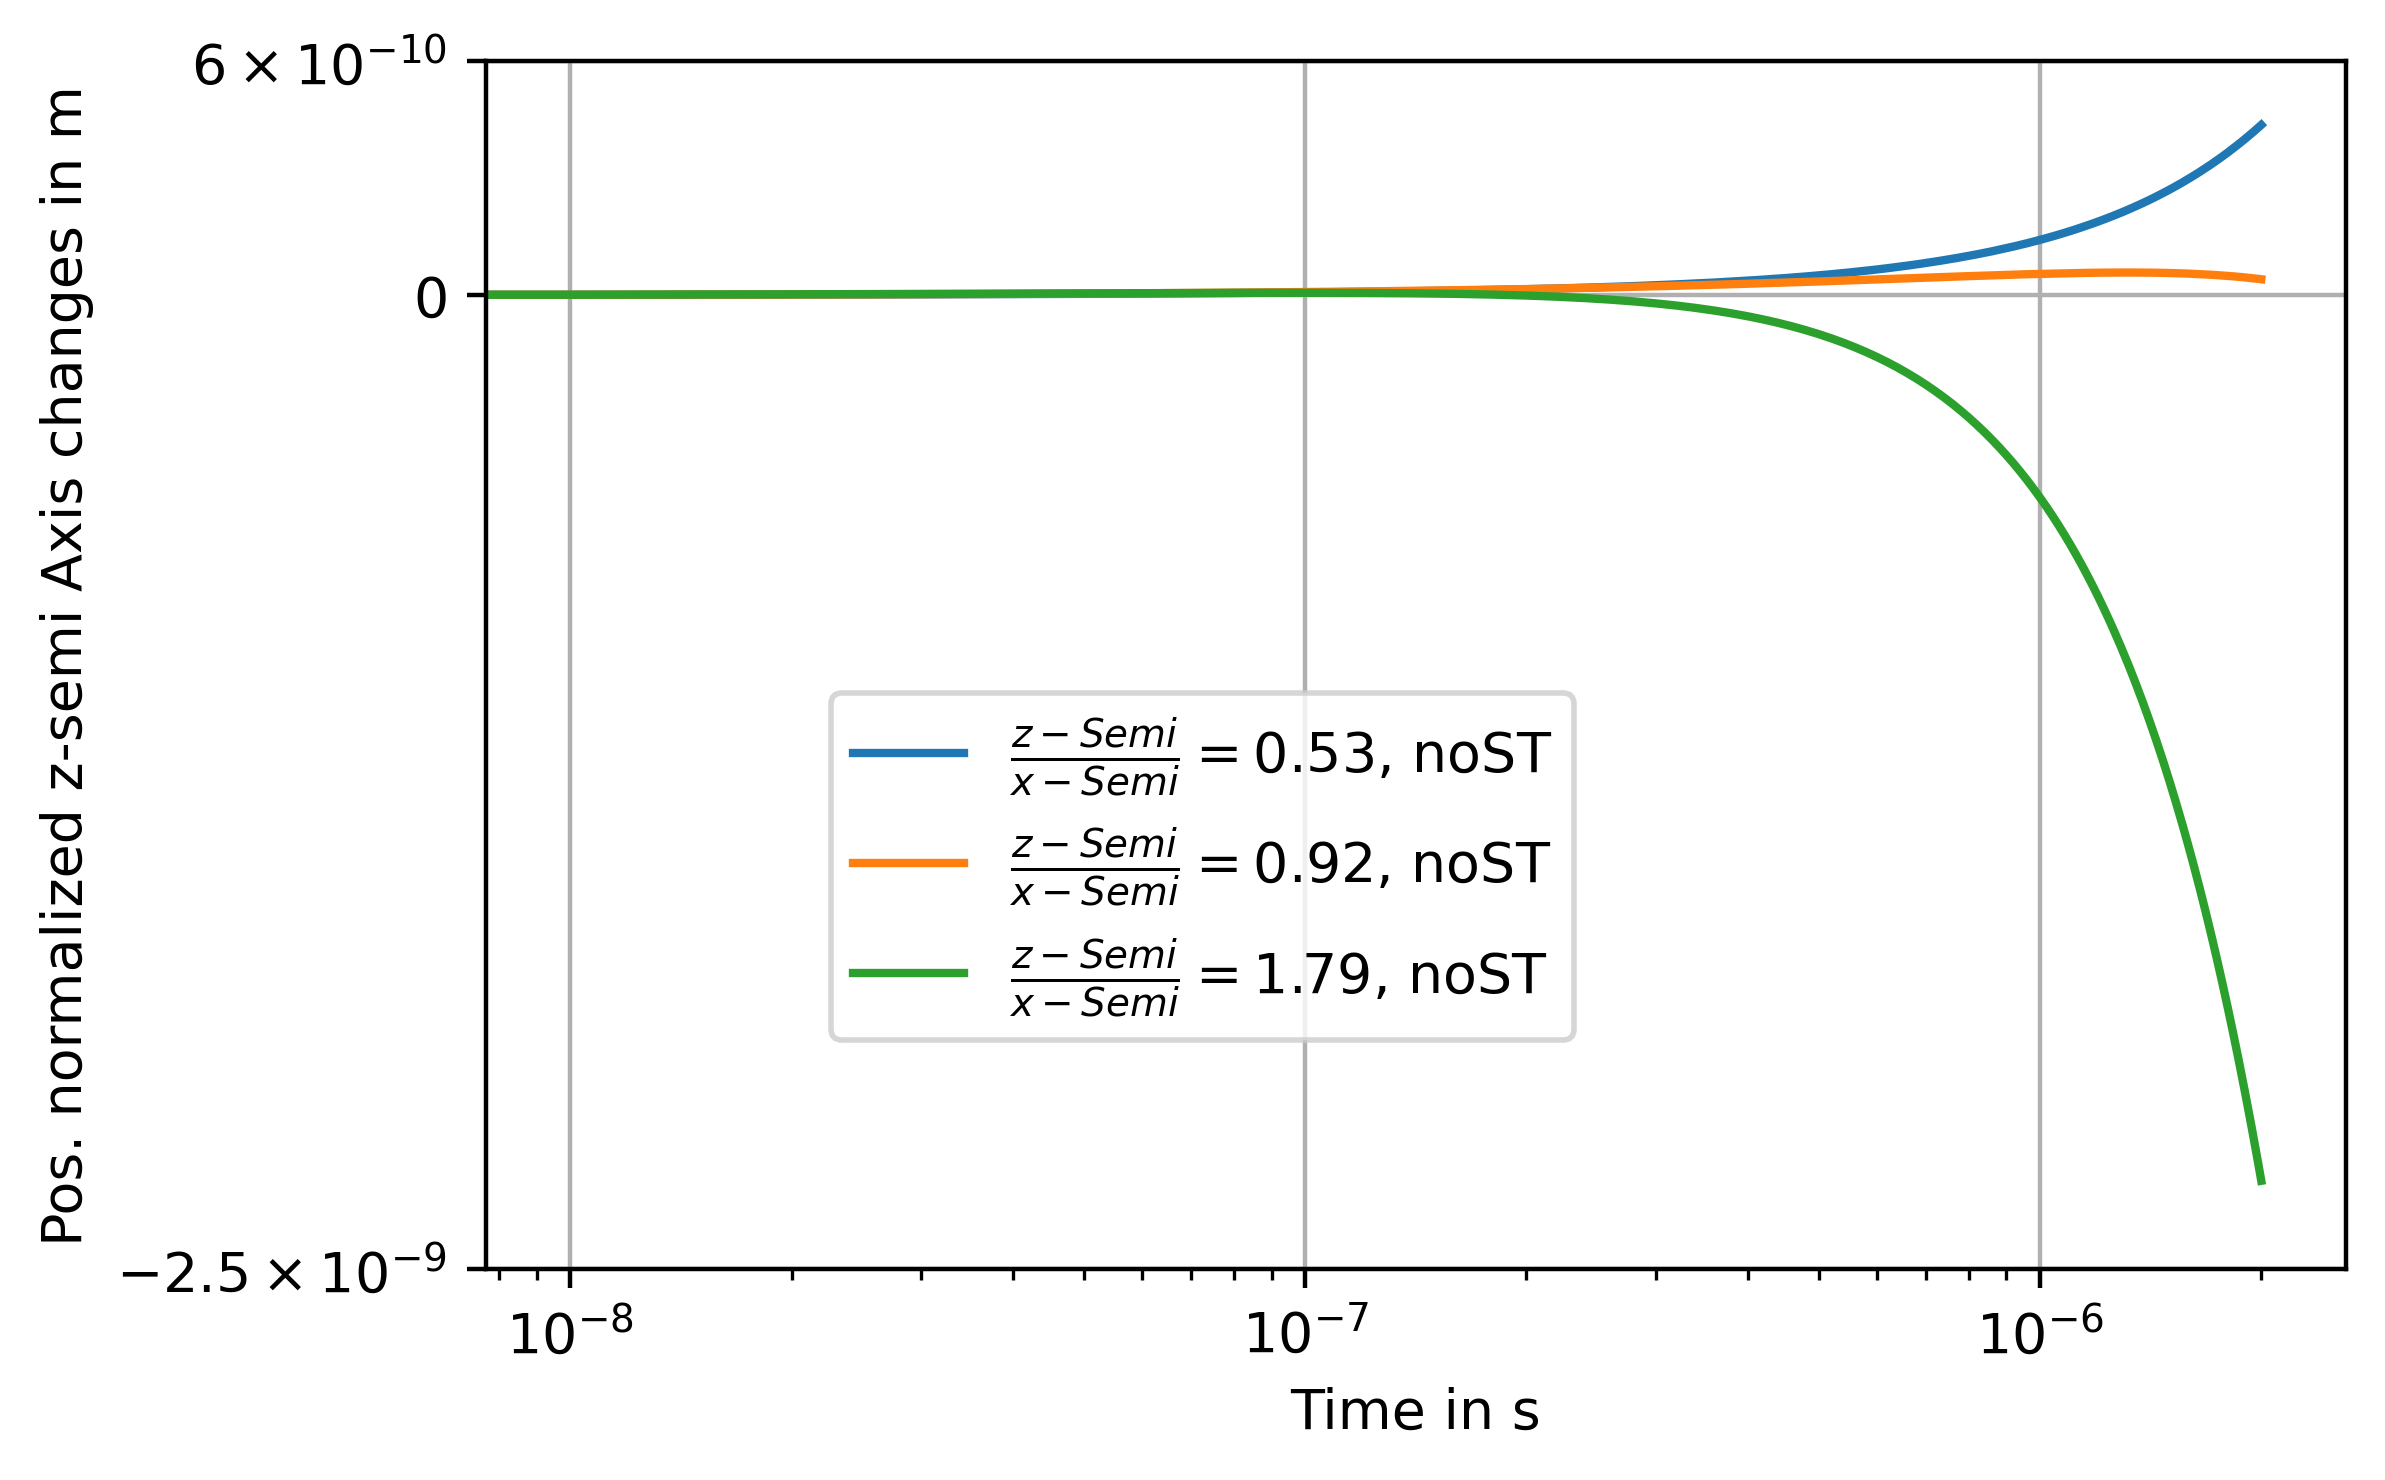

In [48]:
rcParams["figure.dpi"] = 400
g = 9.80665
rhol= 997
rhog = 1.225

shapePar = 0.00159155 / 0.003
shapeParV1 = 0.00229183 / 0.0025
shapeParV2 = 0.00358099 / 0.002

acc = 2*g*(rhol - rhog)/(rhol+2*rhog)
zPol1EllipsoidNoSTDiff= -(zPol1EllipsoidNoST - zPol1EllipsoidNoST.iloc[0])/zPol1EllipsoidNoST.iloc[0]
zPol1EllipsoidV1NoSTDiff= -(zPol1EllipsoidV1NoST - zPol1EllipsoidV1NoST.iloc[0])/zPol1EllipsoidV1NoST.iloc[0]
zPol1EllipsoidV2NoSTDiff= -(zPol1EllipsoidV2NoST - zPol1EllipsoidV2NoST.iloc[0])/zPol1EllipsoidV2NoST.iloc[0]

#plt.plot(timeStepMinus8["time"], accMinus8, label=r"h$=\frac{D}{20}$, $\Delta t=10^{-8}s$")
#plt.plot(Ellipsoid["time"], accEllipsoid, label=r"Oblate1, ST")
plt.plot(EllipsoidNoST["time"], zPol1EllipsoidNoSTDiff, label=r"$\frac{z-Semi}{x-Semi}=$" "%s, noST"%(round(shapePar,2)))
plt.plot(EllipsoidV1NoST["time"], zPol1EllipsoidV1NoSTDiff, label=r"$\frac{z-Semi}{x-Semi}=$" "%s, noST"%(round(shapeParV1,2)))
plt.plot(EllipsoidV2NoST["time"], zPol1EllipsoidV2NoSTDiff, label=r"$\frac{z-Semi}{x-Semi}=$" "%s, noST"%(round(shapeParV2,2)))

plt.xlabel("Time in s")
plt.ylabel("Pos. normalized z-semi Axis changes in m")

plt.xscale("log")
plt.yscale("symlog")
plt.grid()
plt.ylim((-2.5e-9, 6e-10))
plt.legend(bbox_to_anchor=(0.6, 0.5))
plt.yticks(list(plt.yticks()[0]) + [0.0])
plt.savefig('posZPolePlot_Ellipsoids_comp.png', facecolor='w',bbox_inches='tight')
plt.show()

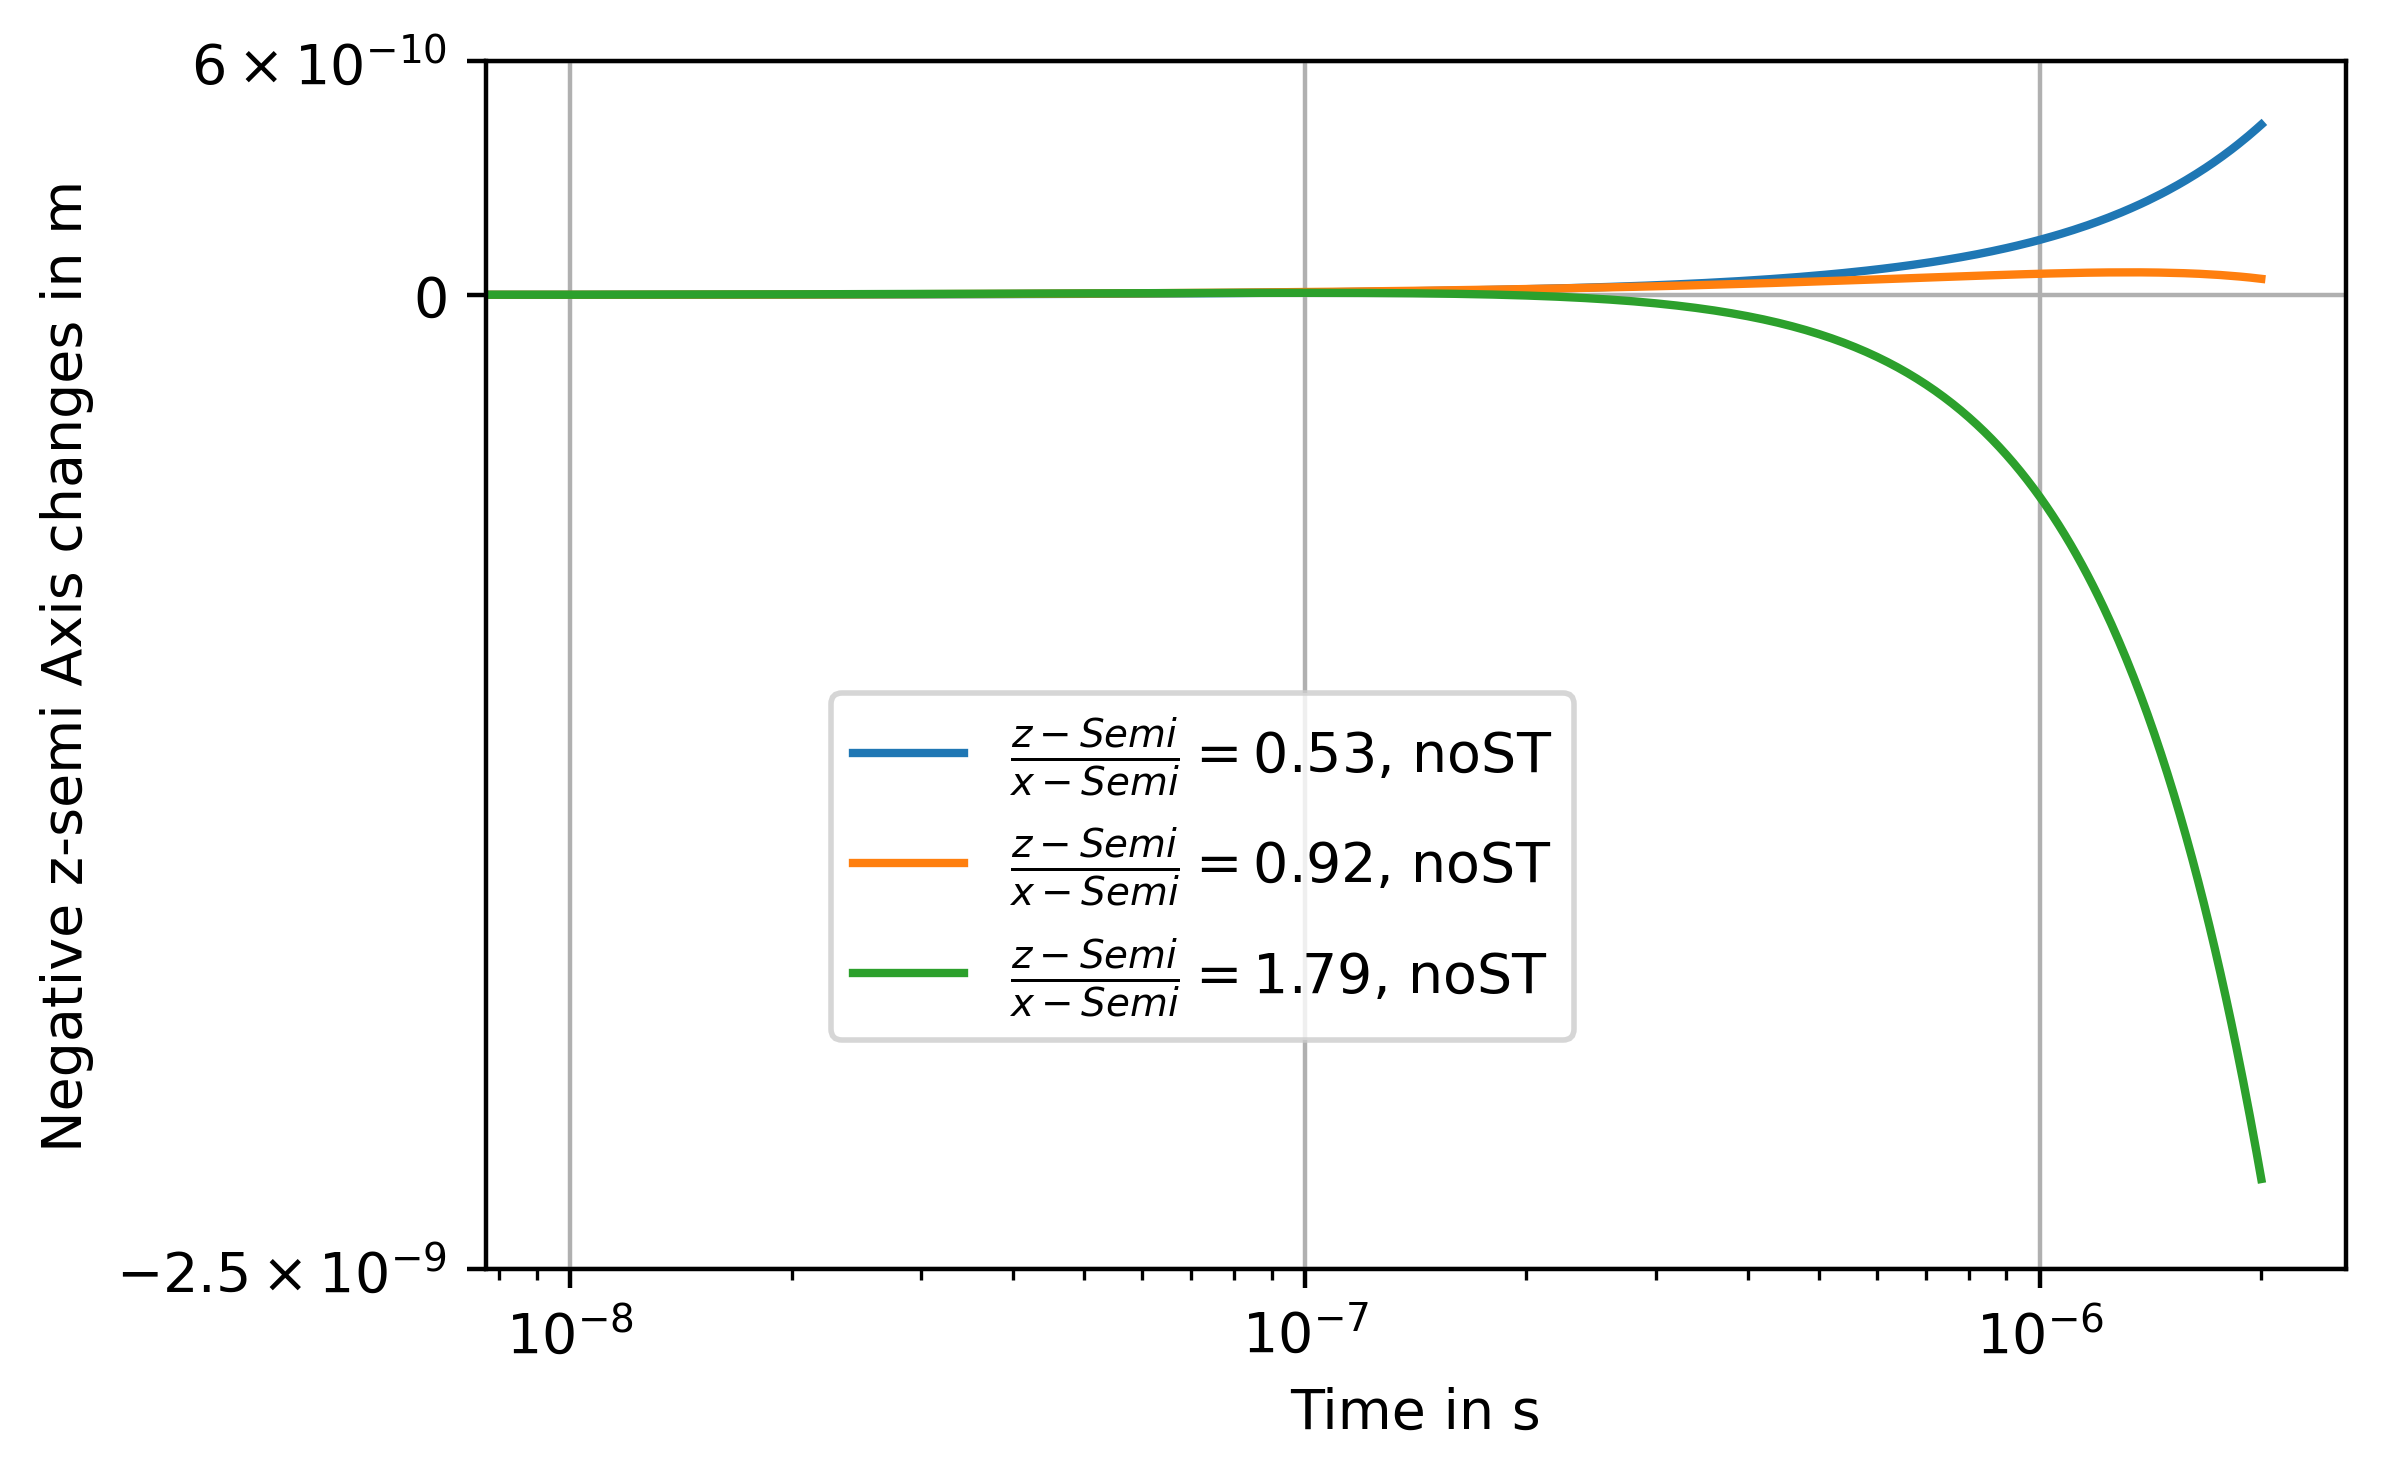

In [49]:
zPol2EllipsoidNoSTDiff= (zPol2EllipsoidNoST - zPol2EllipsoidNoST.iloc[0])/zPol2EllipsoidNoST.iloc[0]
zPol2EllipsoidV1NoSTDiff= (zPol2EllipsoidV1NoST - zPol2EllipsoidV1NoST.iloc[0])/zPol2EllipsoidV1NoST.iloc[0]
zPol2EllipsoidV2NoSTDiff= (zPol2EllipsoidV2NoST - zPol2EllipsoidV2NoST.iloc[0])/zPol2EllipsoidV2NoST.iloc[0]

#plt.plot(timeStepMinus8["time"], accMinus8, label=r"h$=\frac{D}{20}$, $\Delta t=10^{-8}s$")
#plt.plot(Ellipsoid["time"], accEllipsoid, label=r"Oblate1, ST")
plt.plot(EllipsoidNoST["time"], zPol2EllipsoidNoSTDiff, label=r"$\frac{z-Semi}{x-Semi}=$" "%s, noST"%(round(shapePar,2)))
plt.plot(EllipsoidV1NoST["time"], zPol2EllipsoidV1NoSTDiff, label=r"$\frac{z-Semi}{x-Semi}=$" "%s, noST"%(round(shapeParV1,2)))
plt.plot(EllipsoidV2NoST["time"], zPol2EllipsoidV2NoSTDiff, label=r"$\frac{z-Semi}{x-Semi}=$" "%s, noST"%(round(shapeParV2,2)))

plt.xlabel("Time in s")
plt.ylabel("Negative z-semi Axis changes in m")

plt.xscale("log")
plt.yscale("symlog")
plt.ylim((-2.5e-9, 6e-10))
plt.grid()
plt.legend(bbox_to_anchor=(0.6, 0.5))
plt.yticks(list(plt.yticks()[0]) + [0.0])
plt.savefig('negZPolePlot_Ellipsoids_comp.png', facecolor='w',bbox_inches='tight')
plt.show()

In [153]:
# SphereNoST = pd.read_csv('newPostProcessing/N80_3D_noST_Sphere-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)

SphereNoST = pd.read_csv('newPostProcessing/LongerT_N80_3D_noST_Sphere-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)


xPol1SphereNoST = (SphereNoST["xPole1"]-SphereNoST["bubbleCenterx"])#.diff()/EllipsoidNoST["time"].diff()
xPol2SphereNoST = (SphereNoST["bubbleCenterx"] - SphereNoST["xPole2"])#.diff()/EllipsoidNoST["time"].diff()

yPol1SphereNoST = (SphereNoST["yPole1"]-SphereNoST["bubbleCentery"])#.diff()/EllipsoidNoST["time"].diff()
yPol2SphereNoST = (SphereNoST["bubbleCentery"] - SphereNoST["yPole2"])#.diff()/EllipsoidNoST["time"].diff()

zPol1SphereNoST = (SphereNoST["zPole1"] - SphereNoST["bubbleCenterz"])#.diff()/EllipsoidNoST["time"].diff()
zPol2SphereNoST = (SphereNoST["bubbleCenterz"] - SphereNoST["zPole2"])#.diff()/EllipsoidNoST["time"].diff()

zPolsDist = zPol1SphereNoST + zPol2SphereNoST
xPolsDist = xPol1SphereNoST + xPol2SphereNoST
yPolsDist = yPol1SphereNoST + yPol2SphereNoST

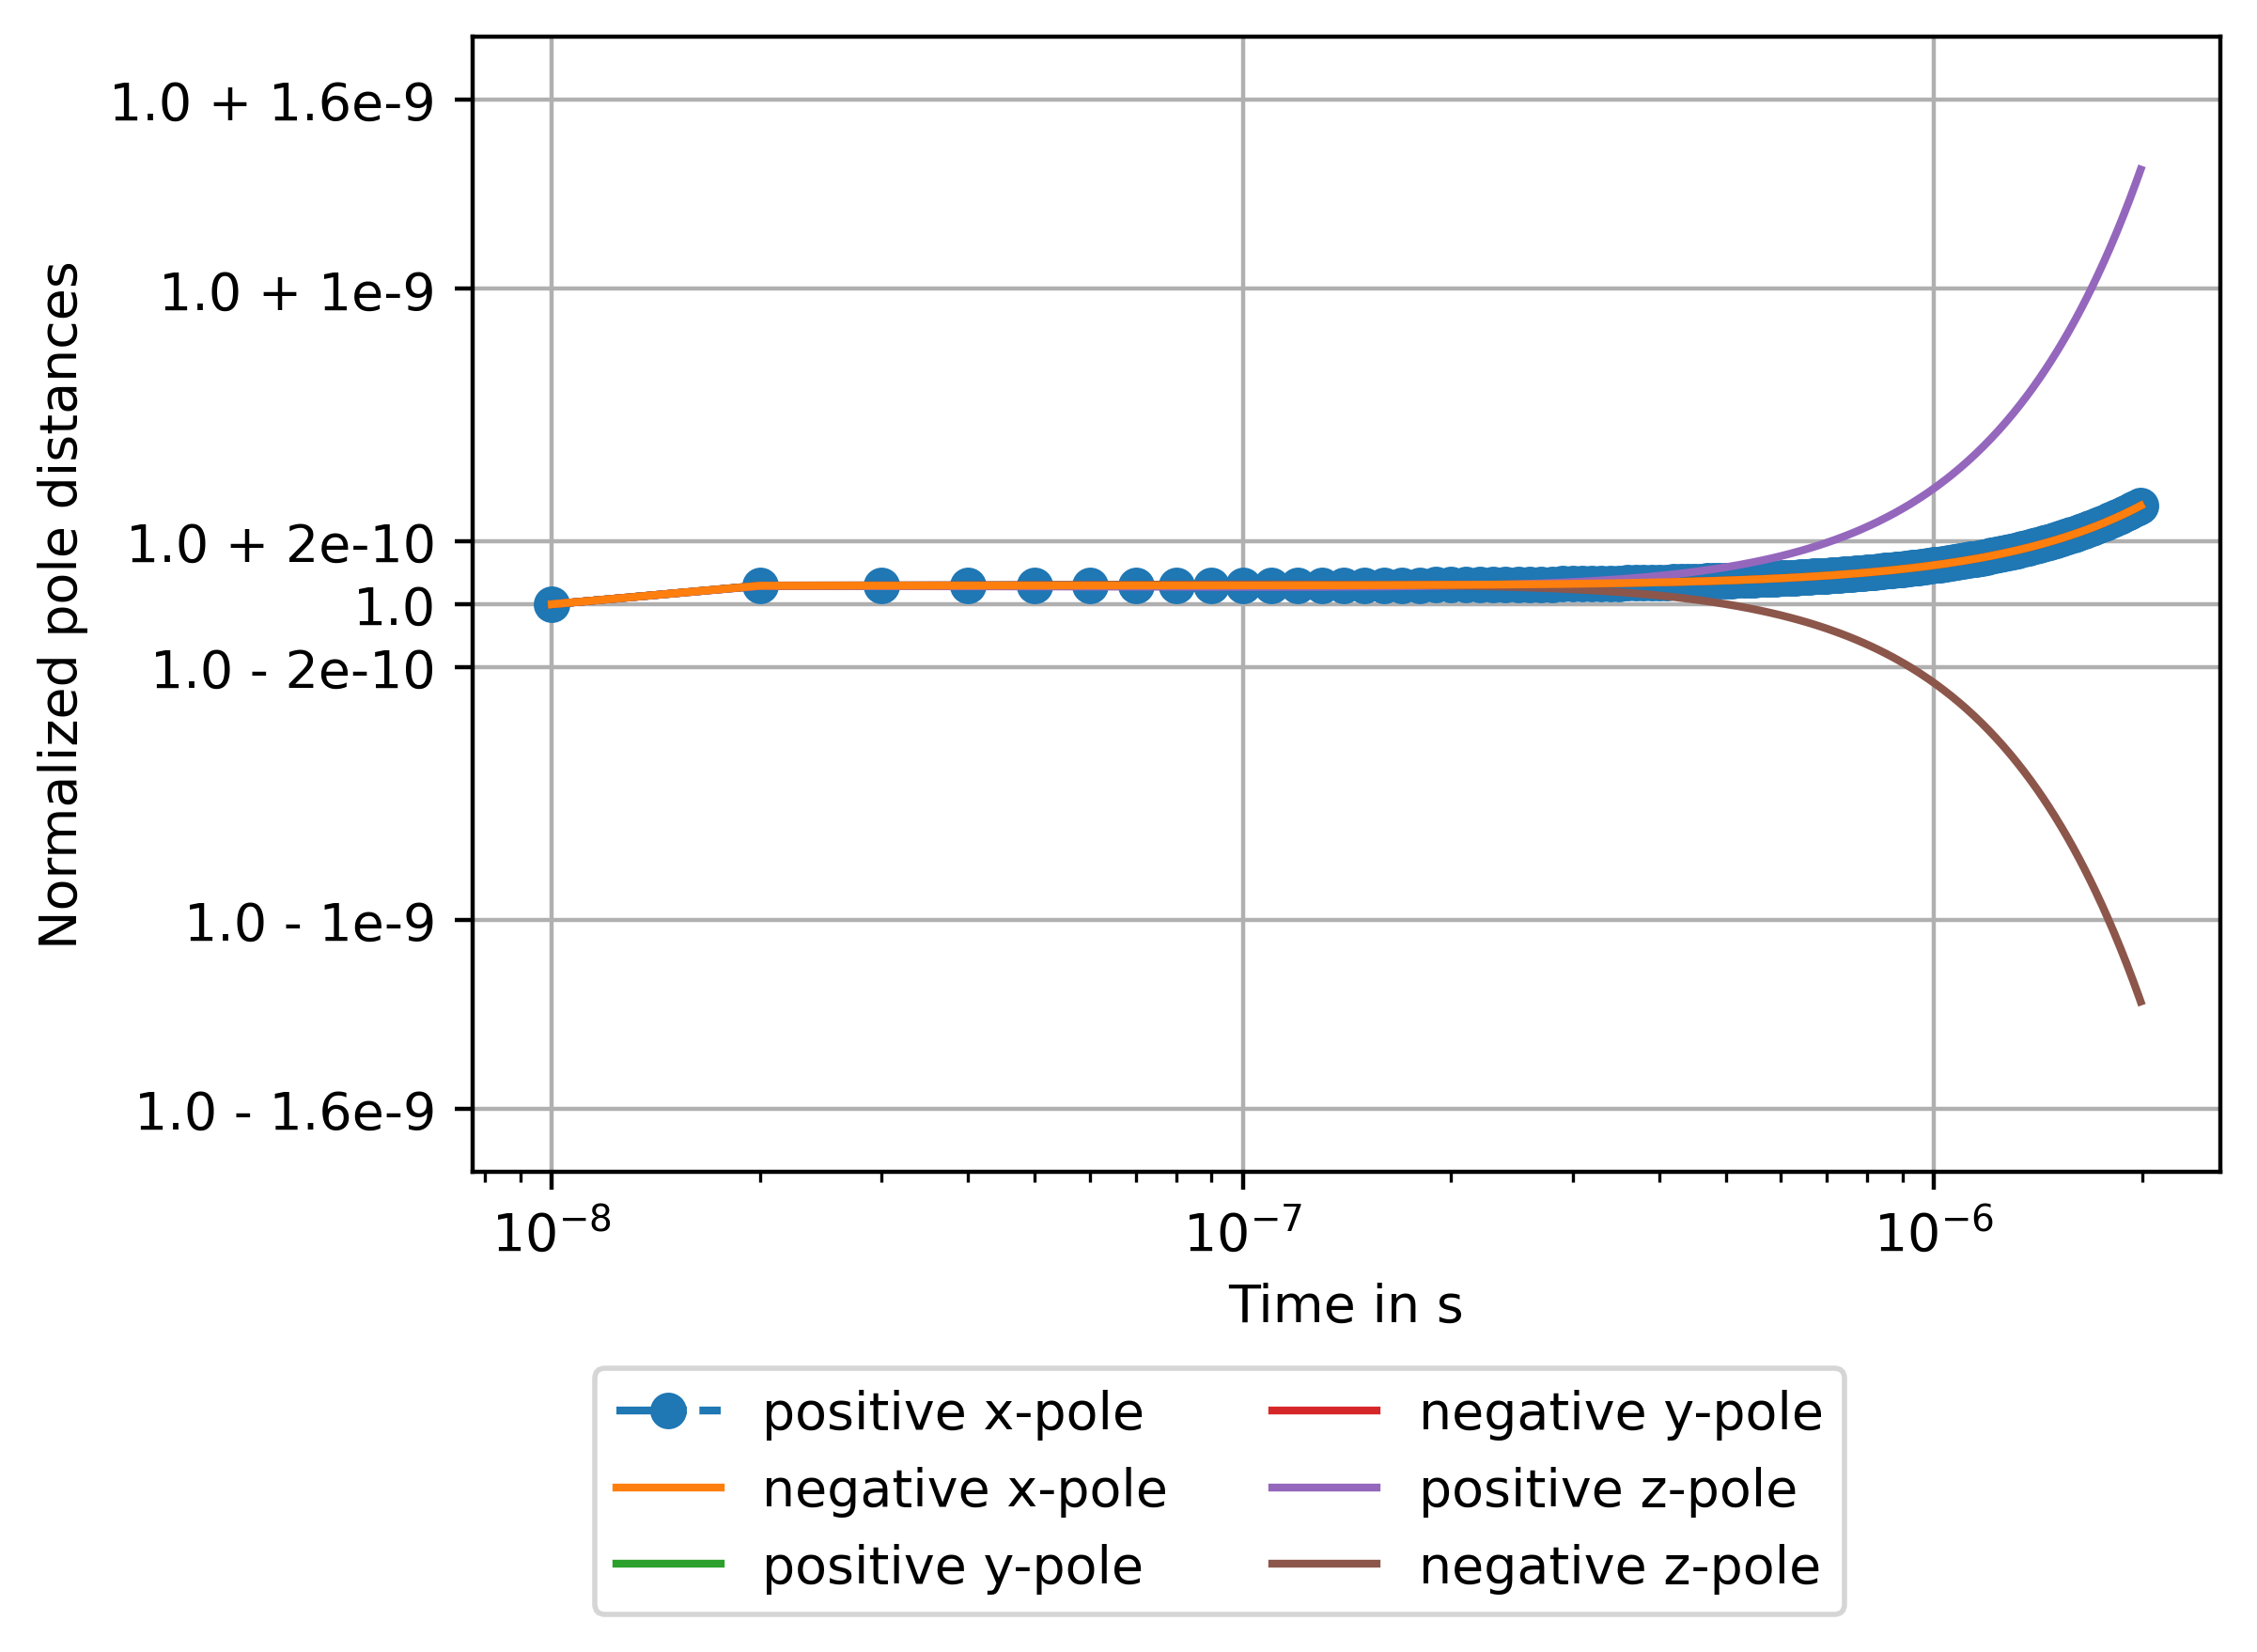

In [160]:
import matplotlib.ticker as ticker

xPol1SphereNoSTDiff= (xPol1SphereNoST.iloc[1:200])/xPol1SphereNoST.iloc[1]
yPol1SphereNoSTDiff= (yPol1SphereNoST.iloc[1:200])/yPol1SphereNoST.iloc[1]
zPol1SphereNoSTDiff= (zPol1SphereNoST.iloc[1:200])/zPol1SphereNoST.iloc[1]

xPol2SphereNoSTDiff= (xPol2SphereNoST.iloc[1:200])/xPol2SphereNoST.iloc[1]
yPol2SphereNoSTDiff= (yPol2SphereNoST.iloc[1:200])/yPol2SphereNoST.iloc[1]
zPol2SphereNoSTDiff= (zPol2SphereNoST.iloc[1:200])/zPol2SphereNoST.iloc[1]

zPolsDistDiff = (zPolsDist.iloc[1:200])/zPolsDist.iloc[1]
xPolsDistDiff = (xPolsDist.iloc[1:200])/xPolsDist.iloc[1]
yPolsDistDiff = (yPolsDist.iloc[1:200])/yPolsDist.iloc[1]

plt.plot(SphereNoST["time"].iloc[1:200], xPol1SphereNoSTDiff, linestyle='-.', marker='o', label="positive x-pole")
plt.plot(SphereNoST["time"].iloc[1:200], xPol2SphereNoSTDiff, label="negative x-pole",zorder=3)
plt.plot(SphereNoST["time"].iloc[1:200], yPol1SphereNoSTDiff, label="positive y-pole")
plt.plot(SphereNoST["time"].iloc[1:200], yPol2SphereNoSTDiff, label="negative y-pole")
plt.plot(SphereNoST["time"].iloc[1:200], zPol1SphereNoSTDiff, label="positive z-pole")
plt.plot(SphereNoST["time"].iloc[1:200], zPol2SphereNoSTDiff, label="negative z-pole")

#plt.plot(SphereNoST["time"].iloc[1:200], zPolsDistDiff, label="z-poles distance")
#plt.plot(SphereNoST["time"].iloc[1:200], xPolsDistDiff,linestyle='-', marker='^', label="x-poles distance")


plt.xlabel("Time in s")
plt.ylabel("Normalized pole distances")

plt.xscale("log")
plt.yscale("log")

# Manually specified y-tick values
#y_ticks = [1 - 2.6e-8,1 - 1e-8,1 - 2e-9 , 1, 1 + 2e-9,1 + 1e-8 ,1 + 2.6e-8]
#y_labels = [f"1.0 - 2.6e-8", "1.0 - 1e-8","1.0 - 2e-9" ,"1.0", "1.0 + 2e-9","1.0 + 1e-8" ,"1.0 + 2.6e-8"]

#y_ticks = [1 - 1.6e-9,1 - 1e-9,1 - 2e-10 , 1, 1 + 2e-10,1 + 1e-9 ,1 + 1.6e-9]
#y_labels = [f"1.0 - 1.6e-9", "1.0 - 1e-9","1.0 - 2e-10" ,"1.0", "1.0 + 2e-10","1.0 + 1e-9" ,"1.0 + 1.6e-9"]

plt.gca().yaxis.set_major_locator(ticker.FixedLocator(y_ticks))
plt.gca().yaxis.set_minor_locator(ticker.FixedLocator([]))

# plt.ylim((1-1.8e-9, 1+1.8e-9))
#plt.xlim(right=2e-6)
plt.legend(bbox_to_anchor=(0.8, -0.15),ncol=2)
#plt.yticks([1+2e-9, 1-2e-9])#(list(plt.yticks()[0]) + [1.0])
#plt.ticklabel_format(style='sci', axis='y', useOffset=1.0) 
plt.yticks(y_ticks, y_labels)

plt.grid()
#plt.savefig('6PolesPlot_Sphere.png', facecolor='w',bbox_inches='tight')
plt.show()

In [13]:
# SphereNoST = pd.read_csv('newPostProcessing/N80_3D_noST_Sphere-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)

SphereNoST = pd.read_csv('newPostProcessing/LongerT_N80_3D_noST_Sphere-timeStep-MatthiasSetup_00001_templateCase/bubblepproc.dat', sep="\t", header=0)


xPol1SphereNoST = (SphereNoST["xPole1"]-SphereNoST["bubbleCenterx"])#.diff()/EllipsoidNoST["time"].diff()
xPol2SphereNoST = (SphereNoST["bubbleCenterx"] - SphereNoST["xPole2"])#.diff()/EllipsoidNoST["time"].diff()

yPol1SphereNoST = (SphereNoST["yPole1"]-SphereNoST["bubbleCentery"])#.diff()/EllipsoidNoST["time"].diff()
yPol2SphereNoST = (SphereNoST["bubbleCentery"] - SphereNoST["yPole2"])#.diff()/EllipsoidNoST["time"].diff()

zPol1SphereNoST = (SphereNoST["zPole1"] - SphereNoST["bubbleCenterz"])#.diff()/EllipsoidNoST["time"].diff()
zPol2SphereNoST = (SphereNoST["bubbleCenterz"] - SphereNoST["zPole2"])#.diff()/EllipsoidNoST["time"].diff()

zPolsDist = zPol1SphereNoST + zPol2SphereNoST
xPolsDist = xPol1SphereNoST + xPol2SphereNoST
yPolsDist = yPol1SphereNoST + yPol2SphereNoST

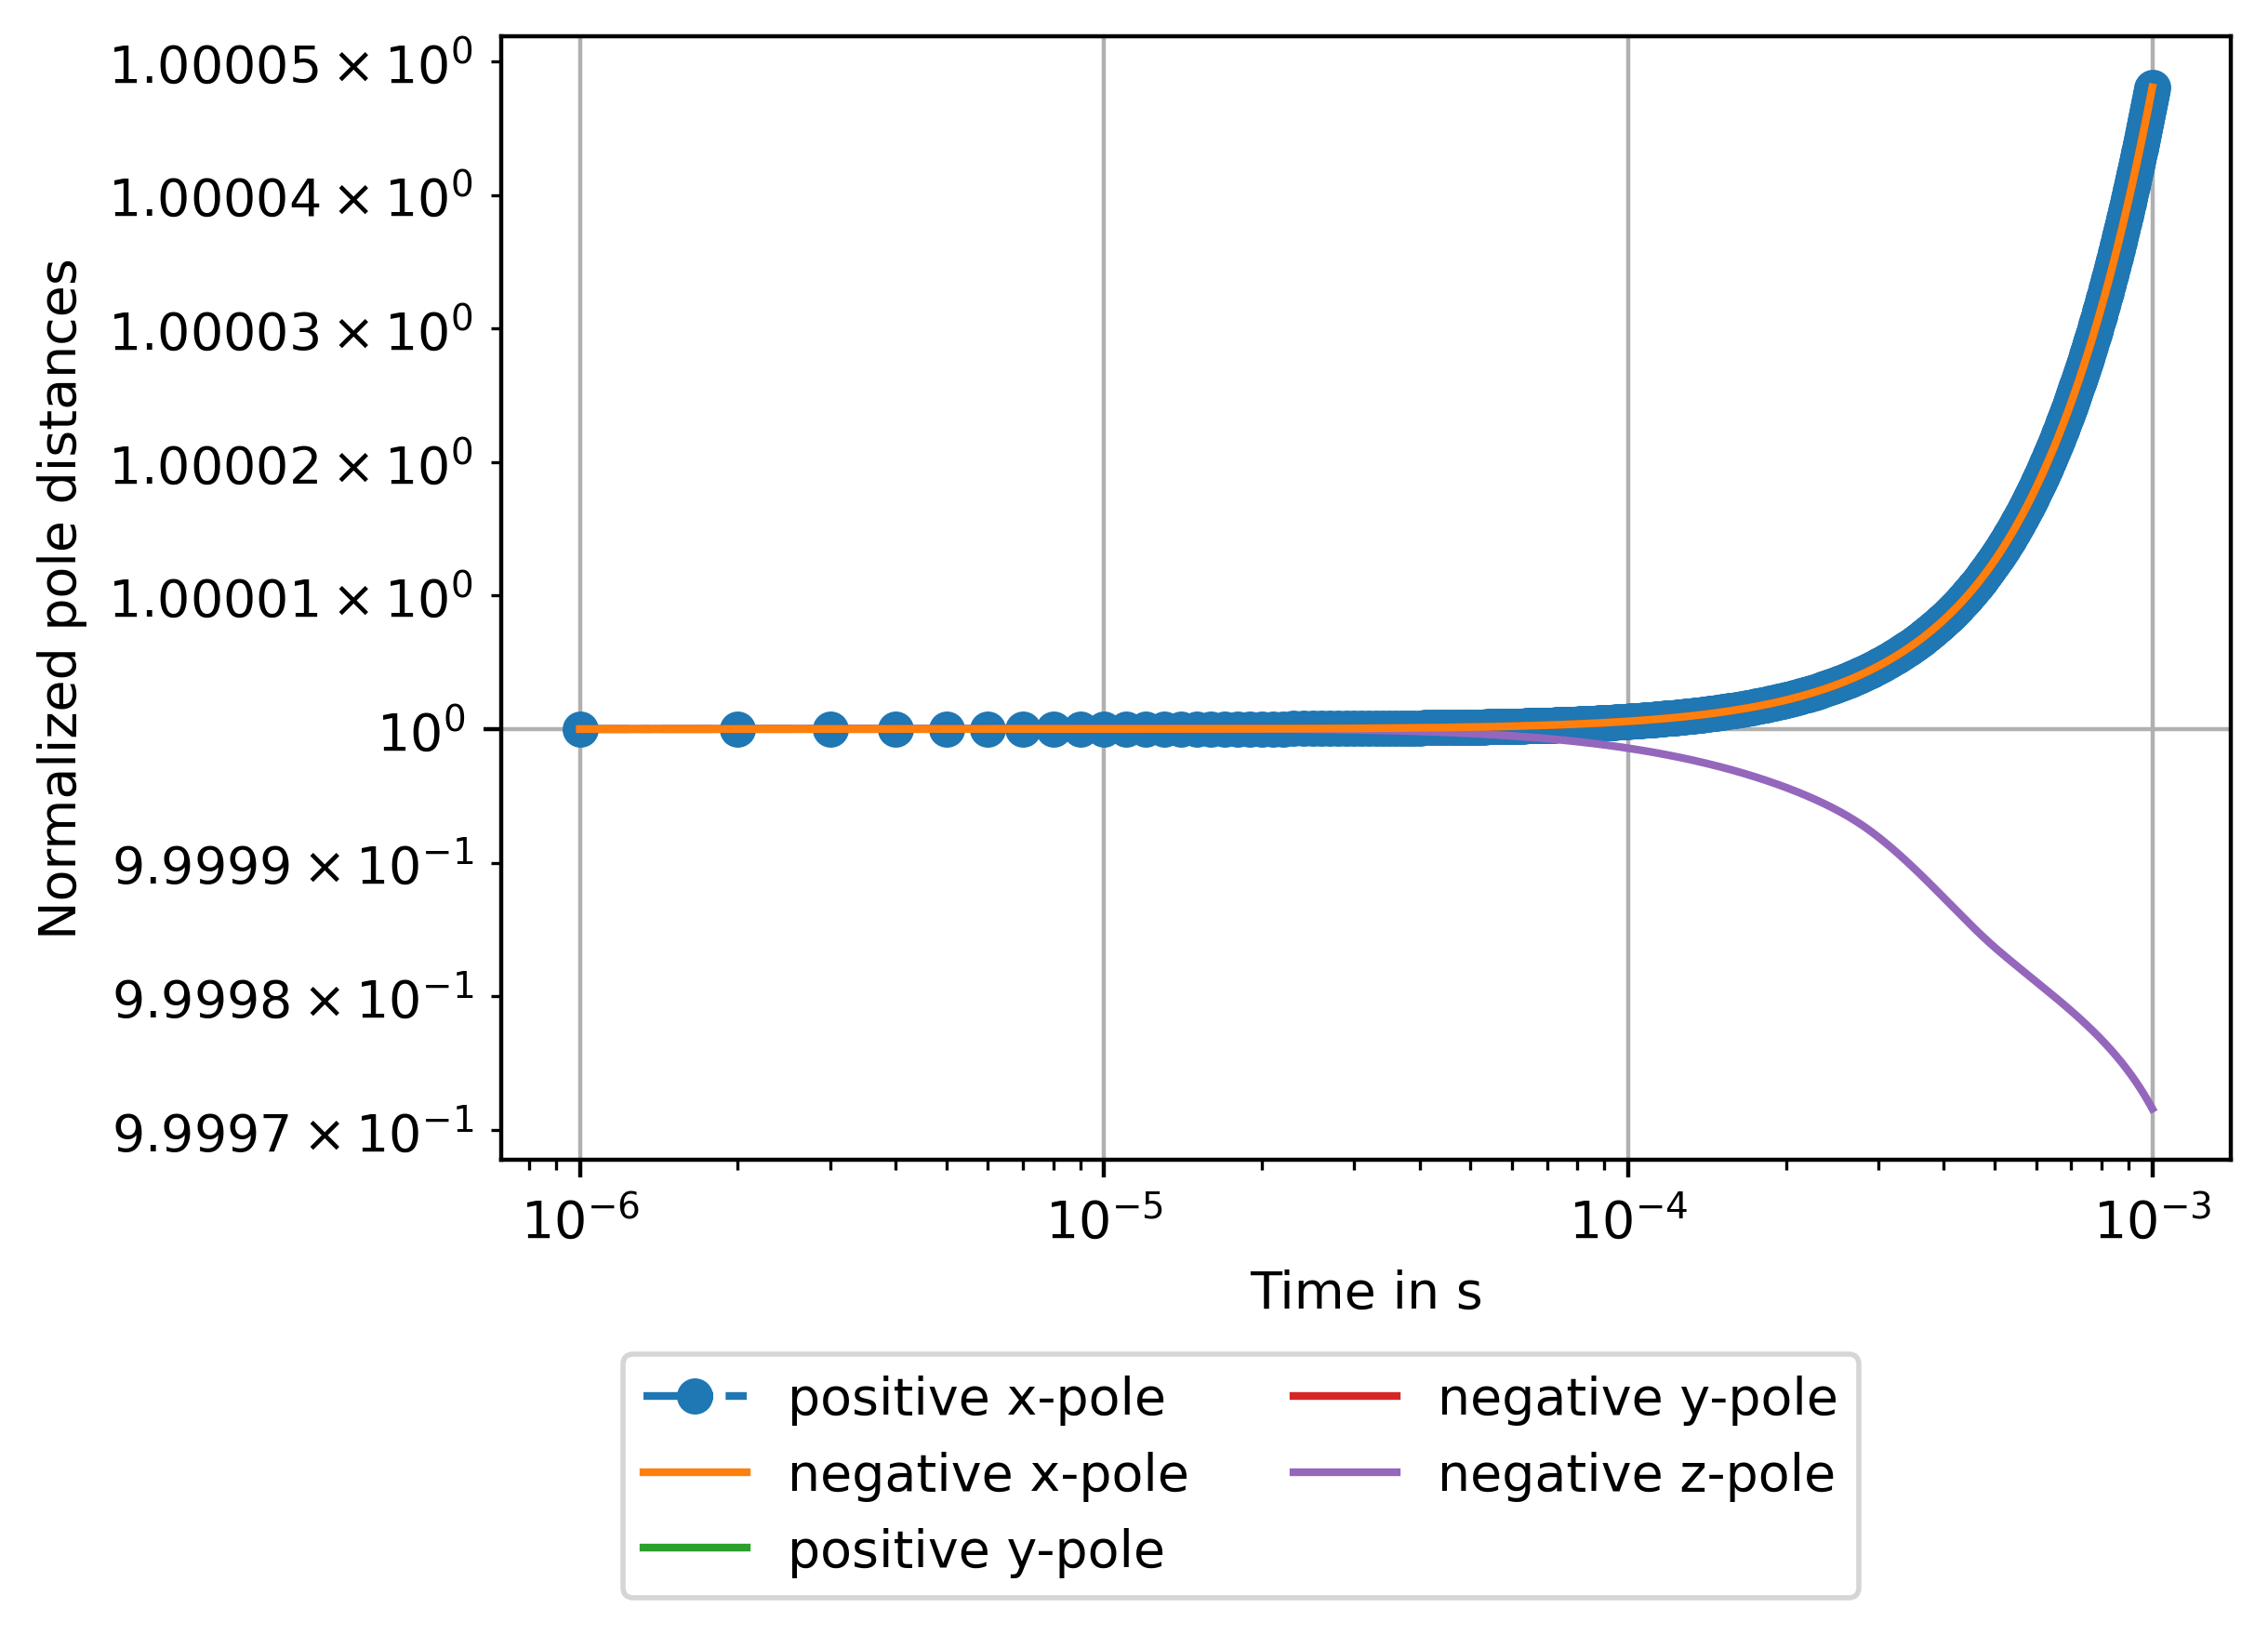

In [16]:
import matplotlib.ticker as ticker

xPol1SphereNoSTDiff= (xPol1SphereNoST.iloc[1:])/xPol1SphereNoST.iloc[1]
yPol1SphereNoSTDiff= (yPol1SphereNoST.iloc[1:])/yPol1SphereNoST.iloc[1]
zPol1SphereNoSTDiff= (zPol1SphereNoST.iloc[1:])/zPol1SphereNoST.iloc[1]

xPol2SphereNoSTDiff= (xPol2SphereNoST.iloc[1:])/xPol2SphereNoST.iloc[1]
yPol2SphereNoSTDiff= (yPol2SphereNoST.iloc[1:])/yPol2SphereNoST.iloc[1]
zPol2SphereNoSTDiff= (zPol2SphereNoST.iloc[1:])/zPol2SphereNoST.iloc[1]

zPolsDistDiff = (zPolsDist.iloc[1:])/zPolsDist.iloc[1]
xPolsDistDiff = (xPolsDist.iloc[1:])/xPolsDist.iloc[1]
yPolsDistDiff = (yPolsDist.iloc[1:])/yPolsDist.iloc[1]

plt.plot(SphereNoST["time"].iloc[1:], xPol1SphereNoSTDiff, linestyle='-.', marker='o', label="positive x-pole")
plt.plot(SphereNoST["time"].iloc[1:], xPol2SphereNoSTDiff, label="negative x-pole",zorder=3)
plt.plot(SphereNoST["time"].iloc[1:], yPol1SphereNoSTDiff, label="positive y-pole")
plt.plot(SphereNoST["time"].iloc[1:], yPol2SphereNoSTDiff, label="negative y-pole")
#plt.plot(SphereNoST["time"].iloc[1:], zPol1SphereNoSTDiff, label="positive z-pole")
plt.plot(SphereNoST["time"].iloc[1:], zPol2SphereNoSTDiff, label="negative z-pole")

#plt.plot(SphereNoST["time"].iloc[1:200], zPolsDistDiff, label="z-poles distance")
#plt.plot(SphereNoST["time"].iloc[1:200], xPolsDistDiff,linestyle='-', marker='^', label="x-poles distance")


plt.xlabel("Time in s")
plt.ylabel("Normalized pole distances")

plt.xscale("log")
plt.yscale("log")

# Manually specified y-tick values
#y_ticks = [1 - 2.6e-8,1 - 1e-8,1 - 2e-9 , 1, 1 + 2e-9,1 + 1e-8 ,1 + 2.6e-8]
#y_labels = [f"1.0 - 2.6e-8", "1.0 - 1e-8","1.0 - 2e-9" ,"1.0", "1.0 + 2e-9","1.0 + 1e-8" ,"1.0 + 2.6e-8"]

#y_ticks = [1 - 1.6e-9,1 - 1e-9,1 - 2e-10 , 1, 1 + 2e-10,1 + 1e-9 ,1 + 1.6e-9]
#y_labels = [f"1.0 - 1.6e-9", "1.0 - 1e-9","1.0 - 2e-10" ,"1.0", "1.0 + 2e-10","1.0 + 1e-9" ,"1.0 + 1.6e-9"]

#plt.gca().yaxis.set_major_locator(ticker.FixedLocator(y_ticks))
#plt.gca().yaxis.set_minor_locator(ticker.FixedLocator([]))

# plt.ylim((1-1.8e-9, 1+1.8e-9))
#plt.xlim(right=2e-6)
plt.legend(bbox_to_anchor=(0.8, -0.15),ncol=2)
#plt.yticks([1+2e-9, 1-2e-9])#(list(plt.yticks()[0]) + [1.0])
#plt.ticklabel_format(style='sci', axis='y', useOffset=1.0) 

#plt.yticks(y_ticks, y_labels)

plt.grid()
#plt.savefig('6PolesPlot_Sphere.png', facecolor='w',bbox_inches='tight')
plt.show()

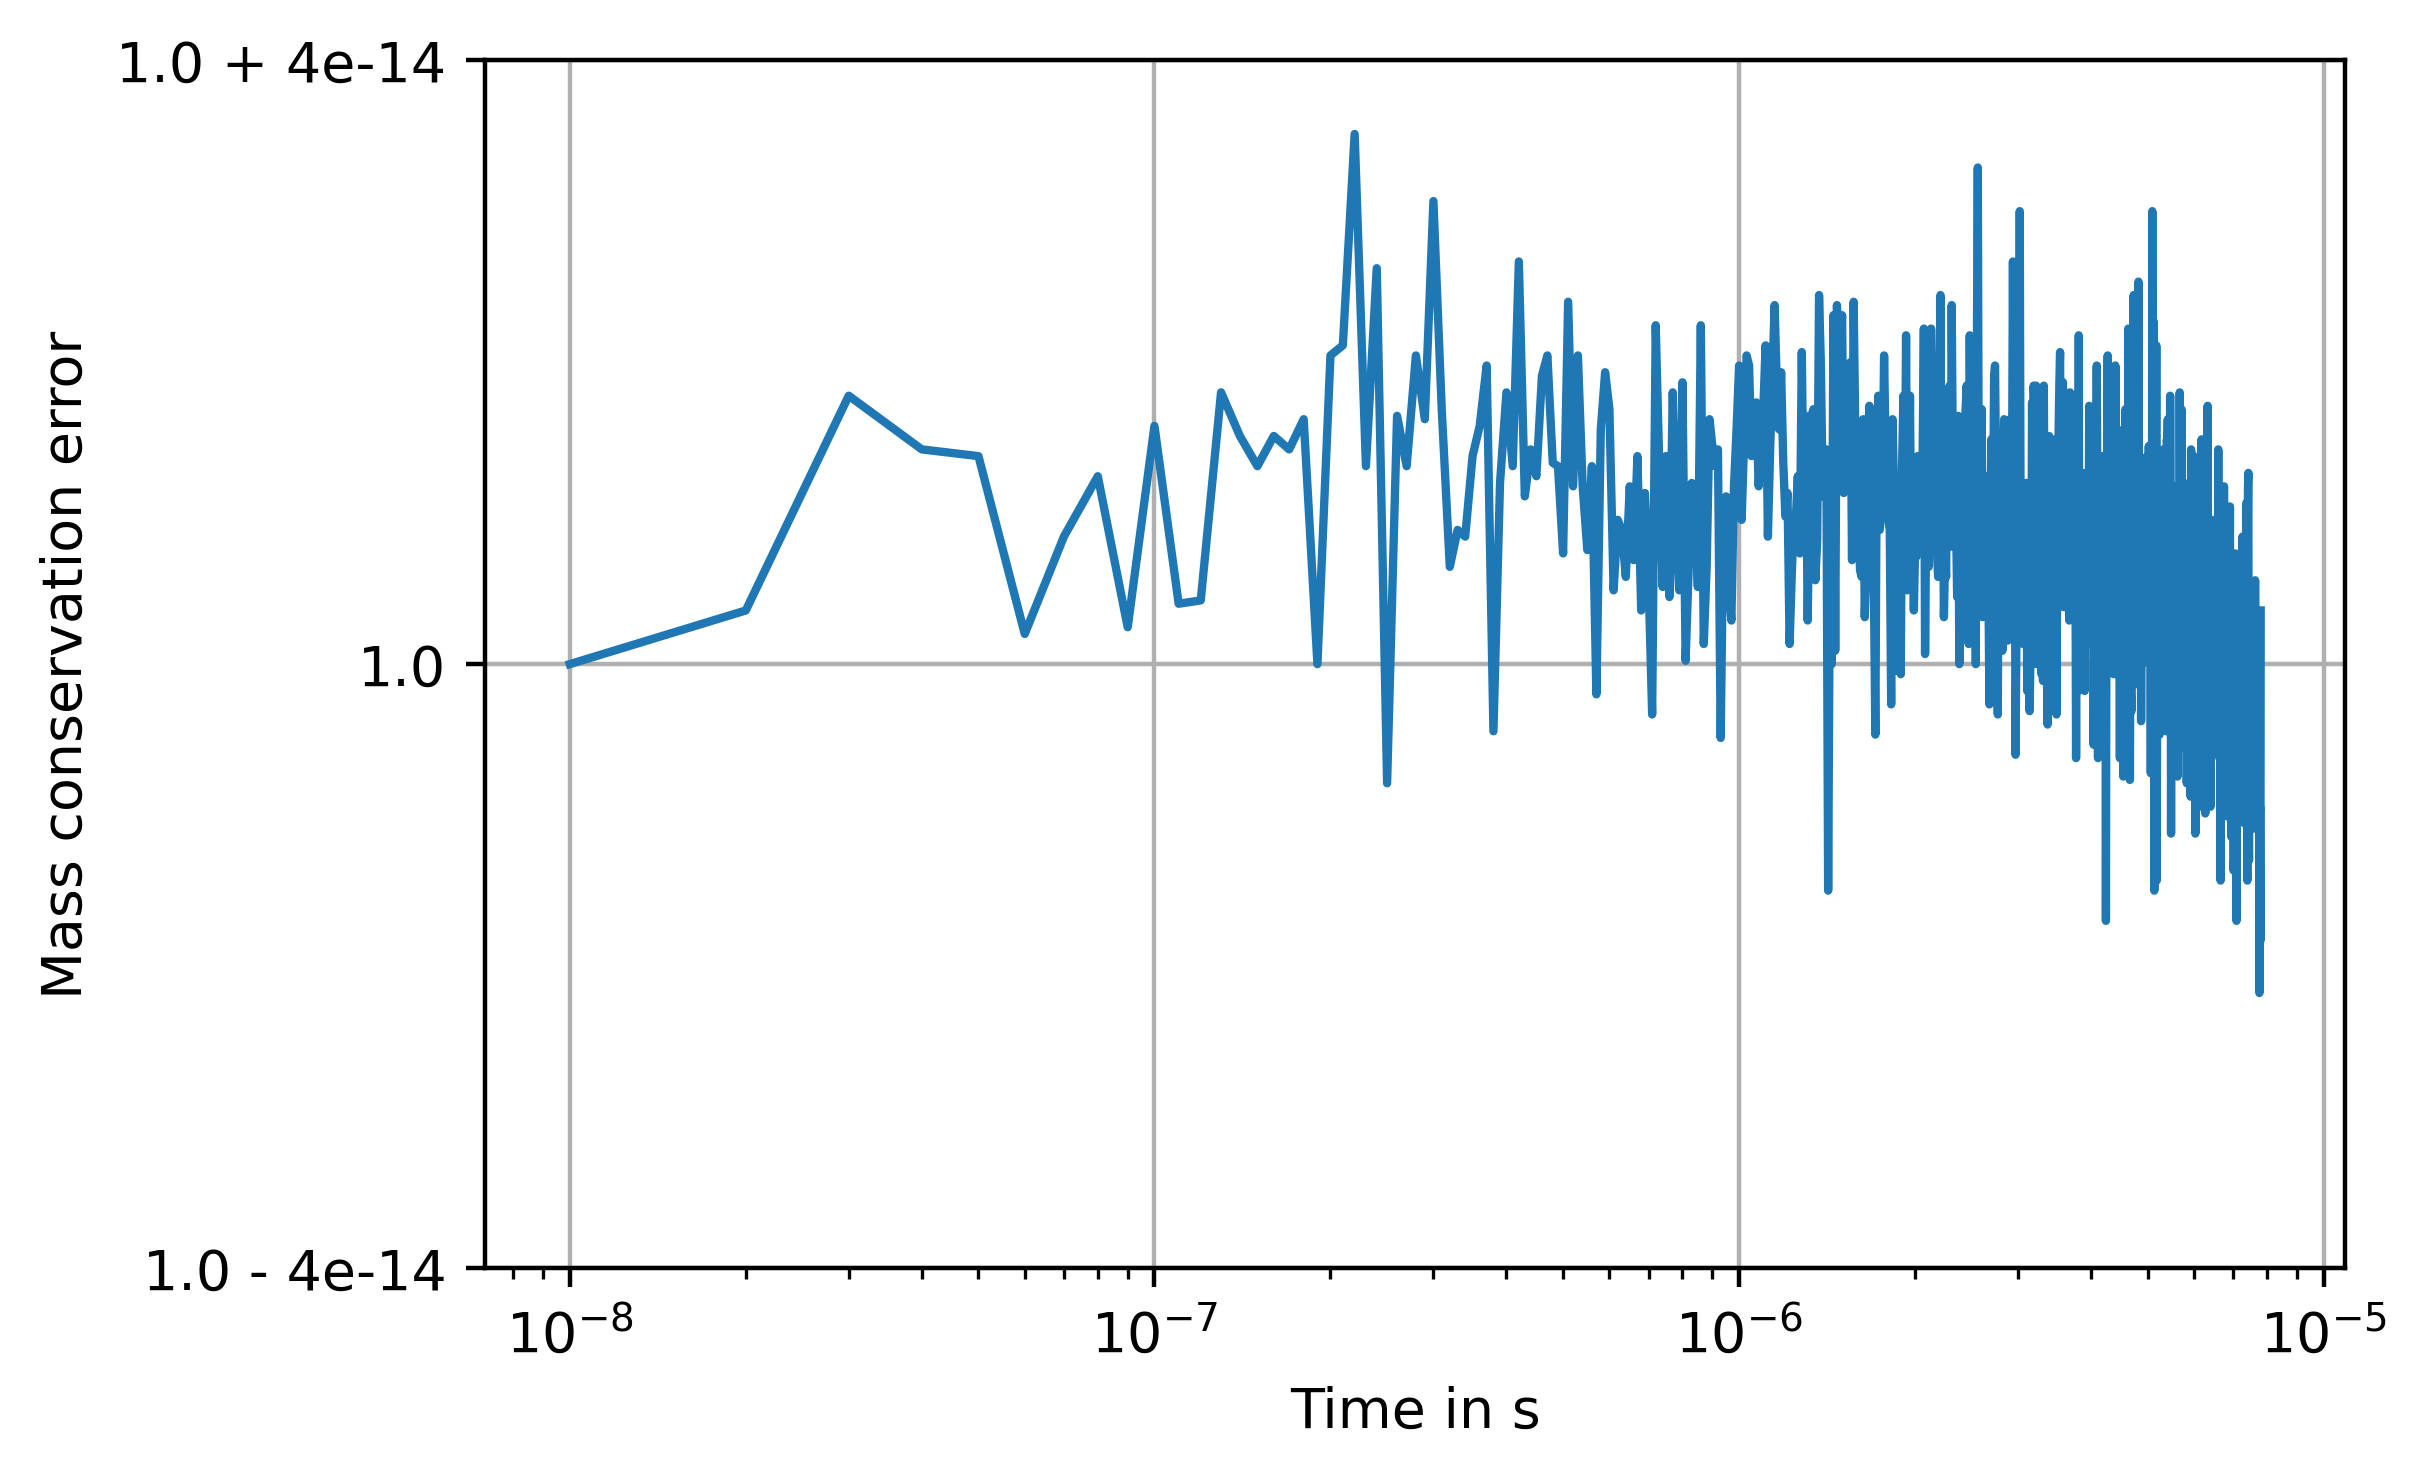

In [151]:
plt.plot(SphereNoST["time"].iloc[1:], (SphereNoST["bubbleVolume"].iloc[1:])/SphereNoST["bubbleVolume"].iloc[1])

plt.xlabel("Time in s")
plt.ylabel("Mass conservation error")

plt.xscale("log")
plt.yscale("log")

# Manually specified y-tick values
y_ticks = [1 - 4e-14, 1, 1 + 4e-14]
y_labels = [f"1.0 - 4e-14", "1.0", "1.0 + 4e-14"]
plt.gca().yaxis.set_major_locator(ticker.FixedLocator(y_ticks))
plt.gca().yaxis.set_minor_locator(ticker.FixedLocator([]))

#plt.ylim((1-1.8e-9, 1+1.8e-9))
#plt.xlim(right=2e-6)
#plt.legend(bbox_to_anchor=(0.8, -0.15),ncol=2)
#plt.yticks([1+2e-9, 1-2e-9])#(list(plt.yticks()[0]) + [1.0])
#plt.ticklabel_format(style='sci', axis='y', useOffset=1.0) 
plt.yticks(y_ticks, y_labels)

plt.grid()
plt.savefig('MassConserv.png', facecolor='w',bbox_inches='tight')
plt.show()

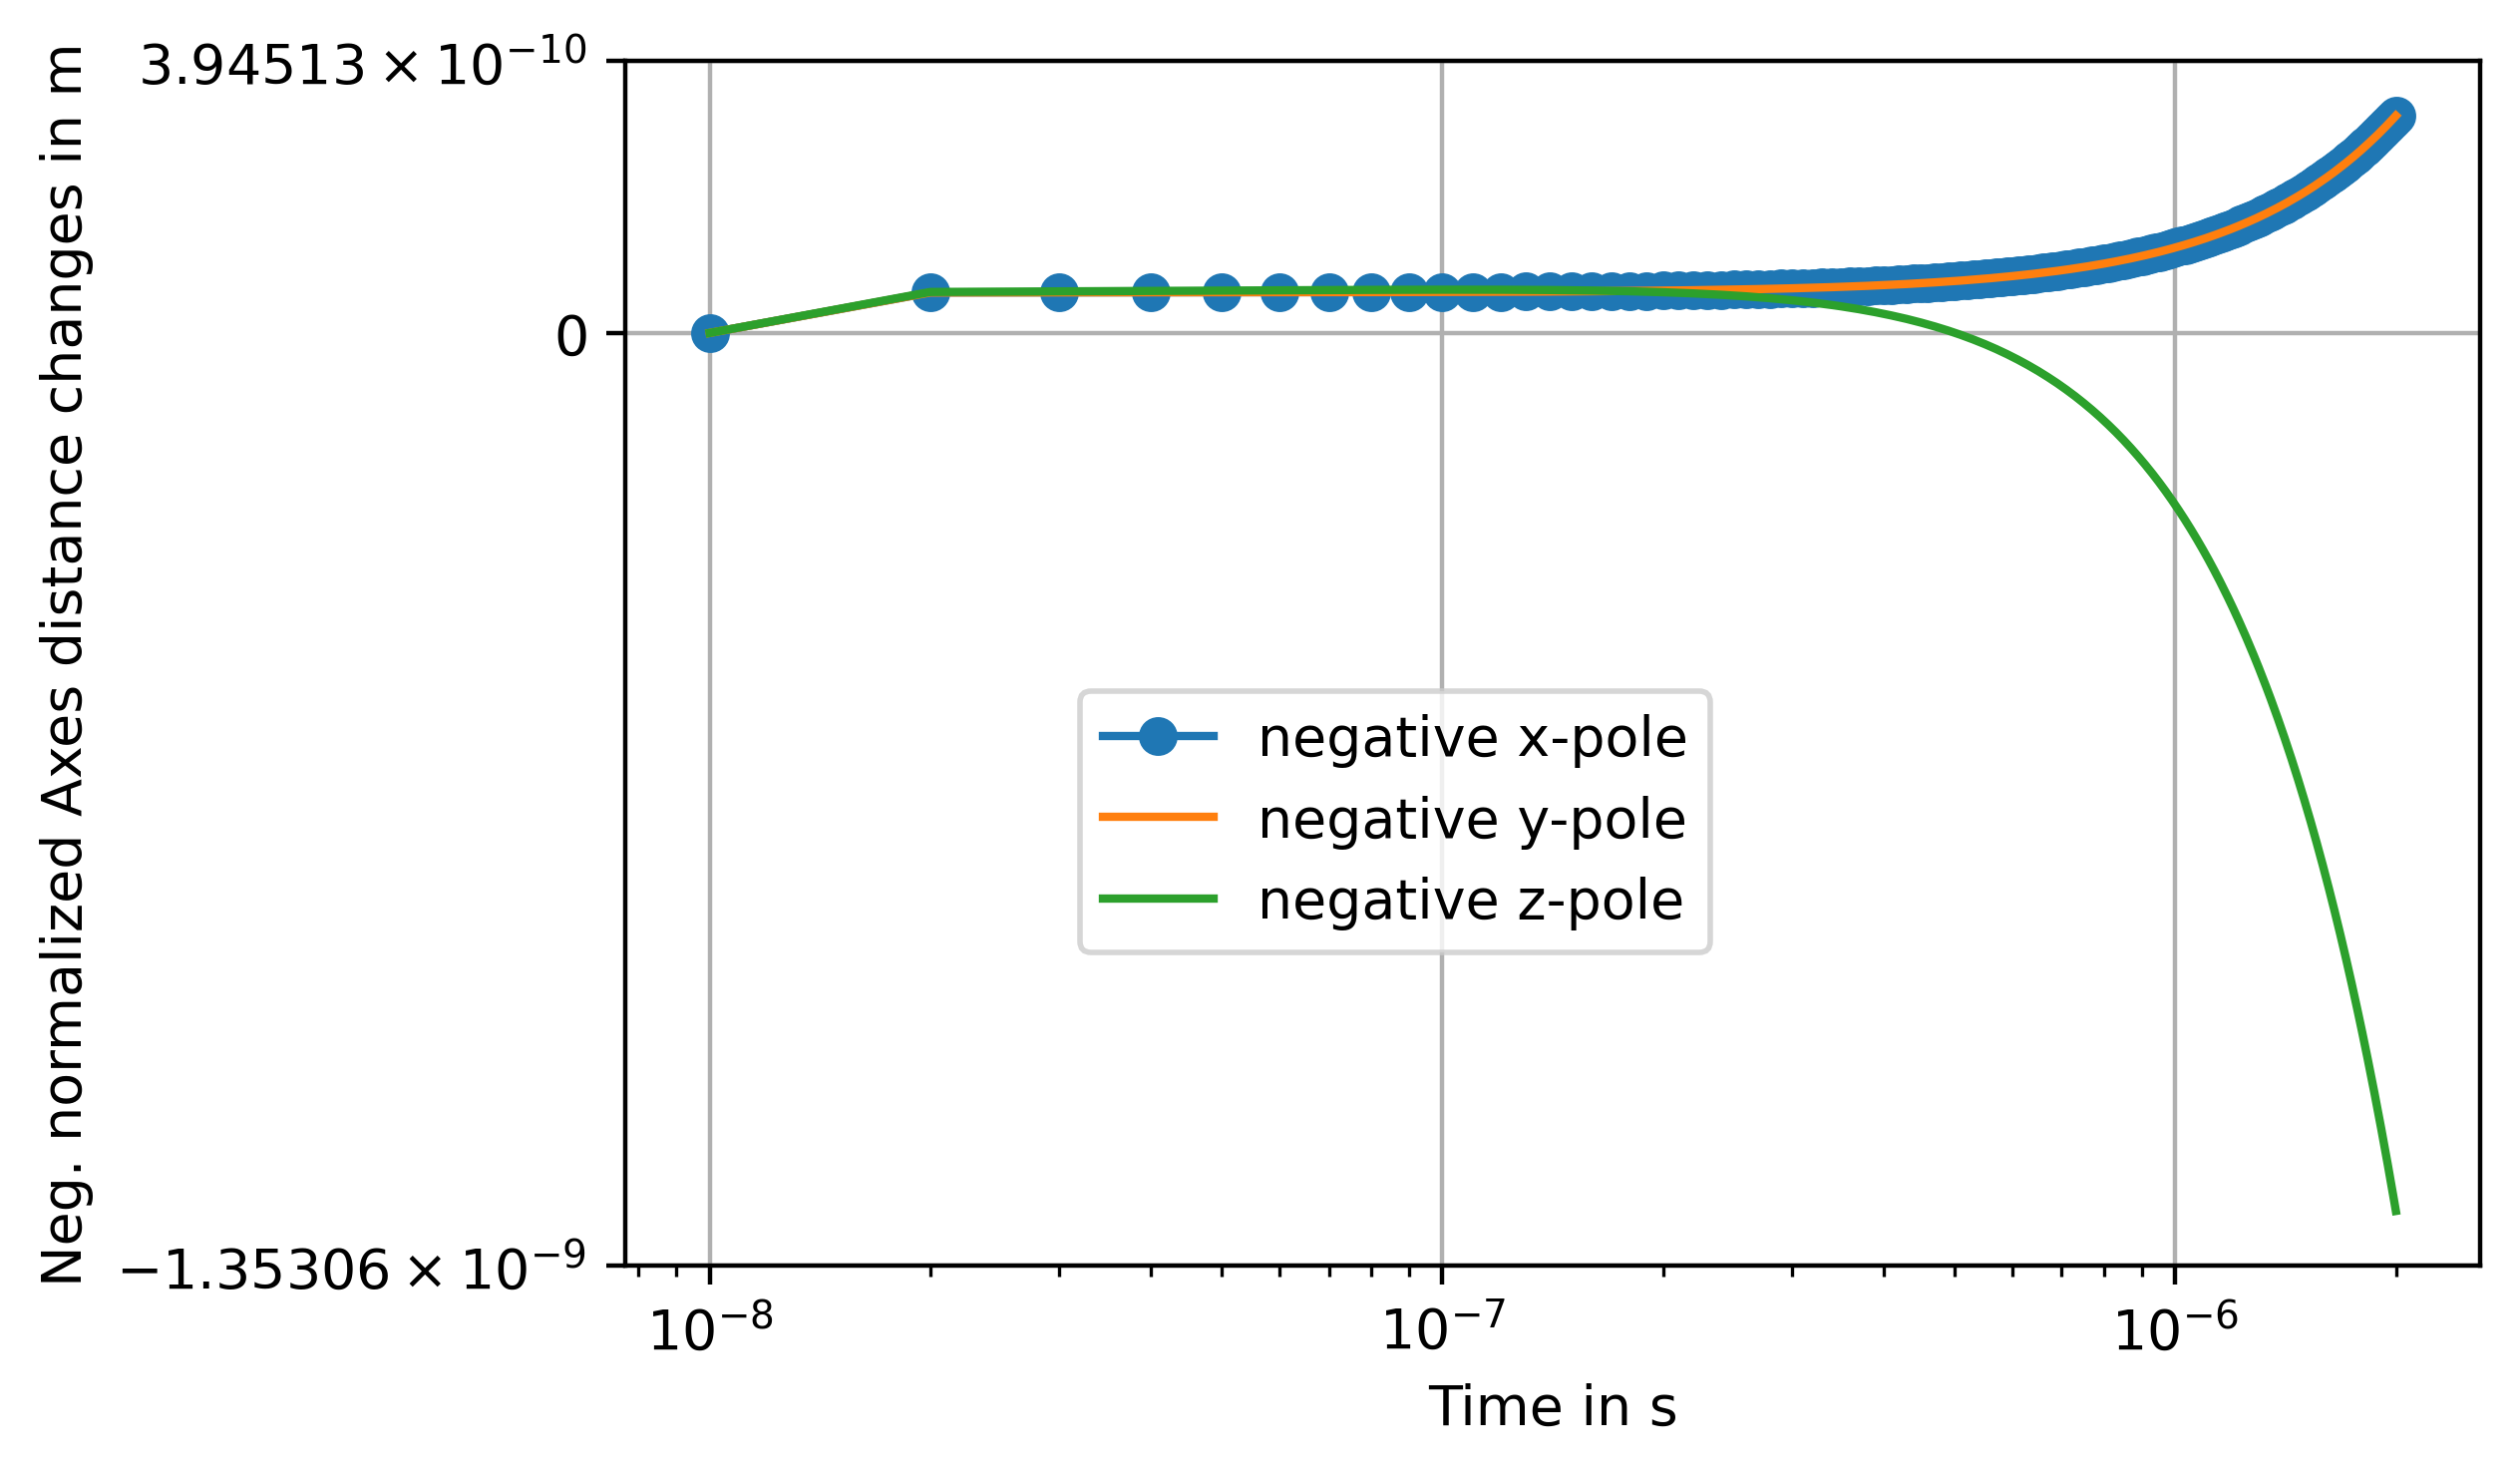

In [65]:
xPol2SphereNoSTDiff= (xPol2SphereNoST.iloc[1:] - xPol2SphereNoST.iloc[1])/xPol2SphereNoST.iloc[1]
yPol2SphereNoSTDiff= (yPol2SphereNoST.iloc[1:] - yPol2SphereNoST.iloc[1])/yPol2SphereNoST.iloc[1]
zPol2SphereNoSTDiff= (zPol2SphereNoST.iloc[1:] - zPol2SphereNoST.iloc[1])/zPol2SphereNoST.iloc[1]

plt.plot(SphereNoST["time"].iloc[1:], xPol2SphereNoSTDiff, marker='o', label="negative x-pole")
plt.plot(SphereNoST["time"].iloc[1:], yPol2SphereNoSTDiff, label="negative y-pole")
plt.plot(SphereNoST["time"].iloc[1:], zPol2SphereNoSTDiff, label="negative z-pole")

plt.xlabel("Time in s")
plt.ylabel("Neg. normalized Axes distance changes in m")

plt.xscale("log")
plt.yscale("symlog")

#plt.ylim((-1.5e-9, 7e-11))
plt.legend(bbox_to_anchor=(0.6, 0.5))
plt.yticks(list(plt.yticks()[0]) + [0.0])
plt.grid()
#plt.savefig('posZPolePlot_Ellipsoids_comp.png', facecolor='w',bbox_inches='tight')
plt.show()

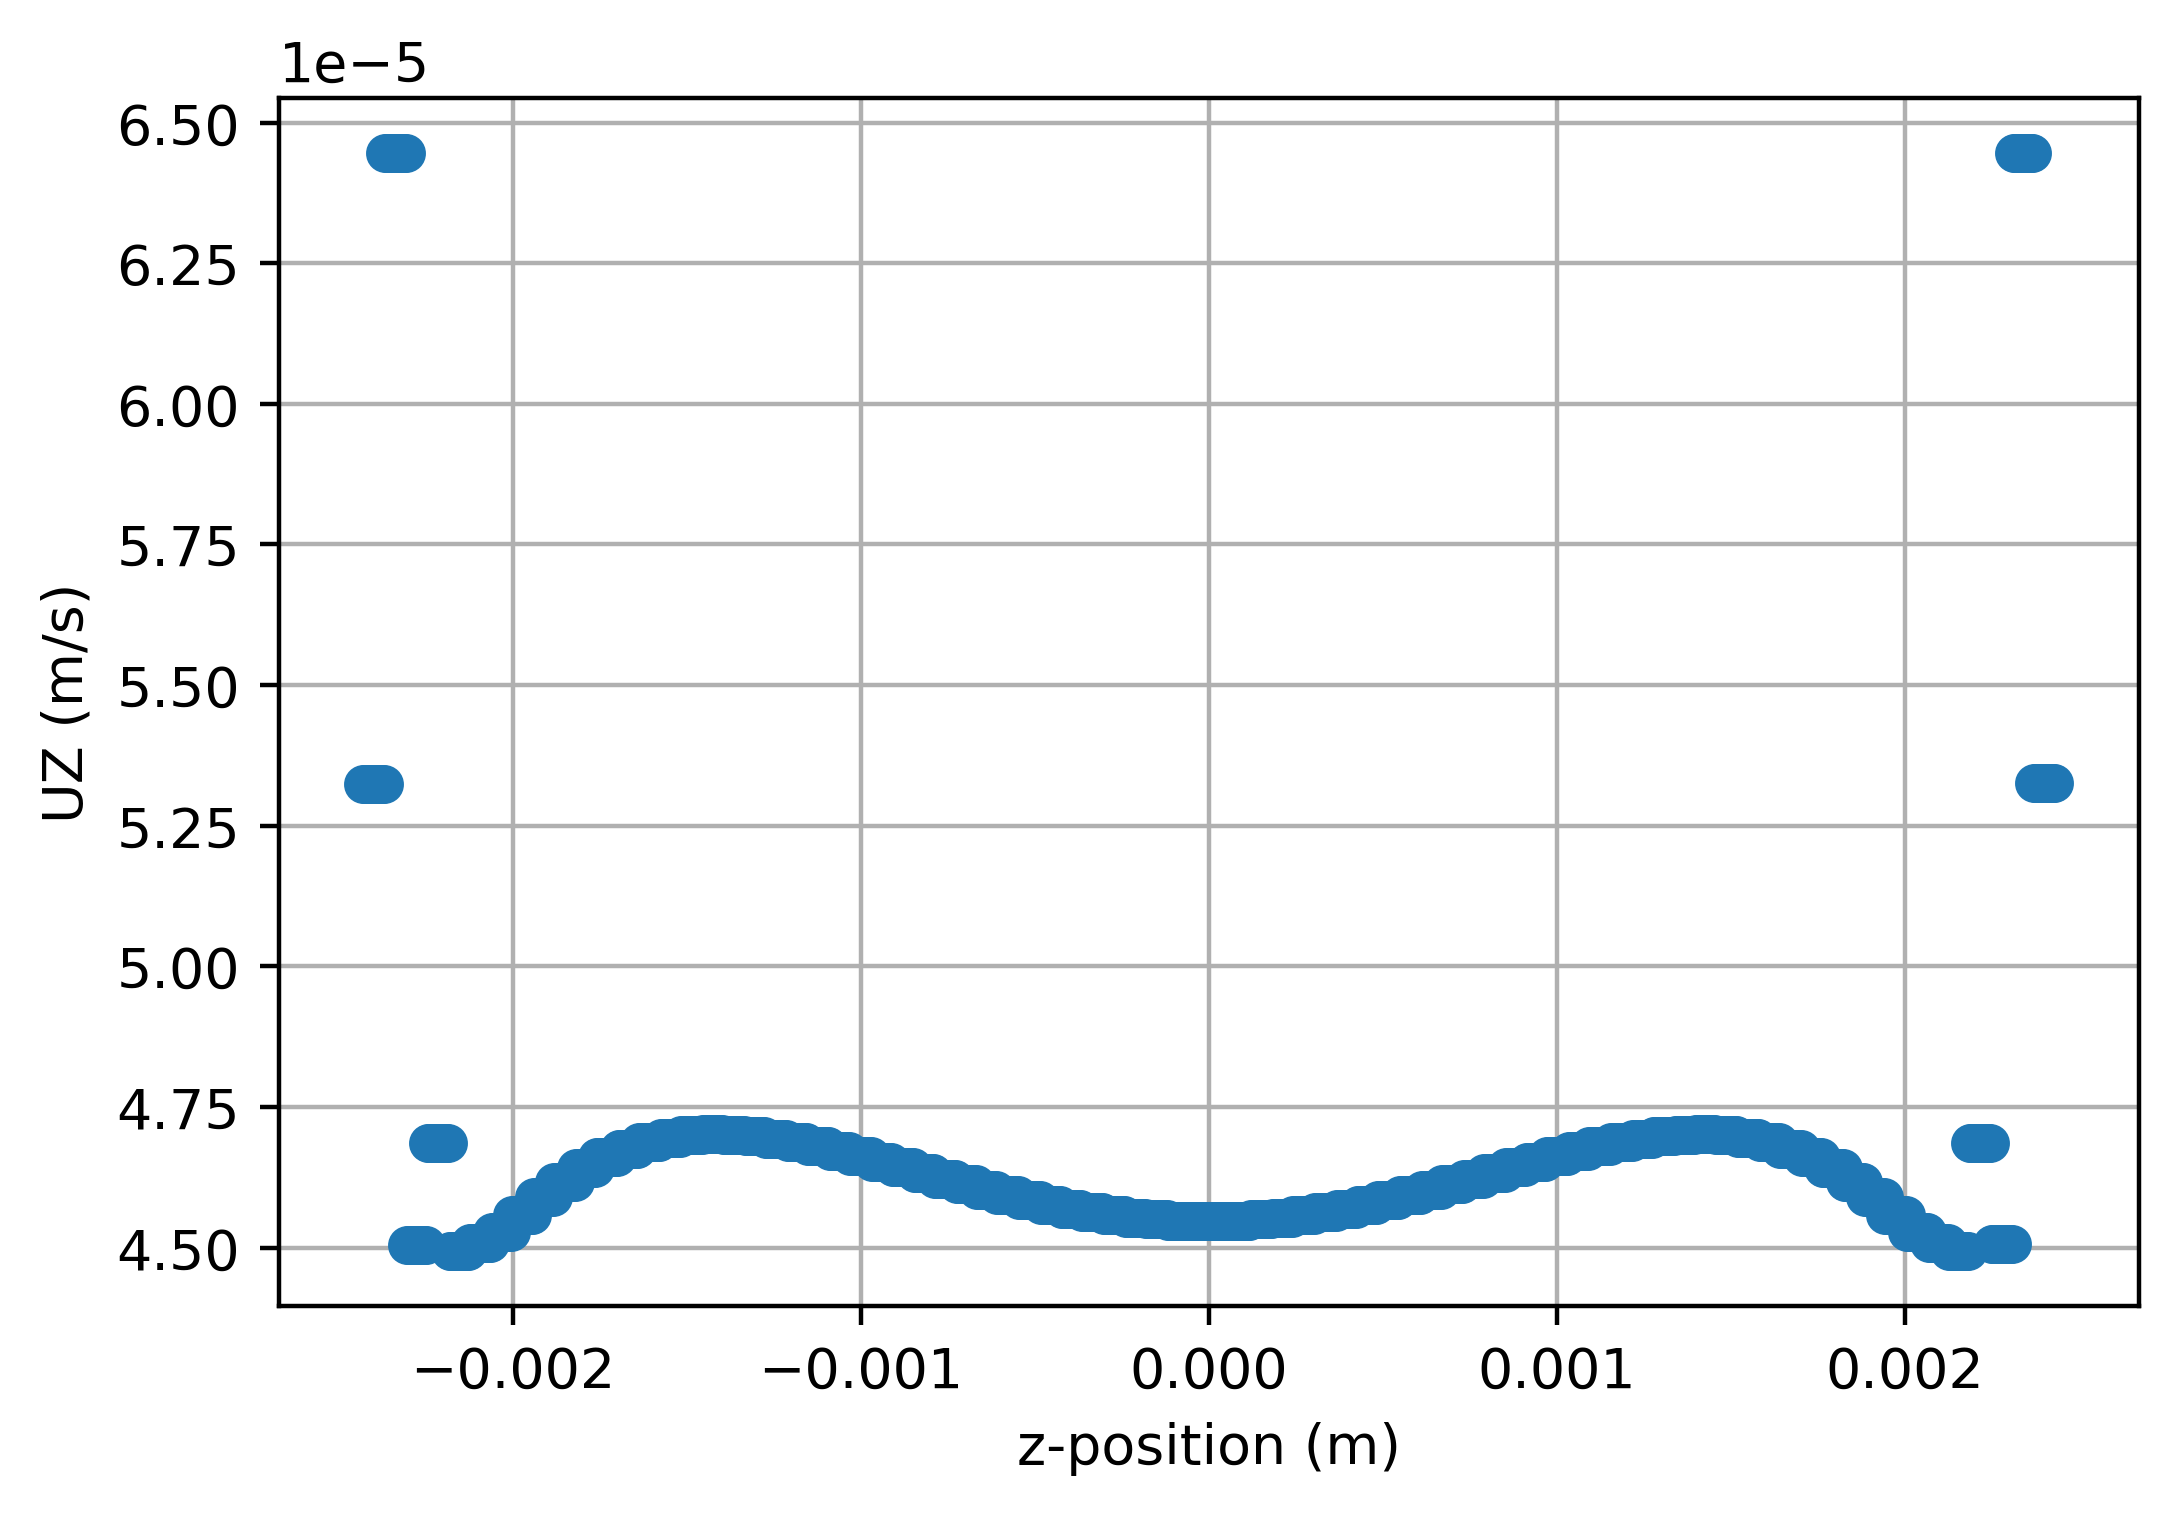

In [110]:
UZaxis = pd.read_csv('uzData.csv', sep=",", header=0)

rcParams["figure.dpi"] = 400
plt.grid()
rcParams['axes.axisbelow'] = True


plt.scatter(UZaxis['Points:2'], UZaxis['UZ'])

plt.ylabel("UZ (m/s)")
plt.xlabel("z-position (m)")
#plt.legend()
plt.savefig('UZDist.png', facecolor='w')
plt.show()

In [107]:
UZaxis

,UZ,arc_length,Points:0,Points:1,Points:2
0,0.000053,0.000000,1.000000e-07,0,-0.002430
1,0.000053,0.000005,1.000000e-07,0,-0.002425
2,0.000053,0.000010,1.000000e-07,0,-0.002420
3,0.000053,0.000015,1.000000e-07,0,-0.002415
4,0.000053,0.000019,1.000000e-07,0,-0.002411
...,...,...,...,...,...
996,0.000053,0.004841,1.000000e-07,0,0.002411
997,0.000053,0.004845,1.000000e-07,0,0.002415
998,0.000053,0.004850,1.000000e-07,0,0.002420
999,0.000053,0.004855,1.000000e-07,0,0.002425
